In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 2022-02 onwards is predicted

In [2]:
meat_prod = pd.read_csv("./Meat_Stats_Meat_Production.csv", thousands = ",")
cold_stor = pd.read_csv("./Meat_Stats_Cold_Storage.csv", thousands = ",")
slaughter_count = pd.read_csv("./Meat_Stats_Slaughter_Counts.csv", thousands = ",")
slaughter_weights = pd.read_csv("./Meat_Stats_Slaughter_Weights.csv", thousands = ",")

meat_prod = meat_prod.dropna()
meat_prod.index = pd.to_datetime(meat_prod["Date"])

cold_stor = cold_stor.dropna()
cold_stor.index = pd.to_datetime(cold_stor["Date"])

slaughter_count = slaughter_count.dropna()
slaughter_count.index = pd.to_datetime(slaughter_count["Date"])

slaughter_weights = slaughter_weights.dropna()
slaughter_weights.index = pd.to_datetime(slaughter_weights["Date"])

/var/folders/xg/5rkvcq9n79jgm1bb8vc6mj6w0000gn/T/ipykernel_34484/4000327067.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meat_prod.index = pd.to_datetime(meat_prod["Date"])
/var/folders/xg/5rkvcq9n79jgm1bb8vc6mj6w0000gn/T/ipykernel_34484/4000327067.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cold_stor.index = pd.to_datetime(cold_stor["Date"])
/var/folders/xg/5rkvcq9n79jgm1bb8vc6mj6w0000gn/T/ipykernel_34484/4000327067.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  slaughter_count.index = pd.to_datetime(slaughter_count["Date"])
/var/folders/xg/5rkvcq9n79

In [3]:
population = pd.read_csv('export.csv')
date = pd.to_datetime(population['label'], format="%Y")
date.name = 'Date'
population.index = date
population = population.drop('label', axis=1)[::-1]
population.columns = ['Population']
population = population.resample('MS').ffill().iloc[:-1,:]
# population.index = population.index.to_period('M')
population

,Population
Date,
1900-01-01,76094000
1900-02-01,76094000
1900-03-01,76094000
1900-04-01,76094000
1900-05-01,76094000
...,...
2023-08-01,335893238
2023-09-01,335893238
2023-10-01,335893238


In [4]:
cold_stor = cold_stor[::-1]
weight_diff = cold_stor.groupby('Animal')['Weight'].rolling(window=9).apply(lambda x: x.iloc[-1] - (x.iloc[-2] - x.iloc[:-1].mean()))
weight_diff.name = 'weight_diff'
cold_stor = cold_stor.drop('Date', axis = 1).merge(weight_diff, on = ['Animal', 'Date'])
# cold_stor.index = cold_stor.index.to_period('M')
cold_stor['Animal'] = cold_stor['Animal'].replace('Broiler', 'Broilers')
cold_stor

,Year,Month,Unit,Animal,Weight,Type_Of_Meat,weight_diff
Date,,,,,,,
1990-02-01,1990,2,Million Pounds,Frozen Eggs,14.17,Poultry,NaN
1990-03-01,1990,3,Million Pounds,Frozen Eggs,15.18,Poultry,NaN
1990-04-01,1990,4,Million Pounds,Frozen Eggs,16.78,Poultry,NaN
1990-05-01,1990,5,Million Pounds,Frozen Eggs,17.29,Poultry,NaN
1990-06-01,1990,6,Million Pounds,Frozen Eggs,17.39,Poultry,NaN
...,...,...,...,...,...,...,...
2023-08-01,2023,8,Million Pounds,Beef,410.46,Red Meat,483.25875
2023-09-01,2023,9,Million Pounds,Beef,395.40,Red Meat,454.38000
2023-10-01,2023,10,Million Pounds,Beef,420.85,Red Meat,476.32000


In [5]:
# Units now in pounds instead of million pounds + Lost data along the way because of population dataset
pseudo_demand = cold_stor.merge(meat_prod.drop('Date', axis=1).groupby(['Date', 'Animal'])['Production'].sum(), on=['Animal', 'Date'])
pseudo_demand['demand'] = pseudo_demand['Production'] - pseudo_demand['weight_diff']
pseudo_demand = pseudo_demand.merge(population, on="Date")
pseudo_demand['demand_per_pax'] = (pseudo_demand['demand'] / pseudo_demand['Population']) * 1000000
pseudo_demand

,Year,Month,Unit,Animal,Weight,Type_Of_Meat,weight_diff,Production,demand,Population,demand_per_pax
Date,,,,,,,,,,,
1983-01-01,1983,1,Million Pounds,Turkey,203.91,Poultry,NaN,192.7,NaN,233792014,NaN
1983-01-01,1983,1,Million Pounds,Lamb and Mutton,8.65,Red Meat,NaN,59.0,NaN,233792014,NaN
1983-01-01,1983,1,Million Pounds,Pork,219.02,Red Meat,NaN,2278.0,NaN,233792014,NaN
1983-01-01,1983,1,Million Pounds,Veal,7.36,Red Meat,NaN,62.0,NaN,233792014,NaN
1983-01-01,1983,1,Million Pounds,Beef,294.38,Red Meat,NaN,3765.0,NaN,233792014,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,2023,12,Million Pounds,Broilers,847.10,Poultry,831.07375,3615.0,2783.92625,335893238,8.288128
2023-12-01,2023,12,Million Pounds,Lamb and Mutton,22.43,Red Meat,22.06125,20.2,-1.86125,335893238,-0.005541
2023-12-01,2023,12,Million Pounds,Pork,415.66,Red Meat,472.69125,4674.4,4201.70875,335893238,12.509060


In [6]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

def getMAPE(output):
    # disregard price drop to 0 for percentage errors
    # output = output[output['Actual Price']!=0]
    # output['Absolute Percentage Error'] = abs(
    #     (output['Actual Price'] - output['Predicted Price']) / (output['Actual Price'])) * 100
    # return f"The Mean Absolute Percentage Error (MAPE) of the results is {round(np.mean(output['Absolute Percentage Error']), 4)}%"

    # updated - usage of sklearn mean absolute percentage error
    mape = mean_absolute_percentage_error(output['Actual Price'], output['Predicted Price'])
    return f"The Mean Absolute Percentage Error (MAPE) of the results is {round(mape*100, 2)}%"

def trainTestSplit(dataset, days):
    # hold out latest months units as test set
    latest_date = prod_and_cold_per_pax.index.max()
    days_ago = latest_date - pd.DateOffset(days=days)
    
    # train-test split
    train_data = dataset[dataset.index < days_ago]
    test_data = dataset[dataset.index >= days_ago]

    return train_data, test_data

def trainTestSplit(dataset, months=12):
    # hold out latest months units as test set
    latest_date = dataset.index.to_timestamp().max()
    months_ago = latest_date - pd.DateOffset(months=months)
    
    # train-test split
    train_data = dataset[dataset.index.to_timestamp() < months_ago]
    test_data = dataset[dataset.index.to_timestamp() >= months_ago]

    return train_data, test_data
  
def getBestParams(traindata, Prange, Drange, Qrange, value_name='Weight', season=12):
    # p, d, q = range(0, Prange), range(0, Drange), range(0, Qrange) 
    # best_aic = float("inf")
    best_params = None

    # Generate all possible combinations of p, d, and q values
    # for param in itertools.product(p, d, q):
    params = auto_arima(pd.to_numeric(traindata[value_name]), max_p=Prange, max_q=Qrange, max_d=Drange, m=season, seasonal=True)
        # results = model.fit()
        # if results.aic < best_aic:
        #     best_aic = results.aic
        #     best_params = param

    # return f"Best ARIMA parameters: {best_params} AIC:{best_aic}"
    return params

def trainARIMAModel(dataset, train_data, test_data, p, d, q, animal_name, days=60, confidence_interval=0.95, nsteps=1, residualPlot=True, value_name='weight_per_pax'):
    traindata = train_data.copy()
    y_pred = []
    conf_ints = []
    latest_date = dataset.index.max()

    # predictions
    for i in range(1, len(test_data) + 1):
        model = ARIMA(pd.to_numeric(traindata[value_name]), order=(p, d, q))
        arima_model = model.fit()
        forecast = arima_model.get_forecast(steps=nsteps)
        y_pred.append(forecast.predicted_mean.iloc[0])
        conf_int = forecast.conf_int(alpha=1 - confidence_interval)
        conf_ints.append(conf_int.iloc[0])

        offsetDays = latest_date - pd.DateOffset(days=days - i)
        traindata = dataset[dataset.index < offsetDays]
    
    # record down the residuals 
    residuals = pd.DataFrame(arima_model.resid)

    # Convert confidence intervals to DataFrame
    conf_ints_df = pd.DataFrame(conf_ints)

    # Save the predictions for the product
    product_predictions = pd.DataFrame({
        'Product': [animal_name] * len(test_data),
        'Time': test_data.index.values,
        'Actual Price': test_data[value_name].values,
        'Predicted Price': y_pred
    })

    # plotting train, test, predicted values and confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data[value_name], label='Training', color='blue')
    plt.plot(test_data.index, test_data[value_name], label='Test', color='green')
    plt.plot(test_data.index, y_pred, label='Predicted', linestyle='--', color='red')

    # Plotting confidence intervals
    plt.fill_between(test_data.index, conf_ints_df.iloc[:, 0], conf_ints_df.iloc[:, 1], color='pink', alpha=0.3)

    plt.title(f'ARIMA Predictions with Confidence Intervals for {animal_name}')
    plt.xlabel('Order Week')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Zoomed-in plot
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data[value_name], label='Test', color='green')
    plt.plot(test_data.index, y_pred, label='Predicted', linestyle='--', color='red')
    plt.fill_between(test_data.index, conf_ints_df.iloc[:, 0], conf_ints_df.iloc[:, 1], color='pink', alpha=0.3)

    # Focus on the test data period
    plt.xlim([test_data.index.min(), test_data.index.max()])

    plt.title(f'Zoomed-in ARIMA Predictions for {animal_name}')
    plt.xlabel('Order Week')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    if residualPlot:
        # line plot of residuals
        residuals.plot()
        plt.title('Residuals over time for ARIMA predictions')
        plt.show()
        # density plot of residuals
        residuals.plot(kind='kde')
        plt.title('Distribution of Residuals for ARIMA predictions')
        plt.show()
        # summary stats of residuals
        print(residuals.describe())

    return product_predictions

def trainSARIMAXModel(dataset, train_data, test_data, p, d, q, P, D, Q, m, animal_name, months=12, confidence_interval=0.95, nsteps=1, residualPlot=True, value_name='weight_per_pax', trend=None, **kwargs):
    traindata = train_data.copy()
    y_pred = []
    conf_ints = []
    latest_date = dataset.index.to_timestamp().max()
    arima_model = None

    # predictions
    for i in range(1, len(test_data) + 1):
        if trend:
            model = SARIMAX(pd.to_numeric(traindata[value_name]), order=(p, d, q), seasonal_order=(P, D, Q, m), trend=trend, **kwargs)
        else:
            model = SARIMAX(pd.to_numeric(traindata[value_name]), order=(p, d, q), seasonal_order=(P, D, Q, m), **kwargs)
        arima_model = model.fit()
        forecast = arima_model.get_forecast(steps=nsteps)
        y_pred.append(forecast.predicted_mean.iloc[0])
        conf_int = forecast.conf_int(alpha=1 - confidence_interval)
        conf_ints.append(conf_int.iloc[0])

        offsetMonths = latest_date - pd.DateOffset(months=months - i)
        traindata = dataset[dataset.index.to_timestamp() < offsetMonths]
    
    # record down the residuals 
    residuals = pd.DataFrame(arima_model.resid)

    # Convert confidence intervals to DataFrame
    conf_ints_df = pd.DataFrame(conf_ints)

    # Save the predictions for the product
    product_predictions = pd.DataFrame({
        'Product': [animal_name] * len(test_data),
        'Time': test_data.index.values,
        'Actual Price': test_data[value_name].values,
        'Predicted Price': y_pred
    })

    # plotting train, test, predicted values and confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index.to_timestamp(), train_data[value_name], label='Training', color='blue')
    plt.plot(test_data.index.to_timestamp(), test_data[value_name], label='Test', color='green')
    plt.plot(test_data.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

    # Plotting confidence intervals
    plt.fill_between(test_data.index.to_timestamp(), conf_ints_df.iloc[:, 0], conf_ints_df.iloc[:, 1], color='pink', alpha=0.3)

    plt.title(f'ARIMA Predictions with Confidence Intervals for {animal_name}')
    plt.xlabel('Date')
    plt.ylabel('Demand Per Pax')
    plt.legend()
    plt.show()

    # Zoomed-in plot
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index.to_timestamp(), test_data[value_name], label='Test', color='green')
    plt.plot(test_data.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')
    plt.fill_between(test_data.index.to_timestamp(), conf_ints_df.iloc[:, 0], conf_ints_df.iloc[:, 1], color='pink', alpha=0.3)

    # Focus on the test data period
    plt.xlim([test_data.index.to_timestamp().min(), test_data.index.max()])

    plt.title(f'Zoomed-in ARIMA Predictions for {animal_name}')
    plt.xlabel('Date')
    plt.ylabel('Demand Per Pax')
    plt.legend()
    plt.show()

    if residualPlot:
        # line plot of residuals
        residuals.plot()
        plt.title('Residuals over time for ARIMA predictions')
        plt.show()
        # density plot of residuals
        residuals.plot(kind='kde')
        plt.title('Distribution of Residuals for ARIMA predictions')
        plt.show()
        # summary stats of residuals
        print(residuals.describe())

    return arima_model, product_predictions
    

In [7]:
pseudo_demand.index = pseudo_demand.index.to_period('M')

<Axes: title={'center': 'Beef Demand Per Pax'}, xlabel='Date'>

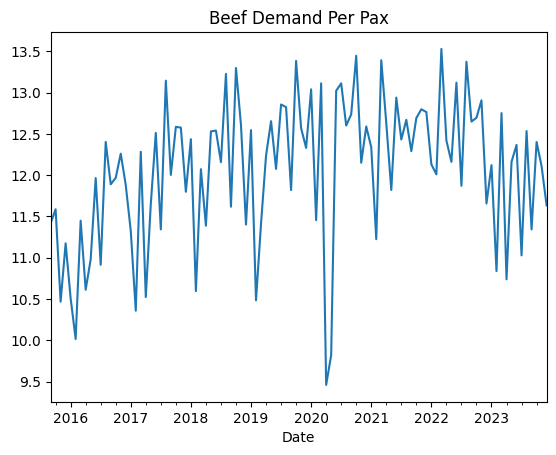

In [8]:
pseudo_demand[pseudo_demand['Animal'] == 'Beef']['demand_per_pax'][-100:].plot(title='Beef Demand Per Pax')
# pseudo_demand[pseudo_demand['Animal'] == 'Pork']['demand_per_pax'][-100:].plot(title='Pork Demand Per Pax')
# pseudo_demand[pseudo_demand['Animal'] == 'Broilers']['demand_per_pax'][-100:].plot(title='Broilers Demand Per Pax')

## Beef ARIMA

In [9]:
# I got the best params from the function executed on my local computer cos i needed pmdarima
# beef = pd.DataFrame(meat_prod[meat_prod['Animal'] == 'Beef'].drop('Date', axis=1).groupby('Date')['demand'].sum())
beef = pseudo_demand[pseudo_demand['Animal'] == 'Beef'].iloc[8:]
train, test = trainTestSplit(beef, months=50)
params = getBestParams(train, 10, 10, 10, value_name='demand_per_pax', season=12)
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  433
Model:             SARIMAX(2, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood                -322.943
Date:                                 Sun, 24 Mar 2024   AIC                            669.887
Time:                                         20:46:19   BIC                            718.708
Sample:                                     09-30-1983   HQIC                           689.161
                                          - 09-30-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0020      0.003     -0.739      0.460      -0.007       0.003
ar.L1         -1.1303      0.031    -36.631      0.000      -1.191      -1.070
ar.L2         -0.9319      0.028    -33.444      0.000      -0.987      -0.877
ma.L1          0.3734      0.060      6.191      0.000       0.255       0.492
ma.L2          0.1165      0.062      1.872      0.061      -0.005       0.238
ma.L3         -0.5624      0.051    -10.978      0.000      -0.663      -0.462
ma.L4         -0.0501      0.055     -0.917      0.359      -0.157       0.057
ar.S.L12       0.5056      0.226      2.237      0.025       0.063       0.949
ar.S.L24       0.4747      0.221      2.153      0.031       0.042       0.907
ma.S.L12      -0.1481      0.197     -0.750      0.453      -0.535       0.239
ma.S.L24      -0.5428      0.133     -4.077      0.000      -0.804      -0.282
sigma2         0.2619      0.019     13.897      0.000       0.225       0.299
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                12.31
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.28
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74062D+00    |proj g|=  6.62882D-01

At iterate    5    f=  1.29487D+00    |proj g|=  1.72926D-01

At iterate   10    f=  1.24161D+00    |proj g|=  3.11893D-02

At iterate   15    f=  1.22546D+00    |proj g|=  8.23208D-02

At iterate   20    f=  1.18848D+00    |proj g|=  6.04702D-02

At iterate   25    f=  1.17104D+00    |proj g|=  2.14530D-01

At iterate   30    f=  1.16267D+00    |proj g|=  1.92546D-01

At iterate   35    f=  1.15852D+00    |proj g|=  1.56352D-01

At iterate   40    f=  1.15801D+00    |proj g|=  2.34244D-02

At iterate   45    f=  1.15762D+00    |proj g|=  1.06961D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.15758D+00    |proj g|=  3.91117D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   3.911D-03   1.158D+00
  F =   1.1575807891689474     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66336D+00    |proj g|=  5.92051D-01


 This problem is unconstrained.



At iterate    5    f=  1.30214D+00    |proj g|=  1.15748D-01

At iterate   10    f=  1.25791D+00    |proj g|=  1.92399D-02

At iterate   15    f=  1.25122D+00    |proj g|=  5.30949D-02

At iterate   20    f=  1.24274D+00    |proj g|=  6.45781D-03

At iterate   25    f=  1.24255D+00    |proj g|=  9.08185D-03

At iterate   30    f=  1.24231D+00    |proj g|=  8.51776D-04

At iterate   35    f=  1.24230D+00    |proj g|=  2.69971D-03

At iterate   40    f=  1.24224D+00    |proj g|=  2.00232D-03

At iterate   45    f=  1.24223D+00    |proj g|=  4.06649D-04


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.24223D+00    |proj g|=  2.66099D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   2.661D-05   1.242D+00
  F =   1.2422321230969346     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74470D+00    |proj g|=  6.80512D-01

At iterate    5    f=  1.28834D+00    |proj g|=  1.68604D-01

At iterate   10    f=  1.23758D+00    |proj g|=  3.44710D-02

At iterate   15    f=  1.21863D+00    |proj g|=  1.29412D-01

At iterate   20    f=  1.18994D+00    |proj g|=  7.68095D-02

At iterate   25    f=  1.16975D+00    |proj g|=  1.38311D-01

At iterate   30    f=  1.15928D+00    |proj g|=  5.26138D-02

At iterate   35    f=  1.15741D+00    |proj g|=  2.25238D-02

At iterate   40    f=  1.15678D+00    |proj g|=  8.65749D-03

At iterate   45    f=  1.15601D+00    |proj g|=  1.03516D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.15468D+00    |proj g|=  4.85462D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   4.855D-02   1.155D+00
  F =   1.1546826047184815     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74352D+00    |proj g|=  6.82659D-01

At iterate    5    f=  1.28648D+00    |proj g|=  1.71632D-01

At iterate   10    f=  1.23666D+00    |proj g|=  3.52108D-02

At iterate   15    f=  1.21855D+00    |proj g|=  6.76124D-02

At iterate   20    f=  1.18183D+00    |proj g|=  1.23289D-01

At iterate   25    f=  1.17277D+00    |proj g|=  9.15939D-02

At iterate   30    f=  1.16264D+00    |proj g|=  3.14849D-01

At iterate   35    f=  1.16082D+00    |proj g|=  6.80503D-02

At iterate   40    f=  1.15795D+00    |proj g|=  7.08749D-02

At iterate   45    f=  1.15737D+00    |proj g|=  1.09694D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.15701D+00    |proj g|=  2.51046D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     56      1     0     0   2.510D-02   1.157D+00
  F =   1.1570054817515516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73890D+00    |proj g|=  6.78647D-01

At iterate    5    f=  1.28636D+00    |proj g|=  1.66507D-01

At iterate   10    f=  1.23489D+00    |proj g|=  3.30424D-02

At iterate   15    f=  1.21920D+00    |proj g|=  6.55062D-02

At iterate   20    f=  1.18191D+00    |proj g|=  1.65601D-01

At iterate   25    f=  1.16518D+00    |proj g|=  3.31124D-01

At iterate   30    f=  1.15550D+00    |proj g|=  7.35025D-02

At iterate   35    f=  1.15353D+00    |proj g|=  1.59555D-02

At iterate   40    f=  1.15228D+00    |proj g|=  2.52542D-02

At iterate   45    f=  1.15222D+00    |proj g|=  5.04624D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.15211D+00    |proj g|=  7.08035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   7.080D-02   1.152D+00
  F =   1.1521101033861114     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64656D+00    |proj g|=  5.65486D-01

At iterate    5    f=  1.29733D+00    |proj g|=  1.19519D-01

At iterate   10    f=  1.25347D+00    |proj g|=  2.01488D-02

At iterate   15    f=  1.24822D+00    |proj g|=  8.50081D-02

At iterate   20    f=  1.23867D+00    |proj g|=  6.45939D-02

At iterate   25    f=  1.23820D+00    |proj g|=  6.03626D-03

At iterate   30    f=  1.23804D+00    |proj g|=  9.07259D-04

At iterate   35    f=  1.23802D+00    |proj g|=  8.93174D-04

At iterate   40    f=  1.23799D+00    |proj g|=  4.18277D-03

At iterate   45    f=  1.23797D+00    |proj g|=  4.92312D-04


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.23797D+00    |proj g|=  6.77311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     53      1     0     0   6.773D-05   1.238D+00
  F =   1.2379686912842196     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66577D+00    |proj g|=  6.06699D-01

At iterate    5    f=  1.29795D+00    |proj g|=  1.80015D-01

At iterate   10    f=  1.25527D+00    |proj g|=  1.62526D-02

At iterate   15    f=  1.24874D+00    |proj g|=  6.46774D-02

At iterate   20    f=  1.24193D+00    |proj g|=  1.99574D-02

At iterate   25    f=  1.24096D+00    |proj g|=  1.28637D-02

At iterate   30    f=  1.24087D+00    |proj g|=  2.16133D-03

At iterate   35    f=  1.24086D+00    |proj g|=  2.59710D-03

At iterate   40    f=  1.24083D+00    |proj g|=  4.98515D-04

At iterate   45    f=  1.24083D+00    |proj g|=  8.34416D-04


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.24082D+00    |proj g|=  4.00995D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     54      1     0     0   4.010D-05   1.241D+00
  F =   1.2408245490802241     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75733D+00    |proj g|=  7.69688D-01


 This problem is unconstrained.



At iterate    5    f=  1.33620D+00    |proj g|=  1.62307D-01

At iterate   10    f=  1.29681D+00    |proj g|=  1.40701D-02

At iterate   15    f=  1.29103D+00    |proj g|=  2.59577D-02

At iterate   20    f=  1.28566D+00    |proj g|=  7.82277D-03

At iterate   25    f=  1.28543D+00    |proj g|=  3.94708D-03

At iterate   30    f=  1.28538D+00    |proj g|=  1.41379D-03

At iterate   35    f=  1.28532D+00    |proj g|=  8.89516D-04

At iterate   40    f=  1.28530D+00    |proj g|=  2.91281D-04

At iterate   45    f=  1.28529D+00    |proj g|=  4.91593D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.28472D+00    |proj g|=  5.57345D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     64      1     0     0   5.573D-02   1.285D+00
  F =   1.2847248792123396     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85660D+00    |proj g|=  8.87463D-01

At iterate    5    f=  1.33127D+00    |proj g|=  1.19431D-01

At iterate   10    f=  1.28634D+00    |proj g|=  4.15440D-02

At iterate   15    f=  1.28052D+00    |proj g|=  5.47547D-02

At iterate   20    f=  1.25907D+00    |proj g|=  4.02707D-01

At iterate   25    f=  1.24098D+00    |proj g|=  1.05893D-01

At iterate   30    f=  1.22698D+00    |proj g|=  8.47745D-02

At iterate   35    f=  1.22557D+00    |proj g|=  1.21349D-01

At iterate   40    f=  1.22214D+00    |proj g|=  1.90107D-01

At iterate   45    f=  1.22010D+00    |proj g|=  2.01923D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21934D+00    |proj g|=  1.33139D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   1.331D-02   1.219D+00
  F =   1.2193362976195667     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81308D+00    |proj g|=  7.62776D-01

At iterate    5    f=  1.33253D+00    |proj g|=  1.58055D-01

At iterate   10    f=  1.28706D+00    |proj g|=  2.92954D-02

At iterate   15    f=  1.27700D+00    |proj g|=  1.13679D-01

At iterate   20    f=  1.25914D+00    |proj g|=  1.73002D-01

At iterate   25    f=  1.23993D+00    |proj g|=  3.11546D-01

At iterate   30    f=  1.23504D+00    |proj g|=  1.86053D-01

At iterate   35    f=  1.23155D+00    |proj g|=  3.76215D-02

At iterate   40    f=  1.22624D+00    |proj g|=  1.81804D-01

At iterate   45    f=  1.22453D+00    |proj g|=  2.82608D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.22419D+00    |proj g|=  5.03148D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   5.031D-02   1.224D+00
  F =   1.2241941649602333     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82058D+00    |proj g|=  7.58652D-01

At iterate    5    f=  1.35078D+00    |proj g|=  1.71449D-01

At iterate   10    f=  1.30109D+00    |proj g|=  3.26106D-02

At iterate   15    f=  1.28994D+00    |proj g|=  4.10554D-02

At iterate   20    f=  1.26199D+00    |proj g|=  9.11274D-02

At iterate   25    f=  1.24205D+00    |proj g|=  2.83952D-01

At iterate   30    f=  1.22999D+00    |proj g|=  4.98481D-02

At iterate   35    f=  1.22729D+00    |proj g|=  1.86022D-01

At iterate   40    f=  1.22694D+00    |proj g|=  1.20527D-01

At iterate   45    f=  1.22632D+00    |proj g|=  8.40588D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.22610D+00    |proj g|=  1.53046D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   1.530D-02   1.226D+00
  F =   1.2261014062482845     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81672D+00    |proj g|=  7.53347D-01

At iterate    5    f=  1.34795D+00    |proj g|=  1.23846D-01

At iterate   10    f=  1.30016D+00    |proj g|=  2.04564D-02

At iterate   15    f=  1.28099D+00    |proj g|=  8.51386D-02

At iterate   20    f=  1.25367D+00    |proj g|=  2.53358D-01

At iterate   25    f=  1.23718D+00    |proj g|=  1.13242D-01

At iterate   30    f=  1.23161D+00    |proj g|=  3.14066D-02

At iterate   35    f=  1.22427D+00    |proj g|=  1.23665D-01

At iterate   40    f=  1.22254D+00    |proj g|=  4.02050D-02

At iterate   45    f=  1.21960D+00    |proj g|=  1.34718D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21941D+00    |proj g|=  1.24602D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   1.246D-02   1.219D+00
  F =   1.2194147883287729     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81047D+00    |proj g|=  7.46313D-01

At iterate    5    f=  1.34624D+00    |proj g|=  1.18195D-01

At iterate   10    f=  1.29835D+00    |proj g|=  2.38611D-02

At iterate   15    f=  1.28146D+00    |proj g|=  1.25368D-01

At iterate   20    f=  1.25586D+00    |proj g|=  4.49648D-02

At iterate   25    f=  1.24368D+00    |proj g|=  4.19470D-02

At iterate   30    f=  1.23201D+00    |proj g|=  3.75780D-01

At iterate   35    f=  1.22691D+00    |proj g|=  5.65780D-02

At iterate   40    f=  1.22541D+00    |proj g|=  6.67802D-02

At iterate   45    f=  1.22446D+00    |proj g|=  4.25530D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.22265D+00    |proj g|=  1.21926D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   1.219D-01   1.223D+00
  F =   1.2226498023236705     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81315D+00    |proj g|=  7.56344D-01

At iterate    5    f=  1.34466D+00    |proj g|=  1.20585D-01

At iterate   10    f=  1.29709D+00    |proj g|=  1.98965D-02

At iterate   15    f=  1.28256D+00    |proj g|=  1.09278D-01

At iterate   20    f=  1.25505D+00    |proj g|=  5.07085D-02

At iterate   25    f=  1.24477D+00    |proj g|=  1.14909D-01

At iterate   30    f=  1.22790D+00    |proj g|=  1.01905D-01

At iterate   35    f=  1.22434D+00    |proj g|=  4.68284D-01

At iterate   40    f=  1.22347D+00    |proj g|=  7.20984D-02

At iterate   45    f=  1.22318D+00    |proj g|=  3.05084D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.22292D+00    |proj g|=  2.15897D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     63      1     0     0   2.159D-02   1.223D+00
  F =   1.2229214132383408     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84527D+00    |proj g|=  8.37588D-01

At iterate    5    f=  1.34405D+00    |proj g|=  1.73833D-01

At iterate   10    f=  1.29418D+00    |proj g|=  3.09621D-02

At iterate   15    f=  1.28396D+00    |proj g|=  5.22281D-02

At iterate   20    f=  1.25960D+00    |proj g|=  8.45020D-02

At iterate   25    f=  1.23820D+00    |proj g|=  7.53286D-02

At iterate   30    f=  1.23176D+00    |proj g|=  1.92630D-01

At iterate   35    f=  1.22620D+00    |proj g|=  6.01421D-02

At iterate   40    f=  1.22224D+00    |proj g|=  8.58832D-02

At iterate   45    f=  1.22073D+00    |proj g|=  2.92793D-02

At iterate   50    f=  1.22031D+00    |proj g|=  1.50086D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85150D+00    |proj g|=  8.57613D-01

At iterate    5    f=  1.34060D+00    |proj g|=  1.01124D-01

At iterate   10    f=  1.29728D+00    |proj g|=  5.03179D-02

At iterate   15    f=  1.28801D+00    |proj g|=  5.88798D-02

At iterate   20    f=  1.26719D+00    |proj g|=  2.07078D-01

At iterate   25    f=  1.24692D+00    |proj g|=  5.10324D-02

At iterate   30    f=  1.22473D+00    |proj g|=  1.50915D-01

At iterate   35    f=  1.21860D+00    |proj g|=  1.21847D-01

At iterate   40    f=  1.21770D+00    |proj g|=  1.49118D-02

At iterate   45    f=  1.21705D+00    |proj g|=  3.37061D-02

At iterate   50    f=  1.21693D+00    |proj g|=  3.64299D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85887D+00    |proj g|=  8.76959D-01

At iterate    5    f=  1.35519D+00    |proj g|=  1.72431D-01

At iterate   10    f=  1.29483D+00    |proj g|=  7.49818D-02

At iterate   15    f=  1.28620D+00    |proj g|=  2.08928D-02

At iterate   20    f=  1.24850D+00    |proj g|=  2.96963D-01

At iterate   25    f=  1.23119D+00    |proj g|=  1.66766D-01

At iterate   30    f=  1.22212D+00    |proj g|=  6.25937D-02

At iterate   35    f=  1.21922D+00    |proj g|=  5.37990D-02

At iterate   40    f=  1.21762D+00    |proj g|=  2.52419D-02

At iterate   45    f=  1.21594D+00    |proj g|=  9.89624D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21557D+00    |proj g|=  1.46890D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   1.469D-02   1.216D+00
  F =   1.2155713490205171     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86038D+00    |proj g|=  8.75663D-01

At iterate    5    f=  1.33933D+00    |proj g|=  1.54128D-01

At iterate   10    f=  1.28878D+00    |proj g|=  1.64378D-02

At iterate   15    f=  1.27473D+00    |proj g|=  1.36959D-01

At iterate   20    f=  1.24616D+00    |proj g|=  4.90981D-02

At iterate   25    f=  1.23032D+00    |proj g|=  1.56676D-01

At iterate   30    f=  1.22042D+00    |proj g|=  1.32608D-01

At iterate   35    f=  1.21922D+00    |proj g|=  6.53146D-02

At iterate   40    f=  1.21650D+00    |proj g|=  2.77814D-01

At iterate   45    f=  1.21518D+00    |proj g|=  1.93733D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21403D+00    |proj g|=  4.13469D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   4.135D-02   1.214D+00
  F =   1.2140314586845764     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84163D+00    |proj g|=  8.37568D-01

At iterate    5    f=  1.33715D+00    |proj g|=  1.18557D-01

At iterate   10    f=  1.28798D+00    |proj g|=  1.89144D-02

At iterate   15    f=  1.27309D+00    |proj g|=  6.47306D-02

At iterate   20    f=  1.24168D+00    |proj g|=  7.19135D-02

At iterate   25    f=  1.21851D+00    |proj g|=  6.38393D-01

At iterate   30    f=  1.21320D+00    |proj g|=  3.76354D-02

At iterate   35    f=  1.21141D+00    |proj g|=  2.02173D-02

At iterate   40    f=  1.21125D+00    |proj g|=  1.01379D-02

At iterate   45    f=  1.21115D+00    |proj g|=  2.81120D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21087D+00    |proj g|=  1.16430D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   1.164D-01   1.211D+00
  F =   1.2108677495799112     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77449D+00    |proj g|=  6.57532D-01

At iterate    5    f=  1.34926D+00    |proj g|=  1.49104D-01

At iterate   10    f=  1.29477D+00    |proj g|=  2.67556D-02

At iterate   15    f=  1.28156D+00    |proj g|=  2.22886D-01

At iterate   20    f=  1.25366D+00    |proj g|=  6.50580D-02

At iterate   25    f=  1.22836D+00    |proj g|=  8.38675D-02

At iterate   30    f=  1.21953D+00    |proj g|=  3.19504D-01

At iterate   35    f=  1.21727D+00    |proj g|=  1.12637D-01

At iterate   40    f=  1.21567D+00    |proj g|=  7.03610D-02

At iterate   45    f=  1.21413D+00    |proj g|=  8.67532D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21406D+00    |proj g|=  1.65883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   1.659D-02   1.214D+00
  F =   1.2140571119256116     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72183D+00    |proj g|=  5.44674D-01

At iterate    5    f=  1.33934D+00    |proj g|=  1.57985D-01

At iterate   10    f=  1.29793D+00    |proj g|=  2.97779D-02

At iterate   15    f=  1.28003D+00    |proj g|=  1.16715D-01

At iterate   20    f=  1.25671D+00    |proj g|=  2.95600D-01

At iterate   25    f=  1.24008D+00    |proj g|=  1.15296D-01

At iterate   30    f=  1.23305D+00    |proj g|=  4.11107D-02

At iterate   35    f=  1.21749D+00    |proj g|=  1.12424D-01

At iterate   40    f=  1.21578D+00    |proj g|=  1.91803D-02

At iterate   45    f=  1.21568D+00    |proj g|=  2.23805D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21533D+00    |proj g|=  3.70425D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   3.704D-02   1.215D+00
  F =   1.2153299295173694     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72097D+00    |proj g|=  5.48900D-01

At iterate    5    f=  1.33812D+00    |proj g|=  1.70452D-01

At iterate   10    f=  1.29836D+00    |proj g|=  3.12166D-02

At iterate   15    f=  1.28144D+00    |proj g|=  4.43965D-02

At iterate   20    f=  1.25515D+00    |proj g|=  3.95329D-02

At iterate   25    f=  1.24010D+00    |proj g|=  6.61436D-02

At iterate   30    f=  1.23146D+00    |proj g|=  1.80160D-01

At iterate   35    f=  1.22400D+00    |proj g|=  1.80323D-01

At iterate   40    f=  1.21980D+00    |proj g|=  4.65083D-02

At iterate   45    f=  1.21929D+00    |proj g|=  5.65872D-02

At iterate   50    f=  1.21907D+00    |proj g|=  7.09484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70912D+00    |proj g|=  5.26652D-01

At iterate    5    f=  1.33174D+00    |proj g|=  1.06810D-01

At iterate   10    f=  1.29000D+00    |proj g|=  6.07141D-02

At iterate   15    f=  1.28230D+00    |proj g|=  7.80112D-02

At iterate   20    f=  1.26478D+00    |proj g|=  1.60012D-01

At iterate   25    f=  1.25300D+00    |proj g|=  8.35297D-02

At iterate   30    f=  1.24477D+00    |proj g|=  3.03927D-01

At iterate   35    f=  1.23843D+00    |proj g|=  2.98384D-01

At iterate   40    f=  1.23137D+00    |proj g|=  1.75883D-01

At iterate   45    f=  1.22746D+00    |proj g|=  3.72673D-01



/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


At iterate   50    f=  1.22245D+00    |proj g|=  7.02429D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   7.024D-01   1.222D+00
  F =   1.2224509704936917     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69685D+00    |proj g|=  5.04974D-01

At iterate    5    f=  1.34263D+00    |proj g|=  1.67718D-01

At iterate   10    f=  1.29326D+00    |proj g|=  4.03035D-02

At iterate   15    f=  1.28245D+00    |proj g|=  3.13038D-02

At iterate   20    f=  1.26206D+00    |proj g|=  1.74407D-01

At iterate   25    f=  1.24180D+00    |proj g|=  4.21396D-02

At iterate   30    f=  1.23167D+00    |proj g|=  5.33993D-02

At iterate   35    f=  1.22857D+00    |proj g|=  5.67616D-02

At iterate   40    f=  1.22371D+00    |proj g|=  7.24207D-01

At iterate   45    f=  1.22240D+00    |proj g|=  3.36670D-01

At iterate   50    f=  1.21725D+00    |proj g|=  6.13841D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69990D+00    |proj g|=  5.14266D-01

At iterate    5    f=  1.34276D+00    |proj g|=  1.44347D-01

At iterate   10    f=  1.29288D+00    |proj g|=  3.50914D-02

At iterate   15    f=  1.28249D+00    |proj g|=  4.60992D-02

At iterate   20    f=  1.25890D+00    |proj g|=  5.97170D-02

At iterate   25    f=  1.23246D+00    |proj g|=  5.75884D-02

At iterate   30    f=  1.22522D+00    |proj g|=  9.05347D-02

At iterate   35    f=  1.21344D+00    |proj g|=  2.17919D-01

At iterate   40    f=  1.21119D+00    |proj g|=  4.09864D-02

At iterate   45    f=  1.21038D+00    |proj g|=  7.66714D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.21035D+00    |proj g|=  6.78820D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   6.788D-02   1.210D+00
  F =   1.2103535305334656     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69328D+00    |proj g|=  5.03799D-01

At iterate    5    f=  1.33998D+00    |proj g|=  1.64088D-01

At iterate   10    f=  1.29072D+00    |proj g|=  3.69435D-02

At iterate   15    f=  1.28168D+00    |proj g|=  3.87848D-02

At iterate   20    f=  1.25085D+00    |proj g|=  5.37002D-02

At iterate   25    f=  1.23785D+00    |proj g|=  1.44629D-01

At iterate   30    f=  1.22063D+00    |proj g|=  3.18119D-01

At iterate   35    f=  1.21711D+00    |proj g|=  9.45531D-02

At iterate   40    f=  1.21277D+00    |proj g|=  6.88906D-02

At iterate   45    f=  1.21209D+00    |proj g|=  6.10612D-02

At iterate   50    f=  1.20875D+00    |proj g|=  2.54136D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67015D+00    |proj g|=  4.54764D-01

At iterate    5    f=  1.33503D+00    |proj g|=  1.84158D-01

At iterate   10    f=  1.28992D+00    |proj g|=  5.27504D-02

At iterate   15    f=  1.28125D+00    |proj g|=  2.50954D-02

At iterate   20    f=  1.25333D+00    |proj g|=  2.48521D-01

At iterate   25    f=  1.22653D+00    |proj g|=  1.03819D-01

At iterate   30    f=  1.21796D+00    |proj g|=  5.69448D-02

At iterate   35    f=  1.21332D+00    |proj g|=  3.38188D-01

At iterate   40    f=  1.21206D+00    |proj g|=  1.58581D-02

At iterate   45    f=  1.21087D+00    |proj g|=  1.65474D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20986D+00    |proj g|=  5.36999D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     55      1     0     0   5.370D-02   1.210D+00
  F =   1.2098647136694198     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66811D+00    |proj g|=  4.55213D-01

At iterate    5    f=  1.33159D+00    |proj g|=  1.81500D-01

At iterate   10    f=  1.28844D+00    |proj g|=  5.24592D-02

At iterate   15    f=  1.28043D+00    |proj g|=  2.48507D-02

At iterate   20    f=  1.25325D+00    |proj g|=  2.31794D-01

At iterate   25    f=  1.23435D+00    |proj g|=  2.50604D-01

At iterate   30    f=  1.21634D+00    |proj g|=  3.59643D-01

At iterate   35    f=  1.21337D+00    |proj g|=  2.85484D-02

At iterate   40    f=  1.21090D+00    |proj g|=  5.67137D-02

At iterate   45    f=  1.20976D+00    |proj g|=  2.55102D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20955D+00    |proj g|=  1.87385D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     55      1     0     0   1.874D-02   1.210D+00
  F =   1.2095535752826623     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66234D+00    |proj g|=  4.43088D-01

At iterate    5    f=  1.33218D+00    |proj g|=  1.63878D-01

At iterate   10    f=  1.28666D+00    |proj g|=  4.93083D-02

At iterate   15    f=  1.27673D+00    |proj g|=  3.43905D-02

At iterate   20    f=  1.25092D+00    |proj g|=  2.08381D-01

At iterate   25    f=  1.21909D+00    |proj g|=  2.19455D-01

At iterate   30    f=  1.21485D+00    |proj g|=  2.58327D-02

At iterate   35    f=  1.21108D+00    |proj g|=  4.63765D-02

At iterate   40    f=  1.20798D+00    |proj g|=  5.19053D-02

At iterate   45    f=  1.20743D+00    |proj g|=  7.88660D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20715D+00    |proj g|=  7.19809D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   7.198D-02   1.207D+00
  F =   1.2071514748481544     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64502D+00    |proj g|=  4.04412D-01

At iterate    5    f=  1.31651D+00    |proj g|=  9.74464D-02

At iterate   10    f=  1.28153D+00    |proj g|=  3.22960D-02

At iterate   15    f=  1.27478D+00    |proj g|=  2.44235D-02

At iterate   20    f=  1.25804D+00    |proj g|=  7.93462D-02

At iterate   25    f=  1.23415D+00    |proj g|=  3.97405D-02

At iterate   30    f=  1.21970D+00    |proj g|=  1.20558D-01

At iterate   35    f=  1.21118D+00    |proj g|=  1.82599D-01

At iterate   40    f=  1.20862D+00    |proj g|=  2.06084D-02

At iterate   45    f=  1.20839D+00    |proj g|=  4.71429D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20785D+00    |proj g|=  2.98211D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.982D-02   1.208D+00
  F =   1.2078484753192327     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65310D+00    |proj g|=  4.29232D-01

At iterate    5    f=  1.30687D+00    |proj g|=  1.01755D-01

At iterate   10    f=  1.28423D+00    |proj g|=  7.33919D-02

At iterate   15    f=  1.27271D+00    |proj g|=  5.77812D-02

At iterate   20    f=  1.24811D+00    |proj g|=  2.90561D-01

At iterate   25    f=  1.22854D+00    |proj g|=  2.66369D-01

At iterate   30    f=  1.21120D+00    |proj g|=  1.72148D-01

At iterate   35    f=  1.20976D+00    |proj g|=  8.86211D-03

At iterate   40    f=  1.20920D+00    |proj g|=  2.46780D-02

At iterate   45    f=  1.20870D+00    |proj g|=  1.44869D-01

At iterate   50    f=  1.20490D+00    |proj g|=  3.26545D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64579D+00    |proj g|=  4.11705D-01

At iterate    5    f=  1.31364D+00    |proj g|=  1.16090D-01

At iterate   10    f=  1.27909D+00    |proj g|=  2.62541D-02

At iterate   15    f=  1.26660D+00    |proj g|=  1.82473D-01

At iterate   20    f=  1.24263D+00    |proj g|=  4.06845D-02

At iterate   25    f=  1.23092D+00    |proj g|=  7.35429D-02

At iterate   30    f=  1.21169D+00    |proj g|=  1.08072D-01

At iterate   35    f=  1.20487D+00    |proj g|=  3.61231D-01

At iterate   40    f=  1.20252D+00    |proj g|=  5.67184D-01

At iterate   45    f=  1.20167D+00    |proj g|=  3.95587D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20137D+00    |proj g|=  1.68073D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   1.681D-02   1.201D+00
  F =   1.2013698229030181     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64921D+00    |proj g|=  4.26948D-01

At iterate    5    f=  1.31794D+00    |proj g|=  5.01252D-01

At iterate   10    f=  1.28101D+00    |proj g|=  2.11354D-02

At iterate   15    f=  1.27363D+00    |proj g|=  5.63654D-02

At iterate   20    f=  1.24841D+00    |proj g|=  1.23160D-01

At iterate   25    f=  1.22096D+00    |proj g|=  4.71092D-01

At iterate   30    f=  1.21190D+00    |proj g|=  7.43548D-02

At iterate   35    f=  1.21054D+00    |proj g|=  4.05045D-02

At iterate   40    f=  1.21007D+00    |proj g|=  1.19964D-02

At iterate   45    f=  1.20921D+00    |proj g|=  1.07662D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20792D+00    |proj g|=  4.83638D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   4.836D-02   1.208D+00
  F =   1.2079172389413024     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64533D+00    |proj g|=  4.21354D-01

At iterate    5    f=  1.31030D+00    |proj g|=  1.08806D-01

At iterate   10    f=  1.27899D+00    |proj g|=  3.89900D-02

At iterate   15    f=  1.27266D+00    |proj g|=  2.43874D-02

At iterate   20    f=  1.24256D+00    |proj g|=  1.01624D-01

At iterate   25    f=  1.22671D+00    |proj g|=  6.87833D-02

At iterate   30    f=  1.21844D+00    |proj g|=  1.39024D-01

At iterate   35    f=  1.21299D+00    |proj g|=  4.22798D-02

At iterate   40    f=  1.20885D+00    |proj g|=  1.38648D-01

At iterate   45    f=  1.20805D+00    |proj g|=  1.38502D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20781D+00    |proj g|=  9.11636D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     54      1     0     0   9.116D-02   1.208D+00
  F =   1.2078115729760754     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65095D+00    |proj g|=  4.40400D-01

At iterate    5    f=  1.31286D+00    |proj g|=  3.43890D-01

At iterate   10    f=  1.27713D+00    |proj g|=  4.02205D-02

At iterate   15    f=  1.26272D+00    |proj g|=  1.05908D-01

At iterate   20    f=  1.23863D+00    |proj g|=  1.43172D-01

At iterate   25    f=  1.22409D+00    |proj g|=  4.05496D-02

At iterate   30    f=  1.21356D+00    |proj g|=  9.65240D-02

At iterate   35    f=  1.20895D+00    |proj g|=  5.58166D-02

At iterate   40    f=  1.20776D+00    |proj g|=  4.51194D-02

At iterate   45    f=  1.20766D+00    |proj g|=  8.70823D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20603D+00    |proj g|=  1.07709D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   1.077D-01   1.206D+00
  F =   1.2060250095240606     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65727D+00    |proj g|=  4.57112D-01

At iterate    5    f=  1.32875D+00    |proj g|=  1.72196D-01

At iterate   10    f=  1.28296D+00    |proj g|=  7.63770D-02

At iterate   15    f=  1.27218D+00    |proj g|=  1.77151D-02

At iterate   20    f=  1.25299D+00    |proj g|=  2.92605D-01

At iterate   25    f=  1.22994D+00    |proj g|=  5.71611D-02

At iterate   30    f=  1.20995D+00    |proj g|=  4.81405D-02

At iterate   35    f=  1.20448D+00    |proj g|=  1.43278D-01

At iterate   40    f=  1.20421D+00    |proj g|=  5.62470D-02

At iterate   45    f=  1.20206D+00    |proj g|=  1.67830D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.20027D+00    |proj g|=  2.82648D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     55      1     0     0   2.826D-01   1.200D+00
  F =   1.2002712685599544     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66207D+00    |proj g|=  4.72023D-01

At iterate    5    f=  1.30759D+00    |proj g|=  1.38545D-01

At iterate   10    f=  1.27774D+00    |proj g|=  1.24847D-01

At iterate   15    f=  1.26415D+00    |proj g|=  5.89996D-02

At iterate   20    f=  1.24463D+00    |proj g|=  6.09296D-02

At iterate   25    f=  1.21654D+00    |proj g|=  2.41973D-01

At iterate   30    f=  1.20862D+00    |proj g|=  8.07443D-02

At iterate   35    f=  1.20227D+00    |proj g|=  4.52563D-02

At iterate   40    f=  1.20159D+00    |proj g|=  1.19676D-01

At iterate   45    f=  1.20114D+00    |proj g|=  3.58509D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19979D+00    |proj g|=  1.09950D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   1.099D-01   1.200D+00
  F =   1.1997898962119067     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65433D+00    |proj g|=  4.56958D-01

At iterate    5    f=  1.30749D+00    |proj g|=  2.61035D-01

At iterate   10    f=  1.27227D+00    |proj g|=  6.38334D-02

At iterate   15    f=  1.25810D+00    |proj g|=  9.32154D-02

At iterate   20    f=  1.23328D+00    |proj g|=  8.62762D-02

At iterate   25    f=  1.21690D+00    |proj g|=  1.86440D-01

At iterate   30    f=  1.20394D+00    |proj g|=  1.05112D+00

At iterate   35    f=  1.20123D+00    |proj g|=  6.05177D-02

At iterate   40    f=  1.19478D+00    |proj g|=  7.64867D-02

At iterate   45    f=  1.19462D+00    |proj g|=  4.14376D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19459D+00    |proj g|=  1.72616D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   1.726D-02   1.195D+00
  F =   1.1945935513876942     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66716D+00    |proj g|=  4.89496D-01

At iterate    5    f=  1.30515D+00    |proj g|=  8.87505D-02

At iterate   10    f=  1.27178D+00    |proj g|=  7.51474D-02

At iterate   15    f=  1.25981D+00    |proj g|=  3.03043D-02

At iterate   20    f=  1.23750D+00    |proj g|=  1.27260D-01

At iterate   25    f=  1.20980D+00    |proj g|=  1.62649D-01

At iterate   30    f=  1.20462D+00    |proj g|=  9.75800D-02

At iterate   35    f=  1.19979D+00    |proj g|=  2.16215D-01

At iterate   40    f=  1.19757D+00    |proj g|=  1.76857D-02

At iterate   45    f=  1.19628D+00    |proj g|=  9.69742D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19404D+00    |proj g|=  1.41359D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   1.414D-01   1.194D+00
  F =   1.1940398893409527     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67437D+00    |proj g|=  5.05567D-01

At iterate    5    f=  1.31065D+00    |proj g|=  9.27654D-02

At iterate   10    f=  1.27249D+00    |proj g|=  6.48230D-02

At iterate   15    f=  1.26623D+00    |proj g|=  2.28346D-02

At iterate   20    f=  1.24796D+00    |proj g|=  6.93378D-02

At iterate   25    f=  1.23225D+00    |proj g|=  3.70912D-01

At iterate   30    f=  1.21381D+00    |proj g|=  2.69248D-01

At iterate   35    f=  1.21046D+00    |proj g|=  4.55677D-02

At iterate   40    f=  1.19936D+00    |proj g|=  9.65586D-02

At iterate   45    f=  1.19200D+00    |proj g|=  7.65780D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19155D+00    |proj g|=  6.59495D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   6.595D-02   1.192D+00
  F =   1.1915484210961858     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67808D+00    |proj g|=  5.17413D-01

At iterate    5    f=  1.30923D+00    |proj g|=  1.02752D-01

At iterate   10    f=  1.26934D+00    |proj g|=  4.81135D-02

At iterate   15    f=  1.26183D+00    |proj g|=  2.26501D-02

At iterate   20    f=  1.24057D+00    |proj g|=  5.47406D-02

At iterate   25    f=  1.20933D+00    |proj g|=  7.69602D-02

At iterate   30    f=  1.20202D+00    |proj g|=  5.83614D-02

At iterate   35    f=  1.19773D+00    |proj g|=  6.51071D-02

At iterate   40    f=  1.19689D+00    |proj g|=  1.77885D-01

At iterate   45    f=  1.19681D+00    |proj g|=  9.03961D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19669D+00    |proj g|=  2.82993D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   2.830D-02   1.197D+00
  F =   1.1966940857783048     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72264D+00    |proj g|=  6.21739D-01

At iterate    5    f=  1.32002D+00    |proj g|=  1.98959D-01

At iterate   10    f=  1.27037D+00    |proj g|=  3.24569D-02

At iterate   15    f=  1.26376D+00    |proj g|=  2.49677D-02

At iterate   20    f=  1.23933D+00    |proj g|=  1.16188D-01

At iterate   25    f=  1.21490D+00    |proj g|=  4.37889D-01

At iterate   30    f=  1.20401D+00    |proj g|=  1.82088D-01

At iterate   35    f=  1.20250D+00    |proj g|=  4.89937D-02

At iterate   40    f=  1.19353D+00    |proj g|=  1.57419D-01

At iterate   45    f=  1.19237D+00    |proj g|=  1.57067D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19226D+00    |proj g|=  3.18955D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   3.190D-02   1.192D+00
  F =   1.1922608954538179     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70661D+00    |proj g|=  5.86180D-01

At iterate    5    f=  1.30945D+00    |proj g|=  9.90409D-02

At iterate   10    f=  1.26700D+00    |proj g|=  2.09566D-02

At iterate   15    f=  1.25642D+00    |proj g|=  3.94778D-02

At iterate   20    f=  1.23816D+00    |proj g|=  1.01440D-01

At iterate   25    f=  1.21595D+00    |proj g|=  5.62426D-01

At iterate   30    f=  1.20412D+00    |proj g|=  1.50709D-01

At iterate   35    f=  1.19371D+00    |proj g|=  2.03794D-01

At iterate   40    f=  1.19067D+00    |proj g|=  3.61931D-02

At iterate   45    f=  1.19030D+00    |proj g|=  1.51147D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.18999D+00    |proj g|=  5.73013D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   5.730D-03   1.190D+00
  F =   1.1899899225030000     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72206D+00    |proj g|=  6.24393D-01

At iterate    5    f=  1.31204D+00    |proj g|=  1.04710D-01

At iterate   10    f=  1.26819D+00    |proj g|=  2.83273D-02

At iterate   15    f=  1.25827D+00    |proj g|=  2.03099D-01

At iterate   20    f=  1.23636D+00    |proj g|=  1.95706D-01

At iterate   25    f=  1.22263D+00    |proj g|=  1.54896D-01

At iterate   30    f=  1.21271D+00    |proj g|=  1.01087D-01

At iterate   35    f=  1.20620D+00    |proj g|=  3.56719D-01

At iterate   40    f=  1.20540D+00    |proj g|=  6.29884D-02

At iterate   45    f=  1.19876D+00    |proj g|=  4.10679D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19754D+00    |proj g|=  4.43613D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   4.436D-01   1.198D+00
  F =   1.1975390140654902     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73070D+00    |proj g|=  6.50668D-01

At iterate    5    f=  1.31370D+00    |proj g|=  1.11073D-01

At iterate   10    f=  1.26909D+00    |proj g|=  2.13723D-02

At iterate   15    f=  1.25932D+00    |proj g|=  6.29397D-02

At iterate   20    f=  1.23113D+00    |proj g|=  1.03856D-01

At iterate   25    f=  1.21475D+00    |proj g|=  1.85366D-01

At iterate   30    f=  1.19741D+00    |proj g|=  2.53921D-01

At iterate   35    f=  1.19389D+00    |proj g|=  5.40472D-02

At iterate   40    f=  1.19209D+00    |proj g|=  2.49970D-02

At iterate   45    f=  1.19204D+00    |proj g|=  4.22086D-02

At iterate   50    f=  1.19196D+00    |proj g|=  6.62348D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72573D+00    |proj g|=  6.39808D-01

At iterate    5    f=  1.31237D+00    |proj g|=  1.05833D-01

At iterate   10    f=  1.26796D+00    |proj g|=  2.96881D-02

At iterate   15    f=  1.25599D+00    |proj g|=  1.31503D-01

At iterate   20    f=  1.23070D+00    |proj g|=  7.29080D-02

At iterate   25    f=  1.20998D+00    |proj g|=  1.92718D-01

At iterate   30    f=  1.20072D+00    |proj g|=  9.50949D-02

At iterate   35    f=  1.19541D+00    |proj g|=  2.25834D-01

At iterate   40    f=  1.18905D+00    |proj g|=  1.28113D-01

At iterate   45    f=  1.18727D+00    |proj g|=  7.93108D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.18676D+00    |proj g|=  1.03364D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   1.034D-02   1.187D+00
  F =   1.1867640775452788     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71966D+00    |proj g|=  6.28005D-01

At iterate    5    f=  1.31085D+00    |proj g|=  1.07267D-01

At iterate   10    f=  1.26725D+00    |proj g|=  2.51242D-02

At iterate   15    f=  1.25387D+00    |proj g|=  8.93119D-02

At iterate   20    f=  1.23614D+00    |proj g|=  2.21814D-01

At iterate   25    f=  1.21866D+00    |proj g|=  1.35675D-01

At iterate   30    f=  1.20824D+00    |proj g|=  1.88950D-01

At iterate   35    f=  1.20524D+00    |proj g|=  3.33324D-01

At iterate   40    f=  1.19952D+00    |proj g|=  3.68742D-02

At iterate   45    f=  1.19605D+00    |proj g|=  6.10847D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19373D+00    |proj g|=  4.11540D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   4.115D-02   1.194D+00
  F =   1.1937337624453606     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72619D+00    |proj g|=  6.44551D-01

At iterate    5    f=  1.31464D+00    |proj g|=  1.88682D-01

At iterate   10    f=  1.26772D+00    |proj g|=  2.98423D-02

At iterate   15    f=  1.25990D+00    |proj g|=  3.06403D-02

At iterate   20    f=  1.23025D+00    |proj g|=  7.33265D-02

At iterate   25    f=  1.21449D+00    |proj g|=  4.20716D-02

At iterate   30    f=  1.20440D+00    |proj g|=  4.25791D-02

At iterate   35    f=  1.19652D+00    |proj g|=  2.90920D-02

At iterate   40    f=  1.19478D+00    |proj g|=  1.66540D-01

At iterate   45    f=  1.19212D+00    |proj g|=  1.76428D-01

At iterate   50    f=  1.19184D+00    |proj g|=  3.09517D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71149D+00    |proj g|=  6.10356D-01

At iterate    5    f=  1.31336D+00    |proj g|=  1.87041D-01

At iterate   10    f=  1.26659D+00    |proj g|=  3.31209D-02

At iterate   15    f=  1.26005D+00    |proj g|=  2.98242D-02

At iterate   20    f=  1.23355D+00    |proj g|=  7.13212D-02

At iterate   25    f=  1.20368D+00    |proj g|=  5.53906D-01

At iterate   30    f=  1.19854D+00    |proj g|=  6.75611D-02

At iterate   35    f=  1.19146D+00    |proj g|=  3.89079D-01

At iterate   40    f=  1.19010D+00    |proj g|=  5.51605D-02

At iterate   45    f=  1.18828D+00    |proj g|=  1.51412D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.18787D+00    |proj g|=  1.40987D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   1.410D-02   1.188D+00
  F =   1.1878688701935198     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71563D+00    |proj g|=  6.26648D-01

At iterate    5    f=  1.30548D+00    |proj g|=  9.83125D-02

At iterate   10    f=  1.26356D+00    |proj g|=  1.37215D-02

At iterate   15    f=  1.24886D+00    |proj g|=  7.41789D-02

At iterate   20    f=  1.23171D+00    |proj g|=  4.89100D-02

At iterate   25    f=  1.21098D+00    |proj g|=  5.63853D-02

At iterate   30    f=  1.20678D+00    |proj g|=  1.88170D-01

At iterate   35    f=  1.20467D+00    |proj g|=  9.66001D-02

At iterate   40    f=  1.20210D+00    |proj g|=  2.74215D-01

At iterate   45    f=  1.19919D+00    |proj g|=  5.53754D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19689D+00    |proj g|=  1.05753D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   1.058D-01   1.197D+00
  F =   1.1968909241699839     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70338D+00    |proj g|=  6.03048D-01

At iterate    5    f=  1.30273D+00    |proj g|=  1.00009D-01

At iterate   10    f=  1.26120D+00    |proj g|=  1.52162D-02

At iterate   15    f=  1.24640D+00    |proj g|=  1.82105D-01

At iterate   20    f=  1.22693D+00    |proj g|=  1.13912D-01

At iterate   25    f=  1.21422D+00    |proj g|=  3.10997D-02

At iterate   30    f=  1.20243D+00    |proj g|=  5.45142D-01

At iterate   35    f=  1.19940D+00    |proj g|=  2.61795D-01

At iterate   40    f=  1.19896D+00    |proj g|=  9.45127D-02

At iterate   45    f=  1.19688D+00    |proj g|=  1.12216D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.19371D+00    |proj g|=  1.43626D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   1.436D-01   1.194D+00
  F =   1.1937093958200986     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


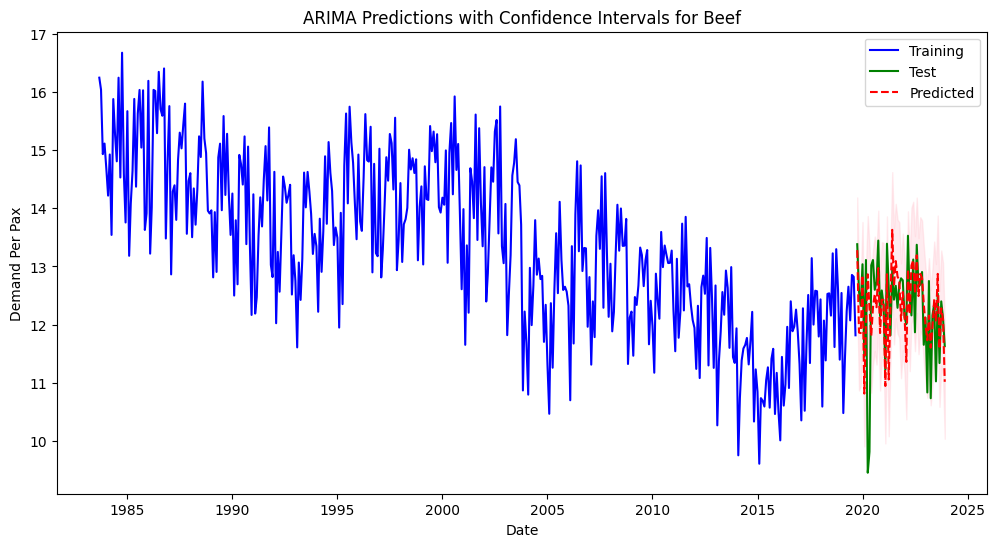

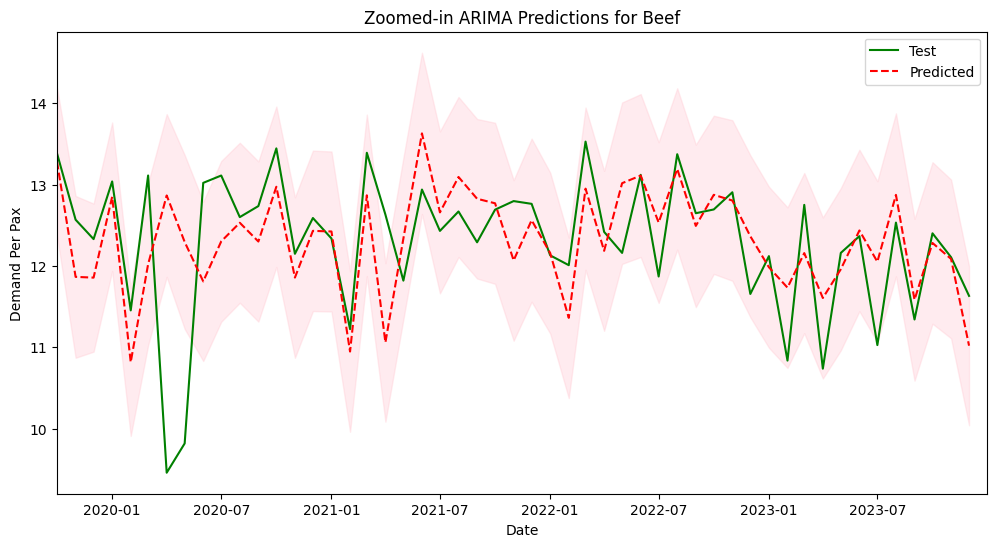

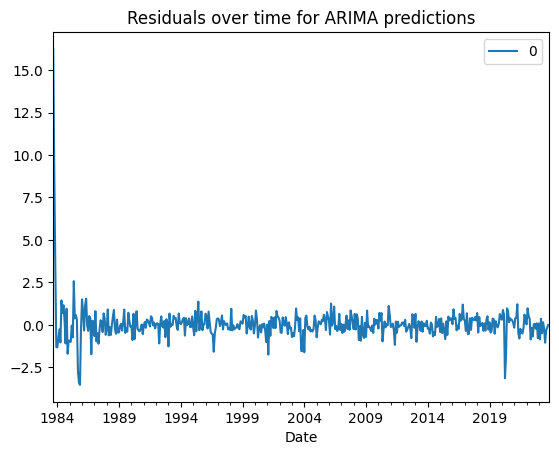

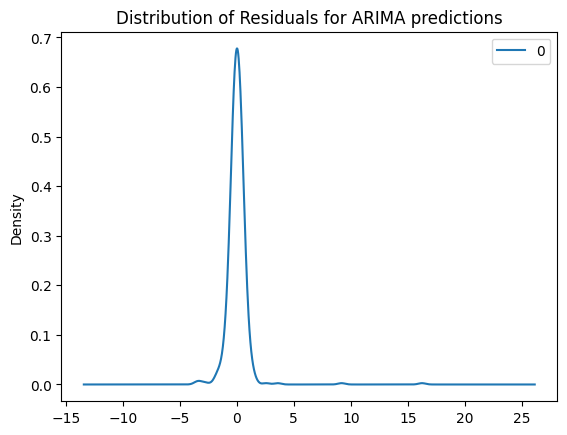

                0
count  483.000000
mean     0.039746
std      1.061692
min     -3.528797
25%     -0.308768
50%      0.019097
75%      0.359974
max     16.242401


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x3079f9810>,
    Product     Time  Actual Price  Predicted Price
 0     Beef  2019-10     13.382616        13.280342
 1     Beef  2019-11     12.568081        11.865598
 2     Beef  2019-12     12.329796        11.856311
 3     Beef  2020-01     13.038508        12.850006
 4     Beef  2020-02     11.453735        10.817434
 5     Beef  2020-03     13.111504        12.020739
 6     Beef  2020-04      9.458589        12.865939
 7     Beef  2020-05      9.818379        12.294728
 8     Beef  2020-06     13.021030        11.809948
 9     Beef  2020-07     13.111208        12.301876
 10    Beef  2020-08     12.600049        12.530727
 11    Beef  2020-09     12.735655        12.300162
 12    Beef  2020-10     13.444726        12.973098
 13    Beef  2020-11     12.149148        11.856799
 14    Beef  2020-12     12.588915        12.431255
 15    Beef  2021-01     12.337480        12.423372
 16    Beef  2021-02     11.223353      

In [11]:
model = trainSARIMAXModel(beef, train, test, 2, 1, 4, 2, 0, [1,2], 12, 'Beef', months=50, value_name='demand_per_pax', initialization='approximate_diffuse')
model

In [12]:
print(getMAPE(model[1]))
model[0].summary()

The Mean Absolute Percentage Error (MAPE) of the results is 4.71%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                          demand_per_pax   No. Observations:                  483
Model:             SARIMAX(2, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood                -576.562
Date:                                 Sun, 24 Mar 2024   AIC                           1175.123
Time:                                         20:50:52   BIC                           1221.103
Sample:                                     09-30-1983   HQIC                          1193.192
                                          - 11-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1568      0.002   -765.670      0.000      -1.160      -1.154
ar.L2         -0.9976      0.002   -581.000      0.000      -1.001      -0.994
ma.L1          0.4544      0.039     11.698      0.000       0.378       0.531
ma.L2          0.1544      0.036      4.289      0.000       0.084       0.225
ma.L3         -0.7307      0.034    -21.274      0.000      -0.798      -0.663
ma.L4         -0.0368      0.036     -1.020      0.308      -0.108       0.034
ar.S.L12       0.1414      0.048      2.968      0.003       0.048       0.235
ar.S.L24       0.8581      0.047     18.267      0.000       0.766       0.950
ma.S.L12       0.1048      0.078      1.347      0.178      -0.048       0.257
ma.S.L24      -0.8175      0.065    -12.542      0.000      -0.945      -0.690
sigma2         0.2482      0.016     15.187      0.000       0.216       0.280
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):               411.84
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
predictions = pseudo_demand[pseudo_demand['Animal'] == 'Beef'].iloc[8:]
predictions

,Year,Month,Unit,Animal,Weight,Type_Of_Meat,weight_diff,Production,demand,Population,demand_per_pax
Date,,,,,,,,,,,
1983-09,1983,9,Million Pounds,Beef,267.38,Red Meat,296.65625,4094.0,3797.34375,233792014,16.242401
1983-10,1983,10,Million Pounds,Beef,268.21,Red Meat,279.01125,4028.0,3748.98875,233792014,16.035572
1983-11,1983,11,Million Pounds,Beef,277.97,Red Meat,283.56625,3774.0,3490.43375,233792014,14.929653
1983-12,1983,12,Million Pounds,Beef,316.02,Red Meat,308.22125,3841.0,3532.77875,233792014,15.110776
1984-01,1984,1,Million Pounds,Beef,325.03,Red Meat,281.29875,3744.0,3462.70125,235824908,14.683357
...,...,...,...,...,...,...,...,...,...,...,...
2023-08,2023,8,Million Pounds,Beef,410.46,Red Meat,483.25875,4693.0,4209.74125,335893238,12.532974
2023-09,2023,9,Million Pounds,Beef,395.40,Red Meat,454.38000,4264.0,3809.62000,335893238,11.341759
2023-10,2023,10,Million Pounds,Beef,420.85,Red Meat,476.32000,4641.7,4165.38000,335893238,12.400905


In [21]:
p, d, q, P, D, Q, m = 2, 1, 4, 2, 0, [1,2], 12
model = SARIMAX(pd.to_numeric(predictions['demand_per_pax']), order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=100)

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35696D+00    |proj g|=  7.29498D-01


 This problem is unconstrained.



At iterate    5    f=  9.15441D-01    |proj g|=  1.25132D-01

At iterate   10    f=  8.57968D-01    |proj g|=  3.50151D-02

At iterate   15    f=  8.46276D-01    |proj g|=  4.72556D-02

At iterate   20    f=  8.20503D-01    |proj g|=  1.91550D-01

At iterate   25    f=  7.90246D-01    |proj g|=  6.08088D-01

At iterate   30    f=  7.81624D-01    |proj g|=  5.79450D-02

At iterate   35    f=  7.77909D-01    |proj g|=  8.94847D-02

At iterate   40    f=  7.76335D-01    |proj g|=  3.50573D-01

At iterate   45    f=  7.75416D-01    |proj g|=  5.30195D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.74400D-01    |proj g|=  6.32872D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62      1     0     0   6.329D-02   7.744D-01
  F =  0.77440027430223946     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


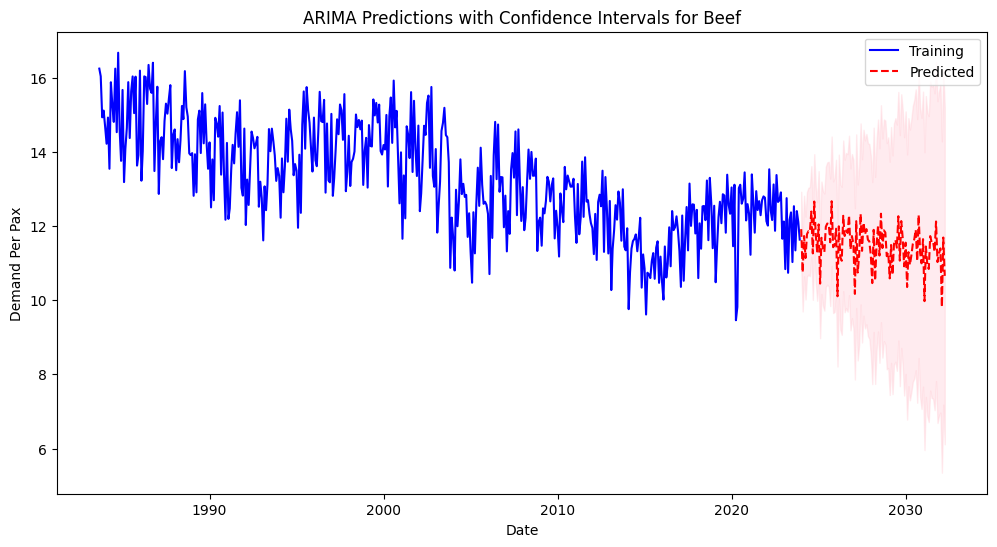

In [22]:
# plotting train, test, predicted values and confidence intervals
y_pred = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(predictions.index.to_timestamp(), predictions['demand_per_pax'], label='Training', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

# Plotting confidence intervals
plt.fill_between(y_pred.index.to_timestamp(), forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'ARIMA Predictions with Confidence Intervals for Beef')
plt.xlabel('Date')
plt.ylabel('Demand Per Pax')
plt.legend()
plt.show()

In [23]:
beef_dd_per_pax = pd.concat([predictions['demand_per_pax'], y_pred], axis=0)
beef_dd_per_pax.name = 'beef_demand_per_pax'
beef_dd_per_pax.to_csv('predicted_beef_demand.csv')

## Pork ARIMA

In [18]:
pork = pseudo_demand[pseudo_demand['Animal'] == 'Pork'].iloc[8:]
train, test = trainTestSplit(pork, months=50)
params = getBestParams(train, 10, 10, 10, value_name='demand_per_pax', season=12)
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  433
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -260.032
Date:                                 Sun, 24 Mar 2024   AIC                            536.063
Time:                                         20:54:28   BIC                            568.611
Sample:                                     09-30-1983   HQIC                           548.913
                                          - 09-30-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9471      0.061    -15.415      0.000      -1.068      -0.827
ar.L2         -0.6513      0.051    -12.853      0.000      -0.751      -0.552
ma.L1          0.0848      0.082      1.040      0.298      -0.075       0.245
ar.S.L12       0.6863      0.172      3.980      0.000       0.348       1.024
ar.S.L24       0.3078      0.171      1.799      0.072      -0.028       0.643
ma.S.L12      -0.3073      0.151     -2.036      0.042      -0.603      -0.012
ma.S.L24      -0.5080      0.122     -4.167      0.000      -0.747      -0.269
sigma2         0.1916      0.014     13.275      0.000       0.163       0.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.23
Prob(Q):                              0.96   Prob(JB):                         0.07
Heteroskedasticity (H):               0.88   Skew:                            -0.25
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51492D+00    |proj g|=  5.12724D-01

At iterate    5    f=  1.20113D+00    |proj g|=  4.60809D-01


 This problem is unconstrained.



At iterate   10    f=  1.05703D+00    |proj g|=  6.73041D-02

At iterate   15    f=  1.04044D+00    |proj g|=  2.67564D-02

At iterate   20    f=  1.02639D+00    |proj g|=  8.66893D-02

At iterate   25    f=  1.01407D+00    |proj g|=  4.94770D-02

At iterate   30    f=  1.01086D+00    |proj g|=  7.78741D-03

At iterate   35    f=  1.01058D+00    |proj g|=  1.83694D-02

At iterate   40    f=  1.01028D+00    |proj g|=  4.58054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     53      1     0     0   1.647D-05   1.010D+00
  F =   1.0102790964216322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.14663D+00    |proj g|=  1.88381D-01

At iterate   15    f=  1.06501D+00    |proj g|=  1.15398D-01

At iterate   20    f=  1.02981D+00    |proj g|=  4.16798D-02

At iterate   25    f=  1.02070D+00    |proj g|=  3.18289D-02

At iterate   30    f=  1.01164D+00    |proj g|=  1.31819D-02

At iterate   35    f=  1.01007D+00    |proj g|=  3.54094D-02

At iterate   40    f=  1.00955D+00    |proj g|=  1.31936D-03

At iterate   45    f=  1.00954D+00    |proj g|=  4.94081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     56      1     0     0   4.941D-05   1.010D+00
  F =   1.00954346511

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52298D+00    |proj g|=  5.24959D-01

At iterate    5    f=  1.18799D+00    |proj g|=  2.17306D-01

At iterate   10    f=  1.07032D+00    |proj g|=  1.98218D-01

At iterate   15    f=  1.04540D+00    |proj g|=  2.17192D-02

At iterate   20    f=  1.03446D+00    |proj g|=  2.66384D-02

At iterate   25    f=  1.01576D+00    |proj g|=  2.64307D-02

At iterate   30    f=  1.00802D+00    |proj g|=  6.78492D-03

At iterate   35    f=  1.00746D+00    |proj g|=  2.34221D-03

At iterate   40    f=  1.00742D+00    |proj g|=  2.08310D-03

At iterate   45    f=  1.00741D+00    |proj g|=  2.13260D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.00739D+00    |proj g|=  1.21419D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   1.214D-03   1.007D+00
  F =   1.0073949064161558     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51495D+00    |proj g|=  5.11888D-01

At iterate    5    f=  1.21099D+00    |proj g|=  5.85823D-01

At iterate   10    f=  1.09901D+00    |proj g|=  1.99996D-01

At iterate   15    f=  1.04489D+00    |proj g|=  2.75731D-02

At iterate   20    f=  1.03014D+00    |proj g|=  2.87504D-02

At iterate   25    f=  1.01378D+00    |proj g|=  1.80390D-02

At iterate   30    f=  1.00826D+00    |proj g|=  1.01039D-02

At iterate   35    f=  1.00623D+00    |proj g|=  2.68398D-02

At iterate   40    f=  1.00520D+00    |proj g|=  2.38388D-03

At iterate   45    f=  1.00518D+00    |proj g|=  5.13071D-04


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.00518D+00    |proj g|=  3.11596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   3.116D-05   1.005D+00
  F =   1.0051795090710476     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50957D+00    |proj g|=  5.04012D-01

At iterate    5    f=  1.20249D+00    |proj g|=  3.49964D-01

At iterate   10    f=  1.05430D+00    |proj g|=  9.91662D-02

At iter

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50370D+00    |proj g|=  4.89407D-01

At iterate    5    f=  1.18475D+00    |proj g|=  1.69871D-01

At iterate   10    f=  1.03932D+00    |proj g|=  6.61583D-02

At iterate   15    f=  1.02817D+00    |proj g|=  3.33059D-02

At iterate   20    f=  1.01790D+00    |proj g|=  1.25011D-01

At iterate   25    f=  1.00244D+00    |proj g|=  1.08231D-02

At iterate   30    f=  1.00200D+00    |proj g|=  1.55769D-03

At iterate   35    f=  1.00197D+00    |proj g|=  1.71487D-03

At iterate   40    f=  1.00193D+00    |proj g|=  6.89237D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final project

 This problem is unconstrained.



At iterate    5    f=  1.19171D+00    |proj g|=  3.72849D-01

At iterate   10    f=  1.04527D+00    |proj g|=  7.40965D-02

At iterate   15    f=  1.03242D+00    |proj g|=  2.04027D-02

At iterate   20    f=  1.01382D+00    |proj g|=  7.19874D-02

At iterate   25    f=  1.00503D+00    |proj g|=  7.43157D-03

At iterate   30    f=  1.00280D+00    |proj g|=  1.03475D-02

At iterate   35    f=  1.00200D+00    |proj g|=  3.77187D-03

At iterate   40    f=  1.00174D+00    |proj g|=  1.09949D-02

At iterate   45    f=  1.00170D+00    |proj g|=  5.47163D-04

At iterate   50    f=  1.00170D+00    |proj g|=  1.20105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60135D+00    |proj g|=  6.77979D-01

At iterate    5    f=  1.15571D+00    |proj g|=  1.58908D-01


 This problem is unconstrained.



At iterate   10    f=  1.07161D+00    |proj g|=  4.76095D-02

At iterate   15    f=  1.06128D+00    |proj g|=  1.29164D-02

At iterate   20    f=  1.04943D+00    |proj g|=  3.37223D-02

At iterate   25    f=  1.04100D+00    |proj g|=  1.35523D-02

At iterate   30    f=  1.03760D+00    |proj g|=  3.11388D-03

At iterate   35    f=  1.03736D+00    |proj g|=  6.49195D-04

At iterate   40    f=  1.03736D+00    |proj g|=  8.27191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     47      1     0     0   1.996D-05   1.037D+00
  F =   1.0373626743765618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.18914D+00    |proj g|=  8.95913D-02

At iterate   10    f=  1.10306D+00    |proj g|=  2.95300D-02

At iterate   15    f=  1.09234D+00    |proj g|=  3.34648D-02

At iterate   20    f=  1.07826D+00    |proj g|=  3.32751D-02

At iterate   25    f=  1.07487D+00    |proj g|=  1.00495D-02

At iterate   30    f=  1.07361D+00    |proj g|=  1.71514D-02

At iterate   35    f=  1.07350D+00    |proj g|=  1.22732D-03

At iterate   40    f=  1.07350D+00    |proj g|=  2.23724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     47      1     0     0   2.237D-05   1.074D+00
  F =   1.07350329821

 This problem is unconstrained.



At iterate    5    f=  1.23192D+00    |proj g|=  5.31991D-01

At iterate   10    f=  1.18254D+00    |proj g|=  2.01864D-01

At iterate   15    f=  1.11987D+00    |proj g|=  5.01248D-02

At iterate   20    f=  1.09496D+00    |proj g|=  1.47919D-02

At iterate   25    f=  1.08919D+00    |proj g|=  2.51026D-02

At iterate   30    f=  1.08666D+00    |proj g|=  1.11517D-02

At iterate   35    f=  1.08576D+00    |proj g|=  1.04351D-02

At iterate   40    f=  1.08563D+00    |proj g|=  1.14521D-03

At iterate   45    f=  1.08563D+00    |proj g|=  1.56205D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     55   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54542D+00    |proj g|=  4.92016D-01

At iterate    5    f=  1.25341D+00    |proj g|=  4.61131D-01

At iterate   10    f=  1.14915D+00    |proj g|=  3.20917D-02

At iterate   15    f=  1.13664D+00    |proj g|=  2.23061D-02

At iterate   20    f=  1.11787D+00    |proj g|=  2.75220D-02

At iterate   25    f=  1.11280D+00    |proj g|=  1.11549D-02

At iterate   30    f=  1.11247D+00    |proj g|=  9.75098D-04

At iterate   35    f=  1.11245D+00    |proj g|=  8.26959D-04

At iterate   40    f=  1.11244D+00    |proj g|=  2.65665D-04

At iterate   45    f=  1.11244D+00    |proj g|=  1.31650D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61065D+00    |proj g|=  6.41913D-01

At iterate    5    f=  1.22321D+00    |proj g|=  1.86357D-01

At iterate   10    f=  1.14970D+00    |proj g|=  4.03533D-02

At iterate   15    f=  1.13782D+00    |proj g|=  1.25522D-02

At iterate   20    f=  1.12507D+00    |proj g|=  5.43611D-02

At iterate   25    f=  1.11838D+00    |proj g|=  8.02664D-03

At iterate   30    f=  1.11628D+00    |proj g|=  2.25624D-03

At iterate   35    f=  1.11620D+00    |proj g|=  2.81990D-04

At iterate   40    f=  1.11620D+00    |proj g|=  1.17847D-04

At iterate   45    f=  1.11620D+00    |proj g|=  8.70122D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  1.15335D+00    |proj g|=  3.46247D-02

At iterate   15    f=  1.14204D+00    |proj g|=  1.42409D-02

At iterate   20    f=  1.13156D+00    |proj g|=  2.50359D-02

At iterate   25    f=  1.12342D+00    |proj g|=  1.51748D-02

At iterate   30    f=  1.12027D+00    |proj g|=  1.75072D-02

At iterate   35    f=  1.11988D+00    |proj g|=  1.00084D-03

At iterate   40    f=  1.11987D+00    |proj g|=  4.10953D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     50      1     0     0   2.819D-05   1.120D+00
  F =   1.1198716403704170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59209D+00    |proj g|=  5.93714D-01

At iterate    5    f=  1.23111D+00    |proj g|=  2.71275D-01

At iterate   10    f=  1.14781D+00    |proj g|=  3.20656D-02

At iterate   15    f=  1.13828D+00    |proj g|=  2.67604D-02

At iterate   20    f=  1.11909D+00    |proj g|=  1.84202D-02

At iterate   25    f=  1.11845D+00    |proj g|=  3.71985D-03

At iterate   30    f=  1.11826D+00    |proj g|=  3.66411D-03

At iterate   35    f=  1.11801D+00    |proj g|=  1.33865D-03

At iterate   40    f=  1.11801D+00    |proj g|=  1.83797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58031D+00    |proj g|=  5.73025D-01

At iterate    5    f=  1.20592D+00    |proj g|=  1.66744D-01

At iterate   10    f=  1.15617D+00    |proj g|=  1.98933D-01

At iterate   15    f=  1.13484D+00    |proj g|=  2.09573D-02

At iterate   20    f=  1.12794D+00    |proj g|=  2.36220D-02

At iterate   25    f=  1.11731D+00    |proj g|=  2.07534D-02

At iterate   30    f=  1.11657D+00    |proj g|=  1.75171D-02

At iterate   35    f=  1.11631D+00    |proj g|=  7.50662D-03

At iterate   40    f=  1.11610D+00    |proj g|=  4.35966D-03

At iterate   45    f=  1.11605D+00    |proj g|=  1.78327D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58317D+00    |proj g|=  5.81512D-01

At iterate    5    f=  1.20679D+00    |proj g|=  2.67778D-01

At iterate   10    f=  1.17208D+00    |proj g|=  3.01019D-01

At iterate   15    f=  1.13149D+00    |proj g|=  6.15891D-02

At iterate   20    f=  1.12540D+00    |proj g|=  4.29913D-02

At iterate   25    f=  1.11717D+00    |proj g|=  1.05294D-02

At iterate   30    f=  1.11538D+00    |proj g|=  1.34428D-02

At iterate   35    f=  1.11494D+00    |proj g|=  2.62277D-03

At iterate   40    f=  1.11467D+00    |proj g|=  1.04610D-02

At iterate   45    f=  1.11455D+00    |proj g|=  2.07684D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.11448D+00    |proj g|=  3.54429D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   3.544D-04   1.114D+00
  F =   1.1144815077160661     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58811D+00    |proj g|=  5.95833D-01

At iterate    5    f=  1.22168D+00    |proj g|=  1.68911D-01

At iterate   10    f=  1.14274D+00    |proj g|=  6.40628D-02

At iter

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58763D+00    |proj g|=  5.96336D-01

At iterate    5    f=  1.22611D+00    |proj g|=  2.64434D-01

At iterate   10    f=  1.14032D+00    |proj g|=  3.22406D-02

At iterate   15    f=  1.13077D+00    |proj g|=  2.61911D-02

At iterate   20    f=  1.11127D+00    |proj g|=  1.35883D-02

At iterate   25    f=  1.11088D+00    |proj g|=  1.37030D-02

At iterate   30    f=  1.11054D+00    |proj g|=  2.31814D-03

At iterate   35    f=  1.11040D+00    |proj g|=  1.27666D-03

At iterate   40    f=  1.11039D+00    |proj g|=  1.75004D-04

At iterate   45    f=  1.11039D+00    |proj g|=  7.48191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57327D+00    |proj g|=  5.67885D-01

At iterate    5    f=  1.19932D+00    |proj g|=  1.89881D-01

At iterate   10    f=  1.18091D+00    |proj g|=  9.19361D-02

At iterate   15    f=  1.13826D+00    |proj g|=  5.09360D-02

At iterate   20    f=  1.12443D+00    |proj g|=  3.75890D-01

At iterate   25    f=  1.11591D+00    |proj g|=  2.06724D-01

At iterate   30    f=  1.11542D+00    |proj g|=  1.55335D-01

At iterate   35    f=  1.11219D+00    |proj g|=  4.26273D-01

At iterate   40    f=  1.10409D+00    |proj g|=  4.46894D-02

At iterate   45    f=  1.10338D+00    |proj g|=  7.51774D-03

At iterate   50    f=  1.10327D+00    |proj g|=  2.28662D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53758D+00    |proj g|=  4.90884D-01


 This problem is unconstrained.



At iterate    5    f=  1.23721D+00    |proj g|=  5.02775D-01

At iterate   10    f=  1.14553D+00    |proj g|=  7.85052D-02

At iterate   15    f=  1.13003D+00    |proj g|=  1.50544D-02

At iterate   20    f=  1.12277D+00    |proj g|=  2.08505D-02

At iterate   25    f=  1.11550D+00    |proj g|=  1.43207D-02

At iterate   30    f=  1.11128D+00    |proj g|=  1.87134D-02

At iterate   35    f=  1.11003D+00    |proj g|=  4.28348D-03

At iterate   40    f=  1.11001D+00    |proj g|=  2.09224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     50      1     0     0   2.366D-05   1.110D+00
  F =   1.11000863058

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48966D+00    |proj g|=  3.75941D-01

At iterate    5    f=  1.16709D+00    |proj g|=  7.70789D-02

At iterate   10    f=  1.13881D+00    |proj g|=  2.55943D-02

At iterate   15    f=  1.12416D+00    |proj g|=  2.25525D-02

At iterate   20    f=  1.11548D+00    |proj g|=  7.52787D-02

At iterate   25    f=  1.10953D+00    |proj g|=  5.27778D-03

At iterate   30    f=  1.10923D+00    |proj g|=  7.58281D-03

At iterate   35    f=  1.10907D+00    |proj g|=  1.80790D-03

At iterate   40    f=  1.10906D+00    |proj g|=  6.65030D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51187D+00    |proj g|=  4.31059D-01

At iterate    5    f=  1.18703D+00    |proj g|=  1.59674D-01

At iterate   10    f=  1.13774D+00    |proj g|=  9.67285D-02

At iterate   15    f=  1.13099D+00    |proj g|=  1.48126D-02

At iterate   20    f=  1.11592D+00    |proj g|=  2.38517D-02

At iterate   25    f=  1.11358D+00    |proj g|=  6.37886D-02

At iterate   30    f=  1.11209D+00    |proj g|=  8.43325D-03

At iterate   35    f=  1.11056D+00    |proj g|=  3.20139D-03

At iterate   40    f=  1.11042D+00    |proj g|=  2.45277D-03

At iterate   45    f=  1.11042D+00    |proj g|=  1.55015D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51602D+00    |proj g|=  4.32988D-01

At iterate    5    f=  1.19066D+00    |proj g|=  1.21674D-01

At iterate   10    f=  1.14220D+00    |proj g|=  4.52495D-02

At iterate   15    f=  1.13700D+00    |proj g|=  4.90433D-02

At iterate   20    f=  1.12796D+00    |proj g|=  1.65988D-02

At iterate   25    f=  1.12328D+00    |proj g|=  1.02826D-02

At iterate   30    f=  1.12130D+00    |proj g|=  7.41319D-03

At iterate   35    f=  1.11999D+00    |proj g|=  3.98348D-03

At iterate   40    f=  1.11990D+00    |proj g|=  7.11754D-04

At iterate   45    f=  1.11990D+00    |proj g|=  9.41170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  1.14347D+00    |proj g|=  5.14720D-02

At iterate   15    f=  1.13442D+00    |proj g|=  6.97889D-02

At iterate   20    f=  1.12402D+00    |proj g|=  4.61702D-02

At iterate   25    f=  1.12041D+00    |proj g|=  1.85472D-02

At iterate   30    f=  1.11845D+00    |proj g|=  1.53710D-03

At iterate   35    f=  1.11835D+00    |proj g|=  3.01627D-04

At iterate   40    f=  1.11835D+00    |proj g|=  2.04037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     53      1     0     0   5.784D-05   1.118D+00
  F =   1.1183499558484813     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.14156D+00    |proj g|=  4.21529D-02

At iterate   15    f=  1.13146D+00    |proj g|=  4.62360D-02

At iterate   20    f=  1.12084D+00    |proj g|=  2.07609D-02

At iterate   25    f=  1.11916D+00    |proj g|=  7.80108D-03

At iterate   30    f=  1.11739D+00    |proj g|=  2.74540D-02

At iterate   35    f=  1.11661D+00    |proj g|=  2.40325D-03

At iterate   40    f=  1.11658D+00    |proj g|=  9.94648D-04

At iterate   45    f=  1.11658D+00    |proj g|=  1.93573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     55      1     0     0   8.527D-06   1.117D+00
  F =   1.11657549310

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48521D+00    |proj g|=  3.64033D-01

At iterate    5    f=  1.18755D+00    |proj g|=  1.24722D-01

At iterate   10    f=  1.14127D+00    |proj g|=  4.86840D-02

At iterate   15    f=  1.13305D+00    |proj g|=  2.17373D-02

At iterate   20    f=  1.12528D+00    |proj g|=  2.61585D-02

At iterate   25    f=  1.11673D+00    |proj g|=  2.69008D-02

At iterate   30    f=  1.11506D+00    |proj g|=  2.24094D-02

At iterate   35    f=  1.11468D+00    |proj g|=  9.37460D-04

At iterate   40    f=  1.11467D+00    |proj g|=  6.45532D-05

At iterate   45    f=  1.11467D+00    |proj g|=  1.39023D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  1.19756D+00    |proj g|=  1.64725D-01

At iterate   15    f=  1.14465D+00    |proj g|=  2.08462D-01

At iterate   20    f=  1.12935D+00    |proj g|=  2.98421D-01

At iterate   25    f=  1.12138D+00    |proj g|=  8.59305D-02

At iterate   30    f=  1.11193D+00    |proj g|=  1.59125D-01

At iterate   35    f=  1.11067D+00    |proj g|=  1.17603D-02

At iterate   40    f=  1.11035D+00    |proj g|=  1.11061D-01

At iterate   45    f=  1.11030D+00    |proj g|=  2.55251D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.11029D+00    |proj g|=  3.38178D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   3.382D-03   1.110D+00
  F =   1.1102939852703431     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48195D+00    |proj g|=  3.61326D-01

At iterate    5    f=  1.17533D+00    |proj g|=  1.35624D-01

At iterate   10    f=  1.14352D+00    |proj g|=  4.70458D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47904D+00    |proj g|=  3.60357D-01

At iterate    5    f=  1.22666D+00    |proj g|=  8.49821D-02

At iterate   10    f=  1.20629D+00    |proj g|=  2.01191D-01

At iterate   15    f=  1.15521D+00    |proj g|=  4.43148D-01

At iterate   20    f=  1.14288D+00    |proj g|=  1.75545D-01

At iterate   25    f=  1.13722D+00    |proj g|=  2.41731D-01

At iterate   30    f=  1.12327D+00    |proj g|=  3.26384D-01

At iterate   35    f=  1.12157D+00    |proj g|=  2.97483D-02

At iterate   40    f=  1.11913D+00    |proj g|=  2.24173D-01

At iterate   45    f=  1.11140D+00    |proj g|=  6.25107D-01

At iterate   50    f=  1.10765D+00    |proj g|=  1.41780D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47757D+00    |proj g|=  3.64522D-01

At iterate    5    f=  1.22664D+00    |proj g|=  3.05949D-01

At iterate   10    f=  1.20322D+00    |proj g|=  1.28635D-01

At iterate   15    f=  1.13896D+00    |proj g|=  6.26114D-02

At iterate   20    f=  1.12311D+00    |proj g|=  3.83671D-02

At iterate   25    f=  1.11012D+00    |proj g|=  4.74239D-03

At iterate   30    f=  1.10927D+00    |proj g|=  2.03100D-02

At iterate   35    f=  1.10912D+00    |proj g|=  3.96631D-03

At iterate   40    f=  1.10898D+00    |proj g|=  1.16329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47542D+00    |proj g|=  3.69282D-01

At iterate    5    f=  1.22311D+00    |proj g|=  5.70794D-02

At iterate   10    f=  1.18578D+00    |proj g|=  8.49728D-02

At iterate   15    f=  1.14894D+00    |proj g|=  1.23534D-01

At iterate   20    f=  1.11898D+00    |proj g|=  2.91570D-01

At iterate   25    f=  1.11121D+00    |proj g|=  9.54577D-02

At iterate   30    f=  1.10546D+00    |proj g|=  1.60991D-01

At iterate   35    f=  1.10423D+00    |proj g|=  5.56142D-02

At iterate   40    f=  1.10414D+00    |proj g|=  2.08879D-02

At iterate   45    f=  1.10409D+00    |proj g|=  1.00930D-02



/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


At iterate   50    f=  1.10409D+00    |proj g|=  9.81253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   9.813D-04   1.104D+00
  F =   1.1040892098395680     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47399D+00    |proj g|=  3.69915D-01


 This problem is unconstrained.



At iterate    5    f=  1.21886D+00    |proj g|=  9.13333D-02

At iterate   10    f=  1.17321D+00    |proj g|=  5.89223D-01

At iterate   15    f=  1.14495D+00    |proj g|=  6.08604D-01

At iterate   20    f=  1.12367D+00    |proj g|=  2.43392D-01

At iterate   25    f=  1.11496D+00    |proj g|=  5.64971D-01

At iterate   30    f=  1.10398D+00    |proj g|=  4.79377D-02

At iterate   35    f=  1.10197D+00    |proj g|=  1.14214D-02

At iterate   40    f=  1.10195D+00    |proj g|=  3.03790D-03

At iterate   45    f=  1.10194D+00    |proj g|=  6.73230D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.10190D+00    |proj g|=  1.61366D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   1.614D-02   1.102D+00
  F =   1.1019010026529801     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48962D+00    |proj g|=  3.94464D-01

At iterate    5    f=  1.18688D+00    |proj g|=  3.01701D-01

At iterate   10    f=  1.13571D+00    |proj g|=  3.92735D-02

At iterate   15    f=  1.12051D+00    |proj g|=  2.11764D-02

At iterate   20    f=  1.11193D+00    |proj g|=  2.46664D-02

At iterate   25    f=  1.10740D+00    |proj g|=  3.55928D-02

At iterate   30    f=  1.10467D+00    |proj g|=  1.24374D-02

At iterate   35    f=  1.10441D+00    |proj g|=  2.66859D-03

At iterate   40    f=  1.10440D+00    |proj g|=  3.33493D-04

At iterate   45    f=  1.10440D+00    |proj g|=  1.47806D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     68      1     0     0   2.666D-05   1.104D+00
  F =   1.1043991913646698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48544D+00    |proj g|=  3.88081D-01

At iterate    5    f=  1.18779D+00    |proj g|=  3.27742D-01

At iterate   10    f=  1.13737D+00    |proj g|=  3.97341D-02

At iterate   15    f=  1.11924D+00    |proj g|=  1.66260D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48427D+00    |proj g|=  3.84103D-01

At iterate    5    f=  1.18681D+00    |proj g|=  2.22053D-01

At iterate   10    f=  1.13110D+00    |proj g|=  3.06373D-02

At iterate   15    f=  1.11916D+00    |proj g|=  1.41496D-02

At iterate   20    f=  1.10782D+00    |proj g|=  2.36295D-02

At iterate   25    f=  1.10385D+00    |proj g|=  1.82437D-02

At iterate   30    f=  1.10305D+00    |proj g|=  6.14399D-03

At iterate   35    f=  1.10231D+00    |proj g|=  1.58086D-03

At iterate   40    f=  1.10229D+00    |proj g|=  2.66881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  1.12743D+00    |proj g|=  4.16350D-02

At iterate   15    f=  1.11628D+00    |proj g|=  9.61591D-02

At iterate   20    f=  1.10719D+00    |proj g|=  5.73373D-02

At iterate   25    f=  1.10177D+00    |proj g|=  1.33089D-02

At iterate   30    f=  1.10095D+00    |proj g|=  2.00942D-03

At iterate   35    f=  1.10094D+00    |proj g|=  9.55425D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     39      1     0     0   9.554D-06   1.101D+00
  F =   1.1009447217595758     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48254D+00    |proj g|=  3.83766D-01

At iterate    5    f=  1.18452D+00    |proj g|=  1.92570D-01

At iterate   10    f=  1.12502D+00    |proj g|=  2.07589D-02

At iterate   15    f=  1.11280D+00    |proj g|=  2.42681D-02

At iterate   20    f=  1.10316D+00    |proj g|=  1.47031D-02

At iterate   25    f=  1.10099D+00    |proj g|=  6.30810D-03

At iterate   30    f=  1.09936D+00    |proj g|=  1.87352D-03

At iterate   35    f=  1.09932D+00    |proj g|=  2.99248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

  

 This problem is unconstrained.



At iterate   10    f=  1.12476D+00    |proj g|=  5.01783D-02

At iterate   15    f=  1.11298D+00    |proj g|=  5.08499D-02

At iterate   20    f=  1.10367D+00    |proj g|=  3.55399D-02

At iterate   25    f=  1.09982D+00    |proj g|=  8.20098D-03

At iterate   30    f=  1.09798D+00    |proj g|=  1.94713D-02

At iterate   35    f=  1.09761D+00    |proj g|=  4.23664D-03

At iterate   40    f=  1.09760D+00    |proj g|=  2.38641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     49      1     0     0   5.487D-05   1.098D+00
  F =   1.0976019322116406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.18379D+00    |proj g|=  2.33931D-01

At iterate   10    f=  1.12503D+00    |proj g|=  7.71061D-02

At iterate   15    f=  1.11460D+00    |proj g|=  1.33319D-02

At iterate   20    f=  1.10438D+00    |proj g|=  2.79878D-02

At iterate   25    f=  1.09875D+00    |proj g|=  6.09637D-02

At iterate   30    f=  1.09728D+00    |proj g|=  1.93263D-02

At iterate   35    f=  1.09644D+00    |proj g|=  3.45205D-03

At iterate   40    f=  1.09642D+00    |proj g|=  5.03095D-04

At iterate   45    f=  1.09642D+00    |proj g|=  9.62338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     54   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49530D+00    |proj g|=  4.25820D-01

At iterate    5    f=  1.18049D+00    |proj g|=  1.37373D-01

At iterate   10    f=  1.11981D+00    |proj g|=  9.46978D-02

At iterate   15    f=  1.11373D+00    |proj g|=  4.80619D-02

At iterate   20    f=  1.09999D+00    |proj g|=  1.69042D-02

At iterate   25    f=  1.09907D+00    |proj g|=  2.47388D-02

At iterate   30    f=  1.09735D+00    |proj g|=  1.83600D-03

At iterate   35    f=  1.09733D+00    |proj g|=  1.83236D-04

At iterate   40    f=  1.09733D+00    |proj g|=  1.58280D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  1.17269D+00    |proj g|=  1.28023D-01

At iterate   10    f=  1.11893D+00    |proj g|=  5.58964D-02

At iterate   15    f=  1.11472D+00    |proj g|=  4.67483D-02

At iterate   20    f=  1.10694D+00    |proj g|=  2.79038D-02

At iterate   25    f=  1.10166D+00    |proj g|=  1.73550D-02

At iterate   30    f=  1.09985D+00    |proj g|=  2.42419D-02

At iterate   35    f=  1.09868D+00    |proj g|=  1.14592D-02

At iterate   40    f=  1.09862D+00    |proj g|=  7.72446D-04

At iterate   45    f=  1.09862D+00    |proj g|=  2.87920D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     50   

 This problem is unconstrained.



At iterate   10    f=  1.13798D+00    |proj g|=  2.04675D-01

At iterate   15    f=  1.11312D+00    |proj g|=  1.90298D-02

At iterate   20    f=  1.10882D+00    |proj g|=  1.00563D-01

At iterate   25    f=  1.10137D+00    |proj g|=  4.20078D-02

At iterate   30    f=  1.09831D+00    |proj g|=  1.71819D-02

At iterate   35    f=  1.09669D+00    |proj g|=  6.49071D-04

At iterate   40    f=  1.09669D+00    |proj g|=  1.03954D-04

At iterate   45    f=  1.09669D+00    |proj g|=  9.17848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     56      1     0     0   7.504D-06   1.097D+00
  F =   1.09669082582

 This problem is unconstrained.



At iterate   10    f=  1.12075D+00    |proj g|=  8.58785D-02

At iterate   15    f=  1.11394D+00    |proj g|=  1.44029D-02

At iterate   20    f=  1.10142D+00    |proj g|=  5.28738D-02

At iterate   25    f=  1.10056D+00    |proj g|=  1.39889D-02

At iterate   30    f=  1.09998D+00    |proj g|=  5.58462D-03

At iterate   35    f=  1.09983D+00    |proj g|=  7.94493D-03

At iterate   40    f=  1.09947D+00    |proj g|=  2.80203D-03

At iterate   45    f=  1.09947D+00    |proj g|=  1.94527D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     53      1     0     0   1.142D-05   1.099D+00
  F =   1.09946989586

 This problem is unconstrained.



At iterate   10    f=  1.12364D+00    |proj g|=  8.40455D-02

At iterate   15    f=  1.11468D+00    |proj g|=  8.86193D-03

At iterate   20    f=  1.11057D+00    |proj g|=  1.22641D-01

At iterate   25    f=  1.10359D+00    |proj g|=  2.33109D-02

At iterate   30    f=  1.10084D+00    |proj g|=  8.11440D-03

At iterate   35    f=  1.10069D+00    |proj g|=  3.71978D-04

At iterate   40    f=  1.10068D+00    |proj g|=  1.36754D-03

At iterate   45    f=  1.10068D+00    |proj g|=  1.69926D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     50      1     0     0   1.699D-05   1.101D+00
  F =   1.10068153540

 This problem is unconstrained.



At iterate    5    f=  1.21059D+00    |proj g|=  1.68186D-01

At iterate   10    f=  1.11942D+00    |proj g|=  3.73785D-02

At iterate   15    f=  1.11514D+00    |proj g|=  2.58941D-02

At iterate   20    f=  1.10699D+00    |proj g|=  1.12598D-02

At iterate   25    f=  1.10170D+00    |proj g|=  4.57255D-03

At iterate   30    f=  1.10126D+00    |proj g|=  1.14967D-02

At iterate   35    f=  1.10107D+00    |proj g|=  6.50732D-03

At iterate   40    f=  1.10106D+00    |proj g|=  2.73660D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     47      1     0     0   2.092D-05   1.101D+00
  F =   1.10106314934

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56842D+00    |proj g|=  5.87850D-01

At iterate    5    f=  1.19538D+00    |proj g|=  1.97928D-01

At iterate   10    f=  1.12092D+00    |proj g|=  4.46160D-02

At iterate   15    f=  1.11738D+00    |proj g|=  1.39123D-02

At iterate   20    f=  1.10691D+00    |proj g|=  4.15904D-02

At iterate   25    f=  1.10249D+00    |proj g|=  4.43453D-02

At iterate   30    f=  1.09975D+00    |proj g|=  1.35975D-03

At iterate   35    f=  1.09970D+00    |proj g|=  1.52158D-03

At iterate   40    f=  1.09969D+00    |proj g|=  4.56284D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  1.17205D+00    |proj g|=  2.03119D-01

At iterate   15    f=  1.12203D+00    |proj g|=  8.24919D-02

At iterate   20    f=  1.11760D+00    |proj g|=  2.02243D-02

At iterate   25    f=  1.10804D+00    |proj g|=  1.54943D-01

At iterate   30    f=  1.10194D+00    |proj g|=  1.57288D-01

At iterate   35    f=  1.10059D+00    |proj g|=  4.02368D-02

At iterate   40    f=  1.09978D+00    |proj g|=  8.62246D-02

At iterate   45    f=  1.09961D+00    |proj g|=  1.32604D-03

At iterate   50    f=  1.09960D+00    |proj g|=  1.13019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56850D+00    |proj g|=  5.95631D-01

At iterate    5    f=  1.18568D+00    |proj g|=  1.35921D-01


 This problem is unconstrained.



At iterate   10    f=  1.12279D+00    |proj g|=  1.16427D-01

At iterate   15    f=  1.11425D+00    |proj g|=  2.04371D-02

At iterate   20    f=  1.10518D+00    |proj g|=  2.82449D-02

At iterate   25    f=  1.09898D+00    |proj g|=  1.73182D-02

At iterate   30    f=  1.09726D+00    |proj g|=  2.12672D-02

At iterate   35    f=  1.09665D+00    |proj g|=  3.86795D-03

At iterate   40    f=  1.09665D+00    |proj g|=  6.82263D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     47      1     0     0   6.662D-05   1.097D+00
  F =   1.0966463883010293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  1.10931D+00    |proj g|=  1.03964D-01

At iterate   20    f=  1.10143D+00    |proj g|=  1.85659D-02

At iterate   25    f=  1.09839D+00    |proj g|=  1.50735D-02

At iterate   30    f=  1.09584D+00    |proj g|=  1.10714D-02

At iterate   35    f=  1.09520D+00    |proj g|=  2.18595D-03

At iterate   40    f=  1.09519D+00    |proj g|=  1.23078D-04

At iterate   45    f=  1.09519D+00    |proj g|=  9.53594D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     50      1     0     0   9.536D-05   1.095D+00
  F =   1.0951934994421486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55727D+00    |proj g|=  5.67465D-01

At iterate    5    f=  1.19904D+00    |proj g|=  3.37448D-01

At iterate   10    f=  1.11916D+00    |proj g|=  4.12668D-02

At iterate   15    f=  1.11105D+00    |proj g|=  3.55371D-02

At iterate   20    f=  1.09935D+00    |proj g|=  8.46090D-02

At iterate   25    f=  1.09563D+00    |proj g|=  1.33369D-02

At iterate   30    f=  1.09441D+00    |proj g|=  9.09431D-03

At iterate   35    f=  1.09362D+00    |proj g|=  1.97624D-03

At iterate   40    f=  1.09361D+00    |proj g|=  4.04707D-04

At iterate   45    f=  1.09360D+00    |proj g|=  4.73196D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  1.11660D+00    |proj g|=  2.92413D-02

At iterate   15    f=  1.11054D+00    |proj g|=  8.92750D-03

At iterate   20    f=  1.10039D+00    |proj g|=  4.55675D-02

At iterate   25    f=  1.09570D+00    |proj g|=  9.37408D-03

At iterate   30    f=  1.09252D+00    |proj g|=  2.88536D-02

At iterate   35    f=  1.09211D+00    |proj g|=  1.30117D-03

At iterate   40    f=  1.09210D+00    |proj g|=  1.45324D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     45      1     0     0   9.246D-05   1.092D+00
  F =   1.0921044009726630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

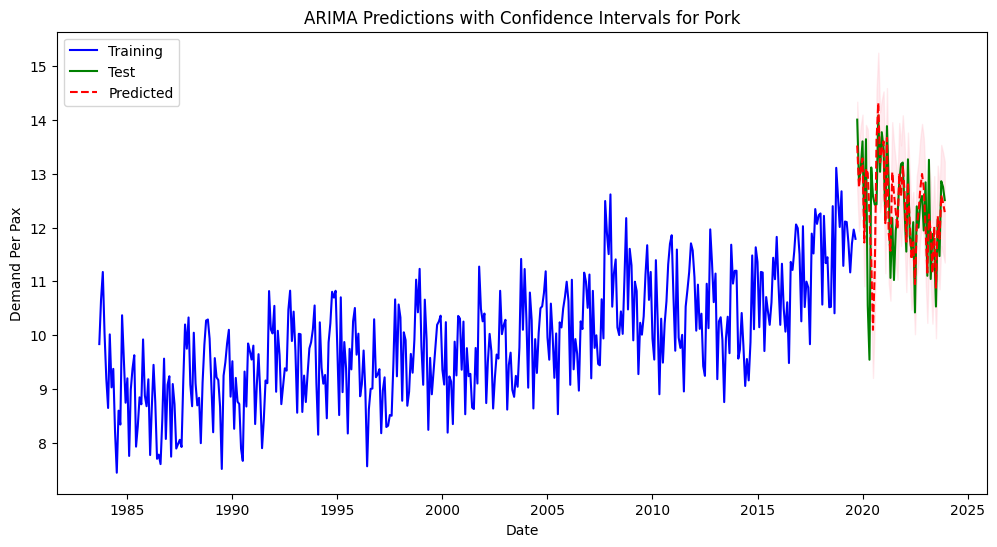

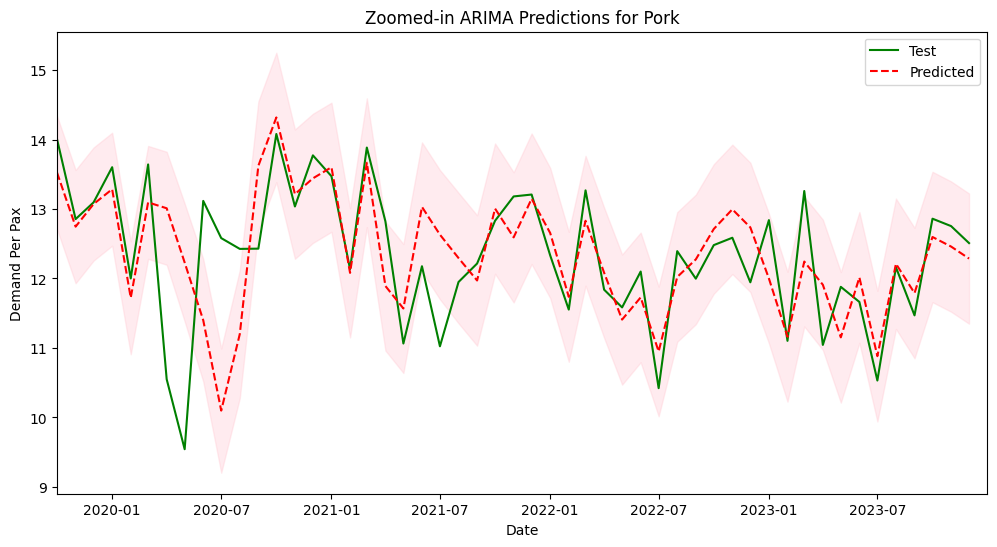

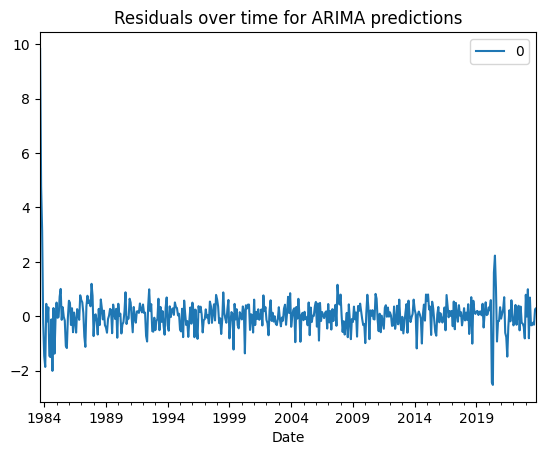

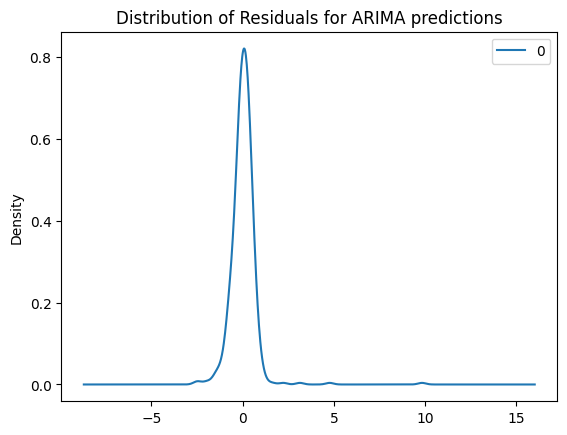

                0
count  483.000000
mean     0.027060
std      0.730865
min     -2.528020
25%     -0.259849
50%      0.043339
75%      0.327981
max      9.832709


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x30886ba10>,
    Product     Time  Actual Price  Predicted Price
 0     Pork  2019-10     14.005545        13.524280
 1     Pork  2019-11     12.854561        12.746075
 2     Pork  2019-12     13.095230        13.071428
 3     Pork  2020-01     13.601714        13.284905
 4     Pork  2020-02     12.000468        11.721638
 5     Pork  2020-03     13.641401        13.095210
 6     Pork  2020-04     10.548775        13.010309
 7     Pork  2020-05      9.542178        12.229545
 8     Pork  2020-06     13.116569        11.398359
 9     Pork  2020-07     12.580951        10.097538
 10    Pork  2020-08     12.425675        11.199571
 11    Pork  2020-09     12.429210        13.622017
 12    Pork  2020-10     14.080041        14.317871
 13    Pork  2020-11     13.036277        13.213797
 14    Pork  2020-12     13.772223        13.441230
 15    Pork  2021-01     13.471479        13.601172
 16    Pork  2021-02     12.133986      

In [25]:
model = trainSARIMAXModel(pork, train, test, 2, 1, 1, 2, 0, [1,2], 12, 'Pork', months=50, value_name='demand_per_pax', initialization='approximate_diffuse')
model

In [26]:
print(getMAPE(model[1]))
model[0].summary()

The Mean Absolute Percentage Error (MAPE) of the results is 4.91%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                          demand_per_pax   No. Observations:                  483
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -527.486
Date:                                 Sun, 24 Mar 2024   AIC                           1070.973
Time:                                         20:57:59   BIC                           1104.413
Sample:                                     09-30-1983   HQIC                          1084.114
                                          - 11-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8031      0.049    -16.361      0.000      -0.899      -0.707
ar.L2         -0.5649      0.044    -12.790      0.000      -0.651      -0.478
ma.L1         -0.0407      0.057     -0.714      0.475      -0.152       0.071
ar.S.L12       0.7852      0.125      6.259      0.000       0.539       1.031
ar.S.L24       0.2094      0.124      1.683      0.092      -0.034       0.453
ma.S.L12      -0.4468      0.126     -3.559      0.000      -0.693      -0.201
ma.S.L24      -0.4200      0.110     -3.820      0.000      -0.635      -0.204
sigma2         0.2286      0.011     21.029      0.000       0.207       0.250
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               346.64
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
predictions = pd.DataFrame(pseudo_demand[pseudo_demand['Animal'] == 'Pork'].iloc[8:]['demand_per_pax'])
predictions

,demand_per_pax
Date,
1983-09,9.832709
1983-10,10.653176
1983-11,11.173361
1983-12,10.034822
1984-01,9.186159
...,...
2023-08,12.161301
2023-09,11.468745
2023-10,12.860414


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21277D+00    |proj g|=  6.63561D-01


 This problem is unconstrained.



At iterate    5    f=  8.52899D-01    |proj g|=  1.93710D-01

At iterate   10    f=  7.47513D-01    |proj g|=  4.86810D-02

At iterate   15    f=  7.30567D-01    |proj g|=  9.47187D-03

At iterate   20    f=  7.27904D-01    |proj g|=  7.21781D-03

At iterate   25    f=  7.20869D-01    |proj g|=  3.90884D-02

At iterate   30    f=  7.17266D-01    |proj g|=  1.78480D-02

At iterate   35    f=  7.15566D-01    |proj g|=  2.03859D-03

At iterate   40    f=  7.15527D-01    |proj g|=  4.38400D-04

At iterate   45    f=  7.15526D-01    |proj g|=  2.56460D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     52   

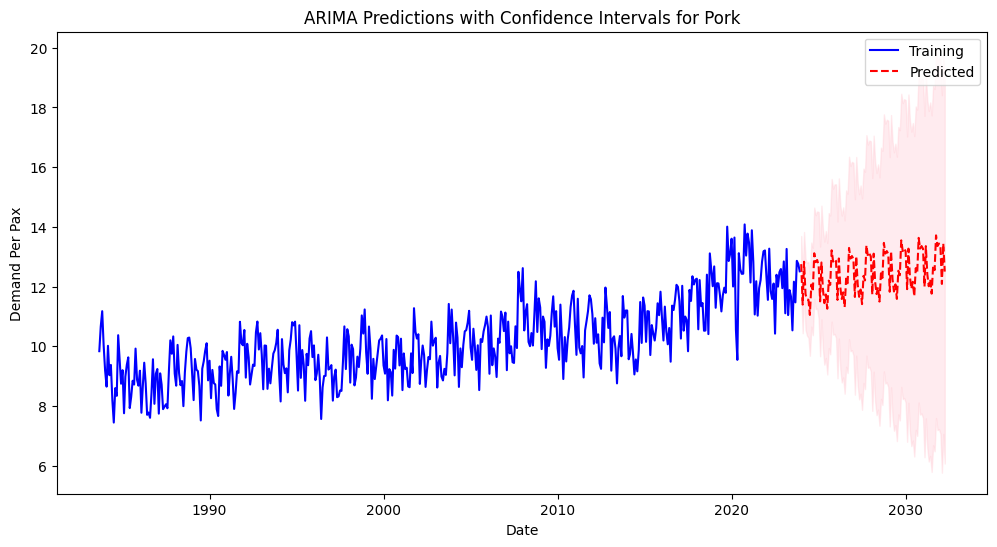

In [28]:
p, d, q, P, D, Q, m = 2, 1, 1, 2, 0, [1,2], 12
model = SARIMAX(pd.to_numeric(predictions['demand_per_pax']), order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=100)

# plotting train, test, predicted values and confidence intervals
y_pred = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(predictions.index.to_timestamp(), predictions['demand_per_pax'], label='Training', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

# Plotting confidence intervals
plt.fill_between(y_pred.index.to_timestamp(), forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'ARIMA Predictions with Confidence Intervals for Pork')
plt.xlabel('Date')
plt.ylabel('Demand Per Pax')
plt.legend()
plt.show()

In [29]:
pork_dd_per_pax = pd.concat([predictions['demand_per_pax'], y_pred], axis=0)
pork_dd_per_pax.name = 'pork_demand_per_pax'
pork_dd_per_pax.to_csv('predicted_pork_demand.csv')

## Broilers ARIMA

In [42]:
broilers = pseudo_demand[pseudo_demand['Animal'] == 'Broilers'].iloc[8:]
train, test = trainTestSplit(broilers, months=50)
params = getBestParams(train, 10, 10, 10, value_name='demand_per_pax', season=12)
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(3, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 -81.790
Date:                            Sun, 24 Mar 2024   AIC                            175.580
Time:                                    21:01:34   BIC                            194.966
Sample:                                02-29-2004   HQIC                           183.435
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8674      0.078    -11.145      0.000      -1.020      -0.715
ar.L2         -0.5411      0.102     -5.308      0.000      -0.741      -0.341
ar.L3          0.1272      0.075      1.690      0.091      -0.020       0.275
ar.S.L12       0.6070      0.079      7.702      0.000       0.453       0.761
ar.S.L24       0.1393      0.091      1.535      0.125      -0.039       0.317
sigma2         0.1329      0.014      9.703      0.000       0.106       0.160
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.92   Prob(JB):                         0.42
Heteroskedasticity (H):               0.90   Skew:                            -0.21
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75068D-01    |proj g|=  6.97967D-01

At iterate    5    f=  4.42829D-01    |proj g|=  9.39420D-02

At iterate   10    f=  4.35073D-01    |proj g|=  5.80422D-03

At iterate   15    f=  4.35053D-01    |proj g|=  1.35031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   8.160D-06   4.351D-01
  F =  0.43505227656467504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


At iterate   10    f=  4.33446D-01    |proj g|=  3.11566D-03

At iterate   15    f=  4.33434D-01    |proj g|=  4.34564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   3.265D-06   4.334D-01
  F =  0.43343360071013776     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89821D-01    |proj g|=  6.86614D-01


 This problem is unconstrained.



At iterate    5    f=  4.44012D-01    |proj g|=  6.61476D-02

At iterate   10    f=  4.36803D-01    |proj g|=  3.52837D-03

At iterate   15    f=  4.36762D-01    |proj g|=  1.94150D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   7.248D-07   4.368D-01
  F =  0.43676158102272944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85067D-01    |proj g|=  7.05174D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.34641D-01    |proj g|=  3.33183D-03

At iterate   15    f=  4.34616D-01    |proj g|=  3.56178D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   4.946D-06   4.346D-01
  F =  0.43461563874962417     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85405D-01    |proj g|=  7.04242D-01


 This problem is unconstrained.



At iterate    5    f=  4.39910D-01    |proj g|=  6.56610D-02

At iterate   10    f=  4.32676D-01    |proj g|=  4.92313D-03

At iterate   15    f=  4.32638D-01    |proj g|=  2.52369D-03

At iterate   20    f=  4.32633D-01    |proj g|=  8.97089D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   1.961D-05   4.326D-01
  F =  0.43263266881688528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  4.30336D-01    |proj g|=  5.54486D-03

At iterate   15    f=  4.30280D-01    |proj g|=  6.16022D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   2.588D-05   4.303D-01
  F =  0.43027930005411508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79617D-01    |proj g|=  7.11227D-01


 This problem is unconstrained.



At iterate    5    f=  4.36837D-01    |proj g|=  7.14328D-02

At iterate   10    f=  4.29945D-01    |proj g|=  1.29071D-02

At iterate   15    f=  4.29866D-01    |proj g|=  3.13931D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   4.520D-06   4.299D-01
  F =  0.42986152546480028     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79878D-01    |proj g|=  7.07212D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.35380D-01    |proj g|=  9.70076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   7.512D-06   4.354D-01
  F =  0.43537988518367582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93980D-01    |proj g|=  6.43515D-01


 This problem is unconstrained.



At iterate    5    f=  4.63739D-01    |proj g|=  5.24342D-02

At iterate   10    f=  4.59116D-01    |proj g|=  5.96171D-04

At iterate   15    f=  4.59115D-01    |proj g|=  8.75701D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   8.757D-06   4.591D-01
  F =  0.45911522781796554     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92650D-01    |proj g|=  6.39774D-01


 This problem is unconstrained.



At iterate    5    f=  4.61162D-01    |proj g|=  5.43355D-02

At iterate   10    f=  4.56463D-01    |proj g|=  1.96634D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   4.920D-05   4.565D-01
  F =  0.45646040426458823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88694D-01    |proj g|=  6.55111D-01


 This problem is unconstrained.



At iterate    5    f=  4.59672D-01    |proj g|=  6.57591D-02

At iterate   10    f=  4.54092D-01    |proj g|=  6.00390D-04

At iterate   15    f=  4.54091D-01    |proj g|=  2.85824D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   2.858D-06   4.541D-01
  F =  0.45409079597372354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84821D-01    |proj g|=  6.60868D-01


 This problem is unconstrained.



At iterate    5    f=  4.57502D-01    |proj g|=  7.29630D-02

At iterate   10    f=  4.51460D-01    |proj g|=  6.09827D-04

At iterate   15    f=  4.51459D-01    |proj g|=  1.15690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   1.157D-05   4.515D-01
  F =  0.45145893751897714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84677D-01    |proj g|=  6.55162D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.49959D-01    |proj g|=  8.70414D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   8.704D-05   4.500D-01
  F =  0.44995928688869702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83844D-01    |proj g|=  6.55733D-01

At iterate    5    f=  4.54003D-01    |proj g|=  7.89019D-02


 This problem is unconstrained.



At iterate   10    f=  4.47380D-01    |proj g|=  5.97747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   7.097D-05   4.474D-01
  F =  0.44737911760364540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84975D-01    |proj g|=  6.75787D-01


 This problem is unconstrained.



At iterate    5    f=  4.51208D-01    |proj g|=  8.05723D-02

At iterate   10    f=  4.44824D-01    |proj g|=  2.16065D-03

At iterate   15    f=  4.44821D-01    |proj g|=  8.86252D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   8.863D-06   4.448D-01
  F =  0.44482125180430565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82318D-01    |proj g|=  6.79868D-01


 This problem is unconstrained.



At iterate    5    f=  4.49254D-01    |proj g|=  8.15398D-02

At iterate   10    f=  4.42369D-01    |proj g|=  3.55975D-03

At iterate   15    f=  4.42360D-01    |proj g|=  4.85167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   4.852D-05   4.424D-01
  F =  0.44235969350082677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84391D-01    |proj g|=  6.63992D-01


 This problem is unconstrained.



At iterate    5    f=  4.49676D-01    |proj g|=  8.27955D-02

At iterate   10    f=  4.42380D-01    |proj g|=  1.97363D-03

At iterate   15    f=  4.42377D-01    |proj g|=  1.00047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   9.983D-06   4.424D-01
  F =  0.44237724244549492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87199D-01    |proj g|=  6.60484D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.44167D-01    |proj g|=  1.34731D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   2.319D-04   4.442D-01
  F =  0.44416677928867837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01239D-01    |proj g|=  6.40971D-01


 This problem is unconstrained.



At iterate    5    f=  4.60124D-01    |proj g|=  5.22893D-02

At iterate   10    f=  4.55095D-01    |proj g|=  1.34828D-03

At iterate   15    f=  4.55090D-01    |proj g|=  2.66307D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   3.597D-06   4.551D-01
  F =  0.45509029357642539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11799D-01    |proj g|=  6.07158D-01


 This problem is unconstrained.



At iterate    5    f=  4.76873D-01    |proj g|=  8.31452D-02

At iterate   10    f=  4.70228D-01    |proj g|=  4.24560D-04

At iterate   15    f=  4.70228D-01    |proj g|=  3.21005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     18      1     0     0   8.995D-06   4.702D-01
  F =  0.47022785926305039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13808D-01    |proj g|=  5.90043D-01


 This problem is unconstrained.



At iterate    5    f=  4.76450D-01    |proj g|=  1.24554D-01

At iterate   10    f=  4.67798D-01    |proj g|=  1.29270D-03

At iterate   15    f=  4.67795D-01    |proj g|=  4.22606D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   2.264D-06   4.678D-01
  F =  0.46779507821869232     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10451D-01    |proj g|=  5.93948D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.65863D-01    |proj g|=  7.60209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   7.602D-05   4.659D-01
  F =  0.46586291104585226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07088D-01    |proj g|=  6.03516D-01


 This problem is unconstrained.



At iterate    5    f=  4.70478D-01    |proj g|=  5.21133D-02

At iterate   10    f=  4.63433D-01    |proj g|=  3.22874D-04

At iterate   15    f=  4.63433D-01    |proj g|=  1.22425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     17      1     0     0   1.224D-05   4.634D-01
  F =  0.46343278322316256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.09291D-01    |proj g|=  5.97008D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05139D-01    |proj g|=  6.06640D-01

At iterate    5    f=  4.70805D-01    |proj g|=  4.94878D-02

At iterate   10    f=  4.63818D-01    |proj g|=  6.92163D-04

At iterate   15    f=  4.63817D-01    |proj g|=  1.85483D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   6.052D-06   4.638D-01
  F =  0.46381684132987666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  4.69284D-01    |proj g|=  7.02767D-02

At iterate   10    f=  4.61882D-01    |proj g|=  1.39831D-03

At iterate   15    f=  4.61877D-01    |proj g|=  1.61354D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   1.020D-06   4.619D-01
  F =  0.46187711830126593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01180D-01    |proj g|=  6.25276D-01


 This problem is unconstrained.



At iterate    5    f=  4.63861D-01    |proj g|=  5.37981D-02

At iterate   10    f=  4.59443D-01    |proj g|=  1.28801D-03

At iterate   15    f=  4.59439D-01    |proj g|=  2.57360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   9.834D-07   4.594D-01
  F =  0.45943941495181623     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99826D-01    |proj g|=  6.25972D-01


 This problem is unconstrained.



At iterate    5    f=  4.62512D-01    |proj g|=  5.48400D-02

At iterate   10    f=  4.57910D-01    |proj g|=  1.32987D-03

At iterate   15    f=  4.57905D-01    |proj g|=  6.61299D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     28      1     0     0   1.041D-05   4.579D-01
  F =  0.45790527491539207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95152D-01    |proj g|=  6.34194D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.55503D-01    |proj g|=  2.95565D-03

At iterate   15    f=  4.55493D-01    |proj g|=  1.13343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   4.995D-06   4.555D-01
  F =  0.45549326202632612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92352D-01    |proj g|=  6.49320D-01


 This problem is unconstrained.



At iterate    5    f=  4.59767D-01    |proj g|=  5.94430D-02

At iterate   10    f=  4.54313D-01    |proj g|=  2.67835D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     18      1     0     0   9.848D-05   4.543D-01
  F =  0.45430831649254183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93395D-01    |proj g|=  6.59442D-01

At iterate    5    f=  4.57478D-01    |proj g|=  5.66342D-02


 This problem is unconstrained.



At iterate   10    f=  4.52347D-01    |proj g|=  3.15385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     19      1     0     0   6.275D-05   4.523D-01
  F =  0.45234073917043038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99456D-01    |proj g|=  6.28838D-01


 This problem is unconstrained.



At iterate    5    f=  4.57950D-01    |proj g|=  5.28427D-02

At iterate   10    f=  4.53587D-01    |proj g|=  1.13101D-03

At iterate   15    f=  4.53584D-01    |proj g|=  7.13254D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   8.669D-06   4.536D-01
  F =  0.45358370519309194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98418D-01    |proj g|=  6.27494D-01

At iterate    5    f=  4.58070D-01    |proj g|=  5.28782D-02

At iterate   10    f=  4.53649D-01    |proj g|=  7.48826D-04

At iterate   15    f=  4.53648D-01    |proj g|=  8.66487D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   4.354D-05   4.536D-01
  F =  0.45364768598872068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  4.51720D-01    |proj g|=  3.46264D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     55      2     0     0   3.463D-05   4.517D-01
  F =  0.45171965439779360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95290D-01    |proj g|=  6.26261D-01

At iterate    5    f=  4.55036D-01    |proj g|=  5.59353D-02


 This problem is unconstrained.



At iterate   10    f=  4.50104D-01    |proj g|=  1.21272D-03

At iterate   15    f=  4.50100D-01    |proj g|=  4.64533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   1.588D-05   4.501D-01
  F =  0.45010041659261035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98647D-01    |proj g|=  6.26549D-01


 This problem is unconstrained.



At iterate    5    f=  4.56340D-01    |proj g|=  5.43411D-02

At iterate   10    f=  4.51508D-01    |proj g|=  1.23036D-03

At iterate   15    f=  4.51504D-01    |proj g|=  2.12820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   6.372D-07   4.515D-01
  F =  0.45150413988401827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96771D-01    |proj g|=  6.29604D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.49183D-01    |proj g|=  1.31210D-03

At iterate   15    f=  4.49178D-01    |proj g|=  3.86065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     20      1     0     0   1.192D-05   4.492D-01
  F =  0.44917761533956380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95983D-01    |proj g|=  6.27817D-01


 This problem is unconstrained.



At iterate    5    f=  4.54742D-01    |proj g|=  5.63527D-02

At iterate   10    f=  4.49627D-01    |proj g|=  1.20985D-03

At iterate   15    f=  4.49623D-01    |proj g|=  4.40008D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   3.936D-06   4.496D-01
  F =  0.44962272326504388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95592D-01    |proj g|=  6.38774D-01

At iterate    5    f=  4.53262D-01    |proj g|=  5.72062D-02

At iterate   10    f=  4.48099D-01    |proj g|=  4.00809D-04

At iterate   15    f=  4.48099D-01    |proj g|=  4.34247D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   2.828D-06   4.481D-01
  F =  0.44809873386683685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  4.46583D-01    |proj g|=  1.56645D-03

At iterate   15    f=  4.46582D-01    |proj g|=  1.66339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     21      1     0     0   1.757D-05   4.466D-01
  F =  0.44658169380481971     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93080D-01    |proj g|=  6.41523D-01


 This problem is unconstrained.



At iterate    5    f=  4.50429D-01    |proj g|=  6.14108D-02

At iterate   10    f=  4.44520D-01    |proj g|=  5.33518D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     18      1     0     0   3.951D-05   4.445D-01
  F =  0.44450295720074257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93905D-01    |proj g|=  6.48719D-01

At iterate    5    f=  4.50715D-01    |proj g|=  6.03513D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  4.44924D-01    |proj g|=  1.92969D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   3.496D-06   4.449D-01
  F =  0.44492354309273097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91221D-01    |proj g|=  6.54109D-01

At iterate    5    f=  4.50613D-01    |proj g|=  6.20055D-02


 This problem is unconstrained.



At iterate   10    f=  4.44595D-01    |proj g|=  8.88642D-04

At iterate   15    f=  4.44593D-01    |proj g|=  3.90220D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20      1     0     0   3.902D-06   4.446D-01
  F =  0.44459265190181096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94502D-01    |proj g|=  6.56362D-01

At iterate    5    f=  4.61049D-01    |proj g|=  5.28554D-02

At iterate   10    f=  4.56537D-01    |proj g|=  1.31272D-03

At iterate   15    f=  4.56531D-01    |proj g|=  2.49765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   4.697D-06   4.565D-01
  F =  0.45653132157670634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  4.61368D-01    |proj g|=  4.29752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20      1     0     0   4.298D-05   4.614D-01
  F =  0.46136758038660119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99129D-01    |proj g|=  6.48959D-01

At iterate    5    f=  4.63584D-01    |proj g|=  5.20678D-02


 This problem is unconstrained.



At iterate   10    f=  4.59139D-01    |proj g|=  2.96518D-03

At iterate   15    f=  4.59132D-01    |proj g|=  9.58466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   2.746D-06   4.591D-01
  F =  0.45913178916139380     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97290D-01    |proj g|=  6.50680D-01


 This problem is unconstrained.



At iterate    5    f=  4.61903D-01    |proj g|=  5.40713D-02

At iterate   10    f=  4.57108D-01    |proj g|=  1.17311D-03

At iterate   15    f=  4.57104D-01    |proj g|=  8.96678D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   8.967D-06   4.571D-01
  F =  0.45710396397173791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96743D-01    |proj g|=  6.49732D-01

At iterate    5    f=  4.60331D-01    |proj g|=  5.18563D-02

At iterate   10    f=  4.56019D-01    |proj g|=  2.56310D-03

At iterate   15    f=  4.56013D-01    |proj g|=  4.84336D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   1.087D-05   4.560D-01
  F =  0.45601323015850331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  4.55130D-01    |proj g|=  2.23526D-03

At iterate   15    f=  4.55125D-01    |proj g|=  2.75302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   6.060D-06   4.551D-01
  F =  0.45512506464099806     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00500D-01    |proj g|=  6.42462D-01


 This problem is unconstrained.



At iterate    5    f=  4.65409D-01    |proj g|=  4.79779D-02

At iterate   10    f=  4.61589D-01    |proj g|=  9.33853D-04

At iterate   15    f=  4.61586D-01    |proj g|=  5.37773D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20      1     0     0   5.378D-06   4.616D-01
  F =  0.46158644852660946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01696D-01    |proj g|=  6.48095D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.61422D-01    |proj g|=  8.69069D-04

At iterate   15    f=  4.61419D-01    |proj g|=  3.05257D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20      1     0     0   3.053D-06   4.614D-01
  F =  0.46141909456947189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


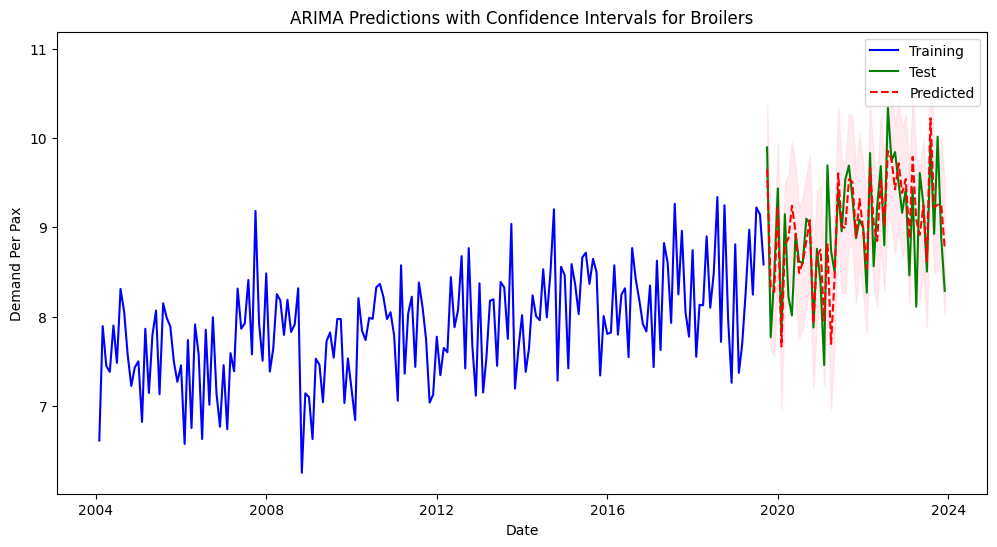

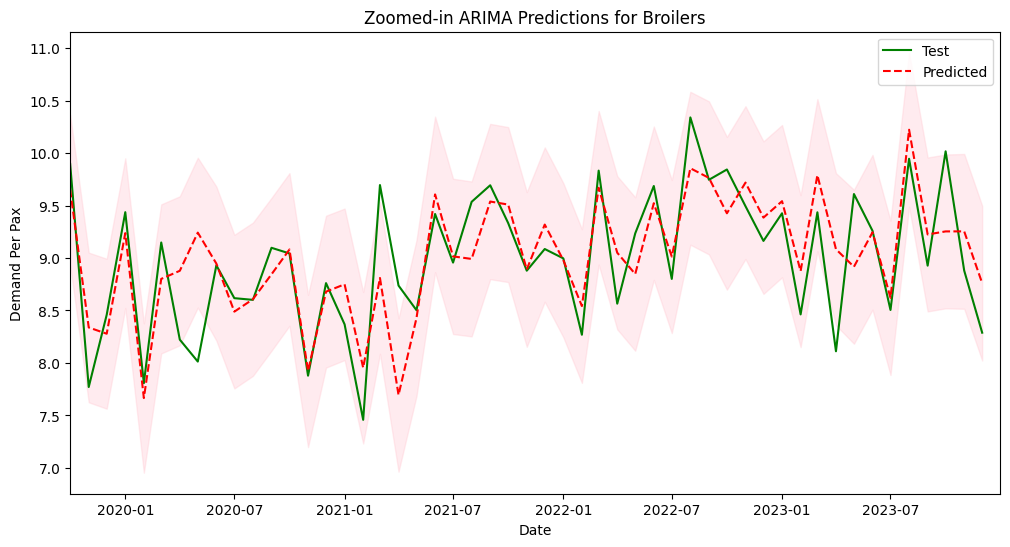

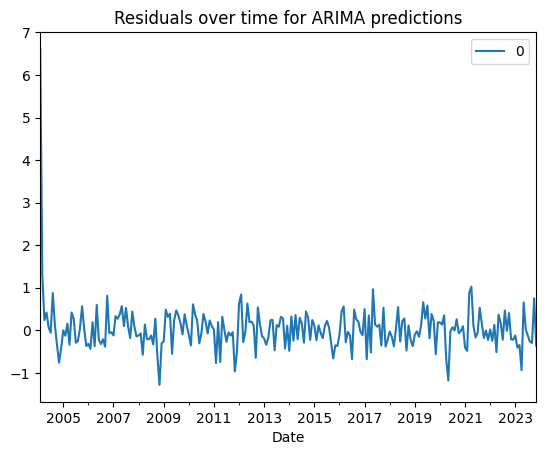

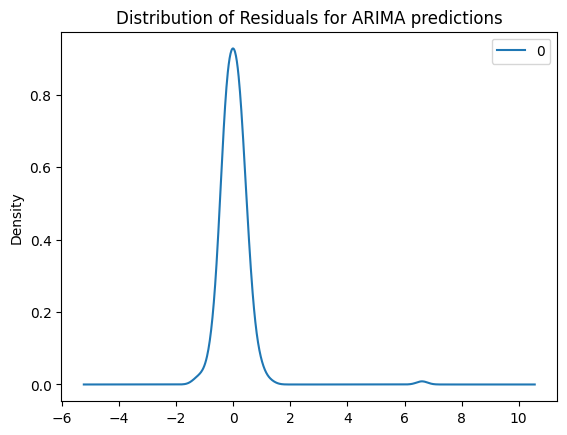

                0
count  238.000000
mean     0.035696
std      0.578483
min     -1.283478
25%     -0.245606
50%     -0.000866
75%      0.259398
max      6.612654


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x308cefb10>,
      Product     Time  Actual Price  Predicted Price
 0   Broilers  2019-10      9.896005         9.650426
 1   Broilers  2019-11      7.770560         8.337919
 2   Broilers  2019-12      8.458873         8.278282
 3   Broilers  2020-01      9.436543         9.236681
 4   Broilers  2020-02      7.806966         7.665345
 5   Broilers  2020-03      9.147633         8.800818
 6   Broilers  2020-04      8.221861         8.878021
 7   Broilers  2020-05      8.012852         9.241651
 8   Broilers  2020-06      8.930267         8.946663
 9   Broilers  2020-07      8.617111         8.488636
 10  Broilers  2020-08      8.601006         8.606989
 11  Broilers  2020-09      9.097096         8.844349
 12  Broilers  2020-10      9.043364         9.081188
 13  Broilers  2020-11      7.878217         7.923238
 14  Broilers  2020-12      8.760475         8.679003
 15  Broilers  2021-01      8.367586         8.749164
 16  B

In [43]:
model = trainSARIMAXModel(broilers, train, test, 3, 1, 0, 2, 0, 0, 12, 'Broilers', months=50, value_name='demand_per_pax')
model

In [44]:
print(getMAPE(model[1]))
model[0].summary()

The Mean Absolute Percentage Error (MAPE) of the results is 3.61%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     demand_per_pax   No. Observations:                  238
Model:             SARIMAX(3, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -109.818
Date:                            Sun, 24 Mar 2024   AIC                            231.635
Time:                                    21:02:04   BIC                            252.444
Sample:                                02-29-2004   HQIC                           240.023
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8608      0.063    -13.710      0.000      -0.984      -0.738
ar.L2         -0.5523      0.086     -6.423      0.000      -0.721      -0.384
ar.L3          0.1348      0.069      1.960      0.050    3.42e-05       0.270
ar.S.L12       0.6063      0.066      9.245      0.000       0.478       0.735
ar.S.L24       0.1415      0.074      1.914      0.056      -0.003       0.286
sigma2         0.1415      0.012     11.328      0.000       0.117       0.166
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.85   Prob(JB):                         0.28
Heteroskedasticity (H):               1.19   Skew:                            -0.15
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
predictions = pd.DataFrame(pseudo_demand[pseudo_demand['Animal'] == 'Broilers'].iloc[8:]['demand_per_pax'])
predictions

,demand_per_pax
Date,
2004-02,6.612654
2004-03,7.893684
2004-04,7.447248
2004-05,7.381881
2004-06,7.900241
...,...
2023-08,9.945571
2023-09,8.927141
2023-10,10.016401


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15449D-01    |proj g|=  6.27335D-01

At iterate    5    f=  4.69187D-01    |proj g|=  5.80209D-02

At iterate   10    f=  4.49556D-01    |proj g|=  5.23080D-02

At iterate   15    f=  3.91660D-01    |proj g|=  1.69031D-01

At iterate   20    f=  3.79130D-01    |proj g|=  9.07202D-02

At iterate   25    f=  3.70465D-01    |proj g|=  4.13873D-02

At iterate   30    f=  3.69080D-01    |proj g|=  2.47466D-02

At iterate   35    f=  3.68992D-01    |proj g|=  3.87347D-03

At iterate   40    f=  3.68925D-01    |proj g|=  7.53860D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


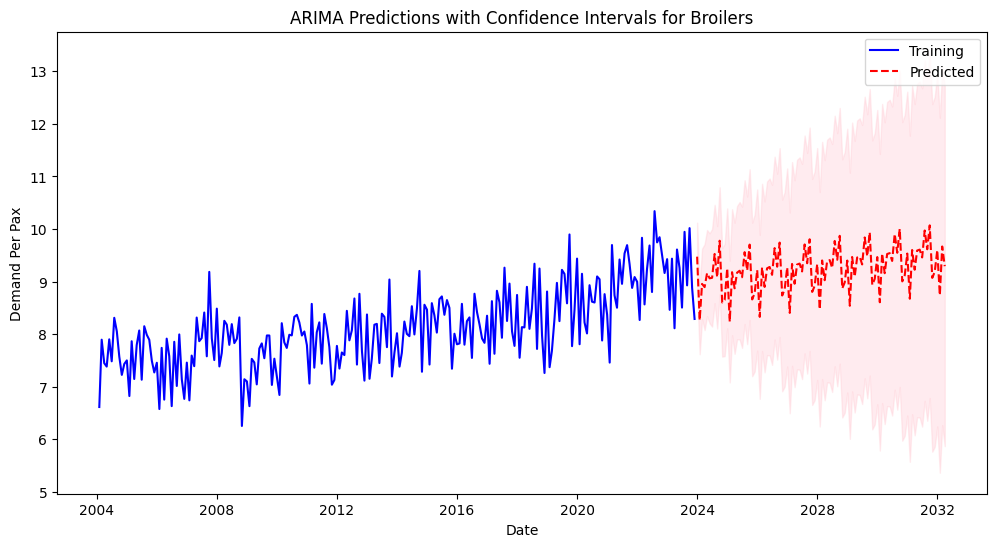

In [95]:
p, d, q, P, D, Q, m = 2, 1, 0, 2, 0, 1, 12
model = SARIMAX(pd.to_numeric(predictions['demand_per_pax']), order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=100)

# plotting train, test, predicted values and confidence intervals
y_pred = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(predictions.index.to_timestamp(), predictions['demand_per_pax'], label='Training', color='blue')
# plt.plot(test_data.index.to_timestamp(), test_data[value_name], label='Test', color='green')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

# Plotting confidence intervals
plt.fill_between(y_pred.index.to_timestamp(), forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'ARIMA Predictions with Confidence Intervals for Broilers')
plt.xlabel('Date')
plt.ylabel('Demand Per Pax')
plt.legend()
plt.show()
# pd.to_numeric(predictions['demand_per_pax'])

In [47]:
broilers_dd_per_pax = pd.concat([predictions['demand_per_pax'], y_pred], axis=0)
broilers_dd_per_pax.name = 'broilers_demand_per_pax'
broilers_dd_per_pax.to_csv('predicted_broilers_demand.csv')

# Slaughter Weights

In [19]:
slaughter_weights['Animal'].unique()

array(['Cattle', 'Calves', 'Hogs', 'Sheep and Lambs', 'Broilers',
       'Other Chickens', 'Turkeys', 'Steers', 'Heifers', 'Cows',
       'Bulls and Stags'], dtype=object)

In [54]:
beef = slaughter_weights[
    (slaughter_weights['Animal'] == 'Cattle') |
    (slaughter_weights['Animal'] == 'Cows') |
    (slaughter_weights['Animal'] == 'Steers') |
    (slaughter_weights['Animal'] == 'Heifers') |
    (slaughter_weights['Animal'] == 'Bulls and Stags')
].drop('Date', axis=1).groupby('Date')['Weight'].mean()
beef.index = beef.index.to_period('M')
beef.name = 'Weight'
beef = pd.DataFrame(beef)

In [56]:
train, test = trainTestSplit(beef, months=50)
params = getBestParams(train, 10, 10, 10, value_name='Weight', season=12)
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  441
Model:             SARIMAX(1, 1, 2)x(2, 0, [1], 12)   Log Likelihood               -1238.416
Date:                              Sun, 24 Mar 2024   AIC                           2492.831
Time:                                      21:09:53   BIC                           2525.525
Sample:                                  01-31-1983   HQIC                          2505.729
                                       - 09-30-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.001      0.949      0.342      -0.001       0.002
ar.L1          0.8994      0.032     27.743      0.000       0.836       0.963
ma.L1         -0.7071      0.054    -13.154      0.000      -0.812      -0.602
ma.L2         -0.2776      0.046     -5.981      0.000      -0.369      -0.187
ar.S.L12       1.2060      0.075     16.122      0.000       1.059       1.353
ar.S.L24      -0.2177      0.069     -3.141      0.002      -0.354      -0.082
ma.S.L12      -0.8606      0.052    -16.575      0.000      -0.962      -0.759
sigma2        15.8690      1.081     14.686      0.000      13.751      17.987
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.85   Prob(JB):                         0.10
Heteroskedasticity (H):               0.82   Skew:                            -0.25
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91734D+00    |proj g|=  1.13490D-01

At iterate    5    f=  2.82839D+00    |proj g|=  3.77976D-02

At iterate   10    f=  2.81867D+00    |proj g|=  4.30923D-02

At iterate   15    f=  2.81177D+00    |proj g|=  1.19201D-02

At iterate   20    f=  2.81142D+00    |proj g|=  6.02925D-04

At iterate   25    f=  2.81140D+00    |proj g|=  3.00736D-03

At iterate   30    f=  2.81137D+00    |proj g|=  1.61518D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91599D+00    |proj g|=  1.13291D-01

At iterate    5    f=  2.82723D+00    |proj g|=  3.77814D-02

At iterate   10    f=  2.81747D+00    |proj g|=  4.37860D-02

At iterate   15    f=  2.81065D+00    |proj g|=  1.19206D-02

At iterate   20    f=  2.81030D+00    |proj g|=  6.33810D-04

At iterate   25    f=  2.81028D+00    |proj g|=  2.99954D-03

At iterate   30    f=  2.81025D+00    |proj g|=  3.73659D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.82836D+00    |proj g|=  3.57647D-02

At iterate   10    f=  2.81755D+00    |proj g|=  4.41156D-02

At iterate   15    f=  2.81161D+00    |proj g|=  6.54147D-03

At iterate   20    f=  2.81131D+00    |proj g|=  2.76428D-04

At iterate   25    f=  2.81125D+00    |proj g|=  1.76065D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   3.152D-05   2.811D+00
  F =   2.8112421133684586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.82822D+00    |proj g|=  3.79950D-02

At iterate   10    f=  2.81958D+00    |proj g|=  4.01314D-02

At iterate   15    f=  2.81189D+00    |proj g|=  9.42029D-03

At iterate   20    f=  2.81137D+00    |proj g|=  3.60271D-04

At iterate   25    f=  2.81129D+00    |proj g|=  3.61895D-03

At iterate   30    f=  2.81125D+00    |proj g|=  7.11498D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     38      1     0     0   2.976D-05   2.811D+00
  F =   2.8112493656357112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91812D+00    |proj g|=  1.03298D-01

At iterate    5    f=  2.82940D+00    |proj g|=  2.83306D-02

At iterate   10    f=  2.81347D+00    |proj g|=  1.53952D-02

At iterate   15    f=  2.81194D+00    |proj g|=  3.91854D-03

At iterate   20    f=  2.81176D+00    |proj g|=  4.92677D-04

At iterate   25    f=  2.81165D+00    |proj g|=  4.97864D-04

At iterate   30    f=  2.81164D+00    |proj g|=  8.05689D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.83056D+00    |proj g|=  2.74998D-02

At iterate   10    f=  2.81496D+00    |proj g|=  1.09655D-02

At iterate   15    f=  2.81252D+00    |proj g|=  2.54871D-03

At iterate   20    f=  2.81244D+00    |proj g|=  1.57808D-03

At iterate   25    f=  2.81227D+00    |proj g|=  1.05935D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     31      1     0     0   6.838D-05   2.812D+00
  F =   2.8122673901315691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91633D+00    |proj g|=  1.02802D-01

At iterate    5    f=  2.82972D+00    |proj g|=  2.97695D-02

At iterate   10    f=  2.81661D+00    |proj g|=  4.04435D-02

At iterate   15    f=  2.81184D+00    |proj g|=  6.38383D-03

At iterate   20    f=  2.81130D+00    |proj g|=  4.18413D-04

At iterate   25    f=  2.81118D+00    |proj g|=  6.89169D-03

At iterate   30    f=  2.81114D+00    |proj g|=  4.84145D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91590D+00    |proj g|=  1.03467D-01

At iterate    5    f=  2.82941D+00    |proj g|=  3.03874D-02

At iterate   10    f=  2.81686D+00    |proj g|=  4.53463D-02

At iterate   15    f=  2.81094D+00    |proj g|=  1.11372D-02

At iterate   20    f=  2.81062D+00    |proj g|=  9.02308D-04

At iterate   25    f=  2.81044D+00    |proj g|=  1.83855D-03

At iterate   30    f=  2.81043D+00    |proj g|=  2.39031D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.83961D+00    |proj g|=  3.32345D-02

At iterate   10    f=  2.82835D+00    |proj g|=  5.24346D-02

At iterate   15    f=  2.82076D+00    |proj g|=  6.40643D-03

At iterate   20    f=  2.82032D+00    |proj g|=  9.28549D-04

At iterate   25    f=  2.82023D+00    |proj g|=  1.55053D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     33      1     0     0   4.040D-06   2.820D+00
  F =   2.8202164931700384     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.83917D+00    |proj g|=  3.41897D-02

At iterate   10    f=  2.82746D+00    |proj g|=  5.08831D-02

At iterate   15    f=  2.82076D+00    |proj g|=  4.72721D-03

At iterate   20    f=  2.82028D+00    |proj g|=  3.20319D-04

At iterate   25    f=  2.82026D+00    |proj g|=  4.00553D-03

At iterate   30    f=  2.82023D+00    |proj g|=  1.99992D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   2.000D-05   2.820D+00
  F =   2.8202287310820298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  2.82669D+00    |proj g|=  4.55061D-02

At iterate   15    f=  2.82084D+00    |proj g|=  7.21449D-03

At iterate   20    f=  2.82004D+00    |proj g|=  3.75714D-04

At iterate   25    f=  2.81998D+00    |proj g|=  5.70038D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     32      1     0     0   3.366D-05   2.820D+00
  F =   2.8199742814210471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.83956D+00    |proj g|=  3.00135D-02

At iterate   10    f=  2.82649D+00    |proj g|=  3.86301D-02

At iterate   15    f=  2.82050D+00    |proj g|=  9.40257D-03

At iterate   20    f=  2.81994D+00    |proj g|=  2.05031D-04

At iterate   25    f=  2.81990D+00    |proj g|=  5.93002D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   1.036D-05   2.820D+00
  F =   2.8198985759888537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.83771D+00    |proj g|=  1.26821D-02

At iterate   10    f=  2.82745D+00    |proj g|=  4.91599D-02

At iterate   15    f=  2.81982D+00    |proj g|=  9.09617D-03

At iterate   20    f=  2.81927D+00    |proj g|=  2.10478D-03

At iterate   25    f=  2.81924D+00    |proj g|=  1.54525D-03

At iterate   30    f=  2.81914D+00    |proj g|=  3.44255D-04

At iterate   35    f=  2.81914D+00    |proj g|=  2.30053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     41      1     0     0   1.584D-05   2.819D+00
  F =   2.8191388942698152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.83649D+00    |proj g|=  1.23980D-02

At iterate   10    f=  2.82628D+00    |proj g|=  4.87989D-02

At iterate   15    f=  2.81867D+00    |proj g|=  8.16728D-03

At iterate   20    f=  2.81815D+00    |proj g|=  1.60739D-03

At iterate   25    f=  2.81811D+00    |proj g|=  1.97584D-03

At iterate   30    f=  2.81802D+00    |proj g|=  4.80461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   9.573D-06   2.818D+00
  F =   2.8180245575826683     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.83709D+00    |proj g|=  1.05113D-02

At iterate   10    f=  2.82592D+00    |proj g|=  4.11500D-02

At iterate   15    f=  2.81831D+00    |proj g|=  3.85736D-03

At iterate   20    f=  2.81824D+00    |proj g|=  2.65430D-04

At iterate   25    f=  2.81819D+00    |proj g|=  1.78923D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     32      1     0     0   9.498D-06   2.818D+00
  F =   2.8181921986191880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91800D+00    |proj g|=  1.03954D-01

At iterate    5    f=  2.83658D+00    |proj g|=  1.16306D-02

At iterate   10    f=  2.82571D+00    |proj g|=  4.67038D-02

At iterate   15    f=  2.81815D+00    |proj g|=  1.01647D-02

At iterate   20    f=  2.81775D+00    |proj g|=  7.36653D-04

At iterate   25    f=  2.81773D+00    |proj g|=  2.61068D-03

At iterate   30    f=  2.81769D+00    |proj g|=  4.79838D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.84245D+00    |proj g|=  2.73987D-02

At iterate   10    f=  2.82976D+00    |proj g|=  4.17024D-02

At iterate   15    f=  2.82305D+00    |proj g|=  8.14552D-03

At iterate   20    f=  2.82242D+00    |proj g|=  2.24812D-04

At iterate   25    f=  2.82240D+00    |proj g|=  7.81150D-04

At iterate   30    f=  2.82240D+00    |proj g|=  2.54689D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   2.547D-05   2.822D+00
  F =   2.8223979886344743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.84193D+00    |proj g|=  1.22073D-02

At iterate   10    f=  2.83235D+00    |proj g|=  5.12161D-02

At iterate   15    f=  2.82407D+00    |proj g|=  5.12862D-03

At iterate   20    f=  2.82371D+00    |proj g|=  7.49790D-04

At iterate   25    f=  2.82371D+00    |proj g|=  2.38113D-04

At iterate   30    f=  2.82370D+00    |proj g|=  1.34482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     34      1     0     0   7.459D-06   2.824D+00
  F =   2.8237012677245996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.84171D+00    |proj g|=  1.11177D-02

At iterate   10    f=  2.83073D+00    |proj g|=  3.37095D-02

At iterate   15    f=  2.82417D+00    |proj g|=  1.59032D-02

At iterate   20    f=  2.82394D+00    |proj g|=  5.65640D-04

At iterate   25    f=  2.82393D+00    |proj g|=  2.26192D-03

At iterate   30    f=  2.82390D+00    |proj g|=  2.84691D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     38      1     0     0   1.211D-05   2.824D+00
  F =   2.8239016530377010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92216D+00    |proj g|=  1.02080D-01

At iterate    5    f=  2.84177D+00    |proj g|=  1.06743D-02

At iterate   10    f=  2.83178D+00    |proj g|=  3.16788D-02

At iterate   15    f=  2.82515D+00    |proj g|=  7.48229D-03

At iterate   20    f=  2.82496D+00    |proj g|=  3.47158D-04

At iterate   25    f=  2.82495D+00    |proj g|=  1.80332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92242D+00    |proj g|=  1.01747D-01

At iterate    5    f=  2.84300D+00    |proj g|=  3.65881D-02

At iterate   10    f=  2.83153D+00    |proj g|=  3.51641D-02

At iterate   15    f=  2.82539D+00    |proj g|=  2.53580D-03

At iterate   20    f=  2.82537D+00    |proj g|=  5.68991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     26      1     0     0   5.130D-05   2.825D+00
  F =   2.8253682090026770     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.84600D+00    |proj g|=  3.36022D-02

At iterate   10    f=  2.83578D+00    |proj g|=  3.37310D-02

At iterate   15    f=  2.82959D+00    |proj g|=  1.89047D-03

At iterate   20    f=  2.82957D+00    |proj g|=  2.14715D-04

At iterate   25    f=  2.82956D+00    |proj g|=  3.55025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   2.712D-05   2.830D+00
  F =   2.8295552787193898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92279D+00    |proj g|=  1.02141D-01

At iterate    5    f=  2.84452D+00    |proj g|=  3.19649D-02

At iterate   10    f=  2.83484D+00    |proj g|=  3.23933D-02

At iterate   15    f=  2.82859D+00    |proj g|=  2.82701D-03

At iterate   20    f=  2.82855D+00    |proj g|=  3.81554D-04

At iterate   25    f=  2.82853D+00    |proj g|=  1.43387D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.84410D+00    |proj g|=  3.14570D-02

At iterate   10    f=  2.83397D+00    |proj g|=  3.05075D-02

At iterate   15    f=  2.82802D+00    |proj g|=  3.01395D-03

At iterate   20    f=  2.82794D+00    |proj g|=  6.71684D-04

At iterate   25    f=  2.82792D+00    |proj g|=  2.61431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     31      1     0     0   1.118D-05   2.828D+00
  F =   2.8279189145446098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92106D+00    |proj g|=  1.01584D-01

At iterate    5    f=  2.84301D+00    |proj g|=  3.10103D-02

At iterate   10    f=  2.83252D+00    |proj g|=  2.88163D-02

At iterate   15    f=  2.82702D+00    |proj g|=  3.20618D-03

At iterate   20    f=  2.82695D+00    |proj g|=  6.27374D-04

At iterate   25    f=  2.82694D+00    |proj g|=  5.86289D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92042D+00    |proj g|=  1.00760D-01

At iterate    5    f=  2.84250D+00    |proj g|=  3.10750D-02

At iterate   10    f=  2.83204D+00    |proj g|=  2.84231D-02

At iterate   15    f=  2.82632D+00    |proj g|=  1.67186D-03

At iterate   20    f=  2.82629D+00    |proj g|=  6.17180D-04

At iterate   25    f=  2.82625D+00    |proj g|=  5.88780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.84165D+00    |proj g|=  2.93715D-02

At iterate   10    f=  2.83105D+00    |proj g|=  2.53653D-02

At iterate   15    f=  2.82525D+00    |proj g|=  3.58656D-03

At iterate   20    f=  2.82518D+00    |proj g|=  9.29544D-05

At iterate   25    f=  2.82518D+00    |proj g|=  6.93266D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   4.820D-06   2.825D+00
  F =   2.8251797236531253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92236D+00    |proj g|=  1.01491D-01

At iterate    5    f=  2.84398D+00    |proj g|=  9.13831D-03

At iterate   10    f=  2.83365D+00    |proj g|=  1.04853D-02

At iterate   15    f=  2.82789D+00    |proj g|=  2.75781D-03

At iterate   20    f=  2.82788D+00    |proj g|=  5.36345D-04

At iterate   25    f=  2.82786D+00    |proj g|=  7.98862D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92243D+00    |proj g|=  1.03010D-01

At iterate    5    f=  2.84384D+00    |proj g|=  3.03259D-02

At iterate   10    f=  2.83320D+00    |proj g|=  2.50836D-02

At iterate   15    f=  2.82693D+00    |proj g|=  3.68782D-03

At iterate   20    f=  2.82682D+00    |proj g|=  3.95562D-04

At iterate   25    f=  2.82680D+00    |proj g|=  3.67720D-04

At iterate   30    f=  2.82679D+00    |proj g|=  5.76966D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92218D+00    |proj g|=  1.05038D-01

At iterate    5    f=  2.84353D+00    |proj g|=  3.32145D-02

At iterate   10    f=  2.83371D+00    |proj g|=  3.10814D-02

At iterate   15    f=  2.82671D+00    |proj g|=  2.47731D-03

At iterate   20    f=  2.82666D+00    |proj g|=  9.71802D-04

At iterate   25    f=  2.82655D+00    |proj g|=  7.84336D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92170D+00    |proj g|=  1.06680D-01

At iterate    5    f=  2.84248D+00    |proj g|=  3.34995D-02

At iterate   10    f=  2.83280D+00    |proj g|=  3.05540D-02

At iterate   15    f=  2.82571D+00    |proj g|=  1.87334D-03

At iterate   20    f=  2.82566D+00    |proj g|=  1.14510D-03

At iterate   25    f=  2.82554D+00    |proj g|=  8.99164D-04

At iterate   30    f=  2.82554D+00    |proj g|=  4.55102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92190D+00    |proj g|=  1.05723D-01

At iterate    5    f=  2.84208D+00    |proj g|=  3.26888D-02

At iterate   10    f=  2.83156D+00    |proj g|=  2.36757D-02

At iterate   15    f=  2.82494D+00    |proj g|=  5.43965D-03

At iterate   20    f=  2.82475D+00    |proj g|=  2.27564D-04

At iterate   25    f=  2.82471D+00    |proj g|=  3.15735D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92597D+00    |proj g|=  1.04294D-01

At iterate    5    f=  2.84638D+00    |proj g|=  3.16361D-02

At iterate   10    f=  2.83455D+00    |proj g|=  2.75869D-02

At iterate   15    f=  2.82857D+00    |proj g|=  8.47118D-03

At iterate   20    f=  2.82851D+00    |proj g|=  1.18645D-04

At iterate   25    f=  2.82850D+00    |proj g|=  7.82532D-04

At iterate   30    f=  2.82850D+00    |proj g|=  2.71168D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.84555D+00    |proj g|=  3.34149D-02

At iterate   10    f=  2.83423D+00    |proj g|=  2.68972D-02

At iterate   15    f=  2.82841D+00    |proj g|=  1.01006D-03

At iterate   20    f=  2.82839D+00    |proj g|=  4.71761D-04

At iterate   25    f=  2.82837D+00    |proj g|=  3.29519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   3.635D-05   2.828D+00
  F =   2.8283652668170429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92403D+00    |proj g|=  1.05227D-01

At iterate    5    f=  2.84456D+00    |proj g|=  3.31339D-02

At iterate   10    f=  2.83345D+00    |proj g|=  2.81731D-02

At iterate   15    f=  2.82757D+00    |proj g|=  1.20928D-03

At iterate   20    f=  2.82755D+00    |proj g|=  7.72958D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     29      1     0     0   4.191D-05   2.828D+00
  F =   2.8275314424492173     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.84324D+00    |proj g|=  3.27127D-02

At iterate   10    f=  2.83245D+00    |proj g|=  2.59983D-02

At iterate   15    f=  2.82661D+00    |proj g|=  9.10295D-03

At iterate   20    f=  2.82652D+00    |proj g|=  3.75576D-04

At iterate   25    f=  2.82651D+00    |proj g|=  1.84949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     33      1     0     0   2.196D-05   2.827D+00
  F =   2.8265062500720357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.84228D+00    |proj g|=  3.04379D-02

At iterate   10    f=  2.83153D+00    |proj g|=  2.96157D-02

At iterate   15    f=  2.82600D+00    |proj g|=  4.97178D-03

At iterate   20    f=  2.82592D+00    |proj g|=  2.29049D-03

At iterate   25    f=  2.82585D+00    |proj g|=  8.33427D-04

At iterate   30    f=  2.82584D+00    |proj g|=  1.77933D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     36      1     0     0   2.224D-06   2.826D+00
  F =   2.8258419951189038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  2.83107D+00    |proj g|=  2.64666D-02

At iterate   15    f=  2.82508D+00    |proj g|=  1.45258D-03

At iterate   20    f=  2.82504D+00    |proj g|=  1.30208D-03

At iterate   25    f=  2.82501D+00    |proj g|=  2.43973D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     33      1     0     0   5.021D-06   2.825D+00
  F =   2.8250073466423498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92146D+00    |proj g|=  1.05014D-01

At iterate    5    f=  2.84061D+00    |proj g|=  3.19134D-02

At iterate   10    f=  2.83005D+00    |proj g|=  2.38615D-02

At iterate   15    f=  2.82405D+00    |proj g|=  1.95371D-03

At iterate   20    f=  2.82400D+00    |proj g|=  8.90841D-04

At iterate   25    f=  2.82397D+00    |proj g|=  8.20207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92078D+00    |proj g|=  1.04622D-01

At iterate    5    f=  2.84012D+00    |proj g|=  3.11823D-02

At iterate   10    f=  2.82996D+00    |proj g|=  2.44869D-02

At iterate   15    f=  2.82399D+00    |proj g|=  1.62276D-03

At iterate   20    f=  2.82395D+00    |proj g|=  5.13467D-04

At iterate   25    f=  2.82394D+00    |proj g|=  1.78350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92109D+00    |proj g|=  1.03249D-01

At iterate    5    f=  2.84267D+00    |proj g|=  2.82389D-02

At iterate   10    f=  2.83148D+00    |proj g|=  3.03127D-02

At iterate   15    f=  2.82613D+00    |proj g|=  2.59833D-03

At iterate   20    f=  2.82611D+00    |proj g|=  1.79873D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     25      1     0     0   1.918D-05   2.826D+00
  F =   2.8261148355796624     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92021D+00    |proj g|=  1.03484D-01

At iterate    5    f=  2.84178D+00    |proj g|=  2.74945D-02

At iterate   10    f=  2.83061D+00    |proj g|=  3.26404D-02

At iterate   15    f=  2.82509D+00    |proj g|=  1.58192D-03

At iterate   20    f=  2.82507D+00    |proj g|=  5.06286D-05

At iterate   25    f=  2.82507D+00    |proj g|=  2.58840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  1.02142D-01

At iterate    5    f=  2.83996D+00    |proj g|=  1.01898D-02

At iterate   10    f=  2.82891D+00    |proj g|=  1.01245D-02

At iterate   15    f=  2.82435D+00    |proj g|=  9.87149D-04

At iterate   20    f=  2.82435D+00    |proj g|=  2.31225D-04

At iterate   25    f=  2.82434D+00    |proj g|=  1.76196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     33      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.84004D+00    |proj g|=  2.83144D-02

At iterate   10    f=  2.82800D+00    |proj g|=  2.95100D-02

At iterate   15    f=  2.82331D+00    |proj g|=  3.54044D-04

At iterate   20    f=  2.82331D+00    |proj g|=  5.09787D-05

At iterate   25    f=  2.82331D+00    |proj g|=  5.20700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   2.189D-05   2.823D+00
  F =   2.8233084274294900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91817D+00    |proj g|=  1.02598D-01

At iterate    5    f=  2.84014D+00    |proj g|=  2.86413D-02

At iterate   10    f=  2.82824D+00    |proj g|=  3.15665D-02

At iterate   15    f=  2.82372D+00    |proj g|=  5.65909D-04

At iterate   20    f=  2.82371D+00    |proj g|=  1.60632D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     24      1     0     0   1.606D-05   2.824D+00
  F =   2.8237082361784656     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91830D+00    |proj g|=  1.01168D-01

At iterate    5    f=  2.83920D+00    |proj g|=  1.00400D-02

At iterate   10    f=  2.82909D+00    |proj g|=  1.00962D-02

At iterate   15    f=  2.82473D+00    |proj g|=  6.27239D-04

At iterate   20    f=  2.82472D+00    |proj g|=  1.32190D-03

At iterate   25    f=  2.82470D+00    |proj g|=  3.65467D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91723D+00    |proj g|=  1.01488D-01

At iterate    5    f=  2.83812D+00    |proj g|=  9.92968D-03

At iterate   10    f=  2.82796D+00    |proj g|=  1.00329D-02

At iterate   15    f=  2.82371D+00    |proj g|=  1.30036D-03

At iterate   20    f=  2.82370D+00    |proj g|=  1.19583D-03

At iterate   25    f=  2.82368D+00    |proj g|=  1.37265D-04

At iterate   30    f=  2.82368D+00    |proj g|=  9.89624D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91632D+00    |proj g|=  1.02071D-01

At iterate    5    f=  2.83703D+00    |proj g|=  9.65712D-03

At iterate   10    f=  2.82673D+00    |proj g|=  9.89401D-03

At iterate   15    f=  2.82267D+00    |proj g|=  1.12670D-03

At iterate   20    f=  2.82266D+00    |proj g|=  1.12220D-03

At iterate   25    f=  2.82265D+00    |proj g|=  3.83178D-04

At iterate   30    f=  2.82265D+00    |proj g|=  4.92680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91574D+00    |proj g|=  1.01503D-01

At iterate    5    f=  2.83606D+00    |proj g|=  9.77942D-03

At iterate   10    f=  2.82587D+00    |proj g|=  9.92550D-03

At iterate   15    f=  2.82176D+00    |proj g|=  1.08109D-03

At iterate   20    f=  2.82175D+00    |proj g|=  7.31921D-04

At iterate   25    f=  2.82173D+00    |proj g|=  6.73829D-04

At iterate   30    f=  2.82173D+00    |proj g|=  5.17016D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.83545D+00    |proj g|=  9.82854D-03

At iterate   10    f=  2.82519D+00    |proj g|=  1.00024D-02

At iterate   15    f=  2.82099D+00    |proj g|=  1.09954D-03

At iterate   20    f=  2.82099D+00    |proj g|=  5.98287D-04

At iterate   25    f=  2.82098D+00    |proj g|=  4.61337D-04

At iterate   30    f=  2.82097D+00    |proj g|=  3.13689D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   7.924D-06   2.821D+00
  F =   2.8209736624094655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.83531D+00    |proj g|=  1.01699D-02

At iterate   10    f=  2.82485D+00    |proj g|=  1.00285D-02

At iterate   15    f=  2.82061D+00    |proj g|=  1.04101D-03

At iterate   20    f=  2.82061D+00    |proj g|=  6.57832D-04

At iterate   25    f=  2.82059D+00    |proj g|=  3.76904D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   8.508D-06   2.821D+00
  F =   2.8205946358150373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


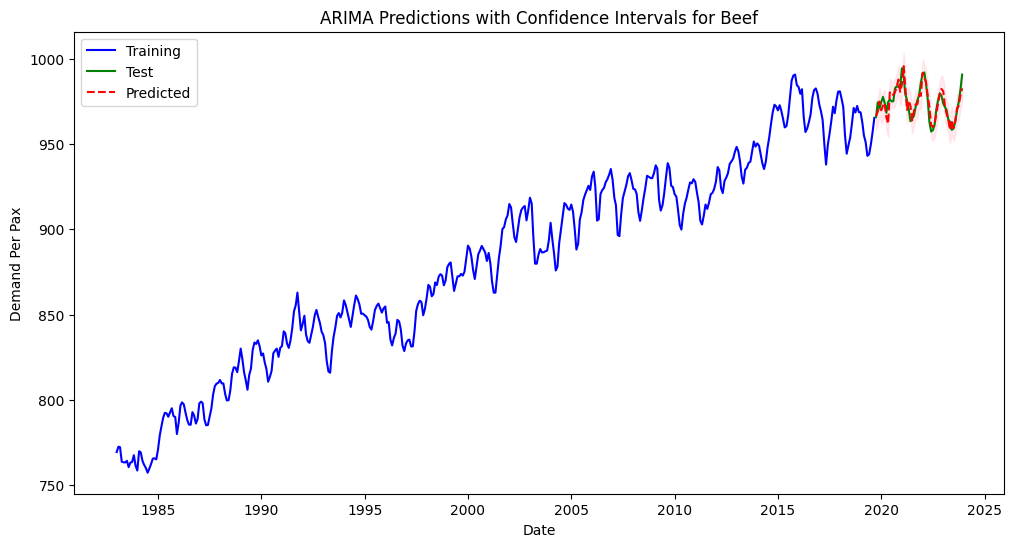

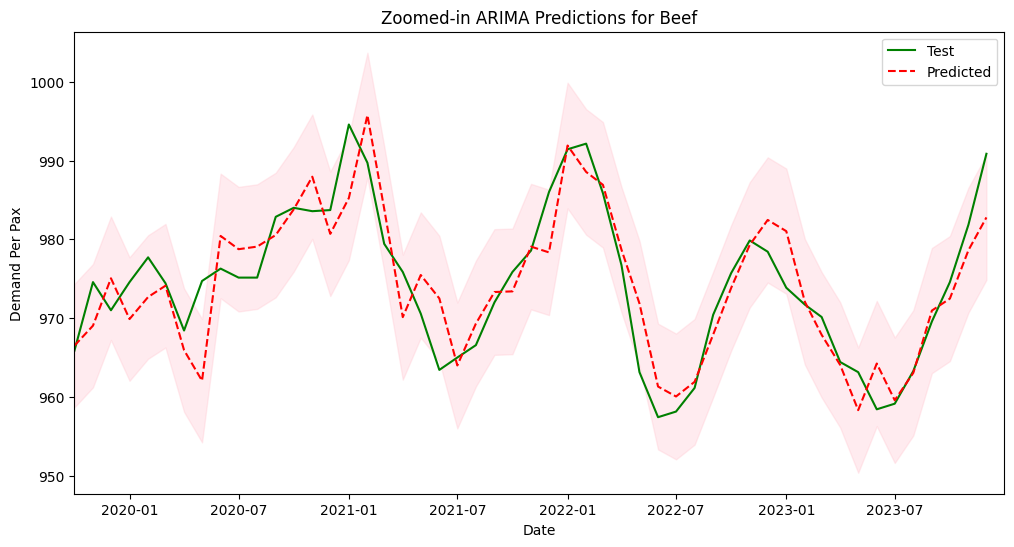

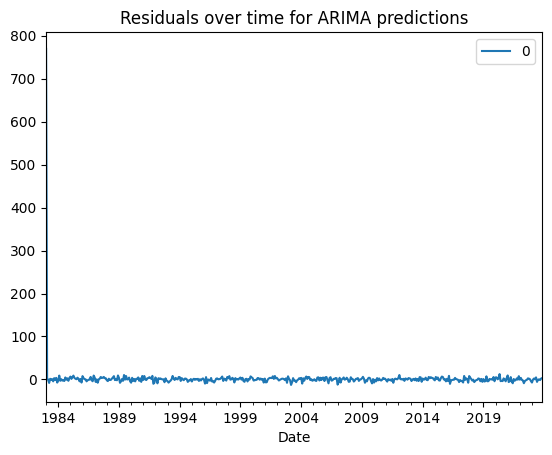

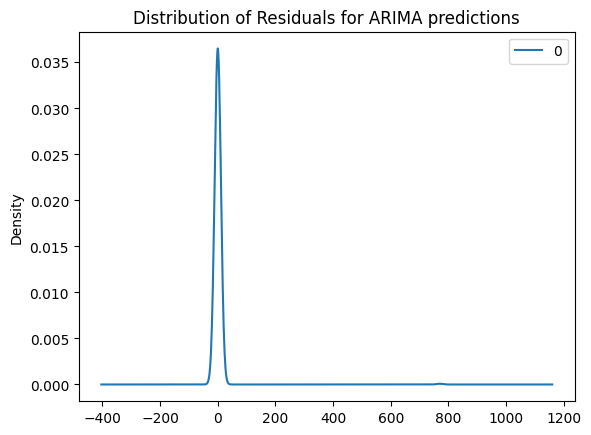

                0
count  491.000000
mean     1.768574
std     34.946670
min    -12.708046
25%     -2.403901
50%      0.512004
75%      2.881260
max    769.285714


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1622e5d50>,
    Product     Time  Actual Price  Predicted Price
 0     Beef  2019-10    965.857143       966.499336
 1     Beef  2019-11    974.571429       969.043542
 2     Beef  2019-12    971.000000       975.056407
 3     Beef  2020-01    974.571429       969.881912
 4     Beef  2020-02    977.714286       972.681264
 5     Beef  2020-03    974.428571       974.113702
 6     Beef  2020-04    968.428571       965.934561
 7     Beef  2020-05    974.714286       962.059304
 8     Beef  2020-06    976.285714       980.431560
 9     Beef  2020-07    975.142857       978.747928
 10    Beef  2020-08    975.142857       979.075993
 11    Beef  2020-09    982.857143       980.546811
 12    Beef  2020-10    984.000000       983.800652
 13    Beef  2020-11    983.571429       987.948017
 14    Beef  2020-12    983.714286       980.695888
 15    Beef  2021-01    994.571429       985.240529
 16    Beef  2021-02    989.714286      

In [60]:
model = trainSARIMAXModel(beef, train, test, 1, 1, 2, 2, 0, [1], 12, 'Beef', months=50, value_name='Weight')
model

In [61]:
print(getMAPE(model[1]))
model[0].summary()

The Mean Absolute Percentage Error (MAPE) of the results is 0.36%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Weight   No. Observations:                  491
Model:             SARIMAX(1, 1, 2)x(2, 0, [1], 12)   Log Likelihood               -1384.912
Date:                              Sun, 24 Mar 2024   AIC                           2783.824
Time:                                      21:16:05   BIC                           2813.185
Sample:                                  01-31-1983   HQIC                          2795.355
                                       - 11-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8995      0.034     26.395      0.000       0.833       0.966
ma.L1         -0.6928      0.051    -13.466      0.000      -0.794      -0.592
ma.L2         -0.2782      0.043     -6.398      0.000      -0.363      -0.193
ar.S.L12       1.1399      0.078     14.635      0.000       0.987       1.293
ar.S.L24      -0.1667      0.069     -2.402      0.016      -0.303      -0.031
ma.S.L12      -0.8015      0.055    -14.494      0.000      -0.910      -0.693
sigma2        16.3389      1.031     15.848      0.000      14.318      18.360
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.27
Prob(Q):                              0.91   Prob(JB):                         0.20
Heteroskedasticity (H):               0.88   Skew:                            -0.19
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
predictions = beef

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91723D+00    |proj g|=  9.98595D-02

At iterate    5    f=  2.83818D+00    |proj g|=  9.90618D-03

At iterate   10    f=  2.82834D+00    |proj g|=  1.02087D-02

At iterate   15    f=  2.82362D+00    |proj g|=  1.32308D-03

At iterate   20    f=  2.82361D+00    |proj g|=  1.37222D-04

At iterate   25    f=  2.82361D+00    |proj g|=  1.61878D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   

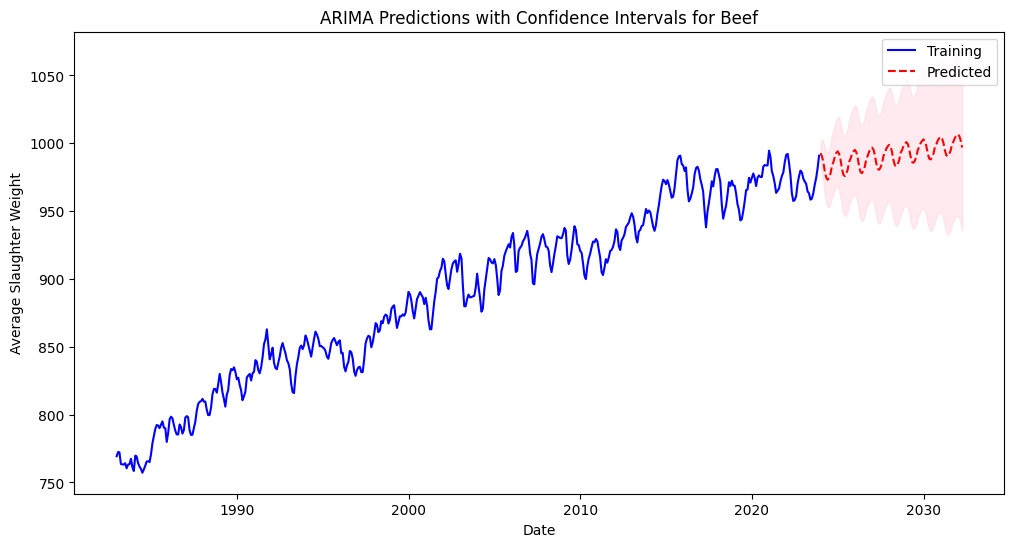

In [98]:
p, d, q, P, D, Q, m = 1, 1, 2, 2, 0, [1], 12
model = SARIMAX(pd.to_numeric(predictions['Weight']), order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=100)

# plotting train, test, predicted values and confidence intervals
y_pred = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(predictions.index.to_timestamp(), predictions['Weight'], label='Training', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

# Plotting confidence intervals
plt.fill_between(y_pred.index.to_timestamp(), forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'ARIMA Predictions with Confidence Intervals for Beef')
plt.xlabel('Date')
plt.ylabel('Average Slaughter Weight')
plt.legend()
plt.show()

In [65]:
beef_weights = pd.concat([predictions['Weight'], y_pred], axis=0)
beef_weights.name = 'Cows_sweight'
beef_weights.index.name = 'Date'
beef_weights.to_csv('predicted_beef_weight.csv')

## Pork ARIMA

In [76]:
pork = slaughter_weights[
    (slaughter_weights['Animal'] == 'Hogs')
].drop('Date', axis=1).groupby('Date')['Weight'].mean()
pork.index = pork.index.to_period('M')
pork.name = 'Weight'
pork = pd.DataFrame(pork)

In [77]:
train, test = trainTestSplit(pork, months=50)
params = getBestParams(train, 10, 10, 10, value_name='Weight', season=12)
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  441
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -586.544
Date:                              Sun, 24 Mar 2024   AIC                           1185.088
Time:                                      21:25:06   BIC                           1209.609
Sample:                                  01-31-1983   HQIC                          1194.762
                                       - 09-30-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8670      0.031     27.945      0.000       0.806       0.928
ma.L1         -0.8106      0.051    -15.920      0.000      -0.910      -0.711
ma.L2         -0.1692      0.048     -3.504      0.000      -0.264      -0.075
ar.S.L12       0.9900      0.005    186.383      0.000       0.980       1.000
ma.S.L12      -0.7502      0.040    -18.639      0.000      -0.829      -0.671
sigma2         0.7974      0.052     15.453      0.000       0.696       0.899
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.79   Prob(JB):                         0.47
Heteroskedasticity (H):               1.18   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61337D+00    |proj g|=  3.88866D-01


 This problem is unconstrained.



At iterate    5    f=  1.35822D+00    |proj g|=  1.39574D-02

At iterate   10    f=  1.33673D+00    |proj g|=  4.32498D-02

At iterate   15    f=  1.33243D+00    |proj g|=  1.75786D-02

At iterate   20    f=  1.33161D+00    |proj g|=  2.12394D-03

At iterate   25    f=  1.33062D+00    |proj g|=  1.33844D-02

At iterate   30    f=  1.33003D+00    |proj g|=  6.91472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     43      1     0     0   8.142D-06   1.330D+00
  F =   1.3300322907990429     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.33719D+00    |proj g|=  6.24486D-02

At iterate   15    f=  1.33118D+00    |proj g|=  1.08335D-02

At iterate   20    f=  1.33039D+00    |proj g|=  1.22318D-03

At iterate   25    f=  1.32929D+00    |proj g|=  1.66487D-02

At iterate   30    f=  1.32886D+00    |proj g|=  1.90091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   1.670D-05   1.329D+00
  F =   1.3288578542871470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61425D+00    |proj g|=  3.88731D-01

At iterate    5    f=  1.35681D+00    |proj g|=  1.35238D-02

At iterate   10    f=  1.33867D+00    |proj g|=  6.66968D-02

At iterate   15    f=  1.33111D+00    |proj g|=  7.74549D-03

At iterate   20    f=  1.33017D+00    |proj g|=  5.39746D-03

At iterate   25    f=  1.32888D+00    |proj g|=  1.16865D-02

At iterate   30    f=  1.32874D+00    |proj g|=  1.24144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  1.33818D+00    |proj g|=  7.46549D-02

At iterate   15    f=  1.33003D+00    |proj g|=  1.51421D-02

At iterate   20    f=  1.32907D+00    |proj g|=  1.17665D-03

At iterate   25    f=  1.32772D+00    |proj g|=  8.19603D-03

At iterate   30    f=  1.32765D+00    |proj g|=  3.51579D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     58      2     0     0   1.395D-05   1.328D+00
  F =   1.3276493753564762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61421D+00    |proj g|=  3.89388D-01


 This problem is unconstrained.



At iterate    5    f=  1.35535D+00    |proj g|=  1.32954D-02

At iterate   10    f=  1.34000D+00    |proj g|=  8.71655D-02

At iterate   15    f=  1.32997D+00    |proj g|=  1.88320D-02

At iterate   20    f=  1.32872D+00    |proj g|=  3.04836D-03

At iterate   25    f=  1.32731D+00    |proj g|=  1.41571D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   30    f=  1.32729D+00    |proj g|=  4.70453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     48      1     0     0   4.705D-05   1.327D+00
  F =   1.3272892184433214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61478D+00    |proj g|=  3.89421D-01


 This problem is unconstrained.



At iterate    5    f=  1.35594D+00    |proj g|=  1.38267D-02

At iterate   10    f=  1.33925D+00    |proj g|=  8.99302D-02

At iterate   15    f=  1.33004D+00    |proj g|=  1.88014D-02

At iterate   20    f=  1.32868D+00    |proj g|=  2.68085D-03

At iterate   25    f=  1.32760D+00    |proj g|=  1.10568D-02

At iterate   30    f=  1.32745D+00    |proj g|=  1.99238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     47      1     0     0   2.253D-05   1.327D+00
  F =   1.3274535038018795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61398D+00    |proj g|=  3.89977D-01

At iterate    5    f=  1.35491D+00    |proj g|=  1.36681D-02

At iterate   10    f=  1.33839D+00    |proj g|=  9.11878D-02

At iterate   15    f=  1.32894D+00    |proj g|=  1.84764D-02

At iterate   20    f=  1.32749D+00    |proj g|=  4.71072D-03

At iterate   25    f=  1.32631D+00    |proj g|=  2.14050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61342D+00    |proj g|=  3.89958D-01

At iterate    5    f=  1.35478D+00    |proj g|=  1.37291D-02

At iterate   10    f=  1.33748D+00    |proj g|=  8.70266D-02

At iterate   15    f=  1.32879D+00    |proj g|=  2.02085D-02

At iterate   20    f=  1.32757D+00    |proj g|=  3.89650D-03

At iterate   25    f=  1.32650D+00    |proj g|=  1.07078D-02

At iterate   30    f=  1.32611D+00    |proj g|=  1.44878D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.39135D+00    |proj g|=  1.78266D-02

At iterate   10    f=  1.36627D+00    |proj g|=  3.68079D-02

At iterate   15    f=  1.36256D+00    |proj g|=  6.35658D-03

At iterate   20    f=  1.36159D+00    |proj g|=  1.63379D-03

At iterate   25    f=  1.36058D+00    |proj g|=  6.71191D-03

At iterate   30    f=  1.35940D+00    |proj g|=  1.57858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     45      1     0     0   1.387D-05   1.359D+00
  F =   1.3594026627611648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.37531D+00    |proj g|=  4.52771D-02

At iterate   15    f=  1.37231D+00    |proj g|=  9.87902D-03

At iterate   20    f=  1.37127D+00    |proj g|=  2.12392D-03

At iterate   25    f=  1.36970D+00    |proj g|=  2.15239D-02

At iterate   30    f=  1.36953D+00    |proj g|=  6.13563D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   3.085D-05   1.370D+00
  F =   1.3695343235024782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.37647D+00    |proj g|=  2.13478D-02

At iterate   15    f=  1.37199D+00    |proj g|=  5.45303D-03

At iterate   20    f=  1.37146D+00    |proj g|=  3.32234D-03

At iterate   25    f=  1.37068D+00    |proj g|=  5.37573D-03

At iterate   30    f=  1.36984D+00    |proj g|=  3.12795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     42      1     0     0   1.233D-04   1.370D+00
  F =   1.3698372623926656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.39626D+00    |proj g|=  1.46891D-02

At iterate   10    f=  1.37490D+00    |proj g|=  3.20273D-02

At iterate   15    f=  1.37091D+00    |proj g|=  5.33628D-03

At iterate   20    f=  1.37031D+00    |proj g|=  7.53075D-03

At iterate   25    f=  1.36898D+00    |proj g|=  7.49873D-03

At iterate   30    f=  1.36883D+00    |proj g|=  1.68789D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     58      2     0     0   1.319D-05   1.369D+00
  F =   1.3688310220416868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64398D+00    |proj g|=  3.69542D-01

At iterate    5    f=  1.39607D+00    |proj g|=  1.54176D-02

At iterate   10    f=  1.37346D+00    |proj g|=  3.23697D-02

At iterate   15    f=  1.36986D+00    |proj g|=  4.80208D-03

At iterate   20    f=  1.36914D+00    |proj g|=  1.12804D-02

At iterate   25    f=  1.36784D+00    |proj g|=  1.18239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     37      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65323D+00    |proj g|=  3.66006D-01

At iterate    5    f=  1.40456D+00    |proj g|=  1.40638D-02

At iterate   10    f=  1.38631D+00    |proj g|=  3.21490D-02

At iterate   15    f=  1.38045D+00    |proj g|=  7.20147D-03

At iterate   20    f=  1.37959D+00    |proj g|=  2.35286D-03

At iterate   25    f=  1.37901D+00    |proj g|=  6.35757D-03

At iterate   30    f=  1.37824D+00    |proj g|=  1.93837D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  1.38559D+00    |proj g|=  3.04734D-02

At iterate   15    f=  1.37986D+00    |proj g|=  6.71232D-03

At iterate   20    f=  1.37907D+00    |proj g|=  3.27576D-03

At iterate   25    f=  1.37790D+00    |proj g|=  3.15828D-03

At iterate   30    f=  1.37773D+00    |proj g|=  6.00189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     38      1     0     0   6.897D-06   1.378D+00
  F =   1.3777322210050993     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.40260D+00    |proj g|=  1.39085D-02

At iterate   10    f=  1.38452D+00    |proj g|=  2.86344D-02

At iterate   15    f=  1.37883D+00    |proj g|=  6.62524D-03

At iterate   20    f=  1.37790D+00    |proj g|=  1.59447D-02

At iterate   25    f=  1.37672D+00    |proj g|=  7.84605D-03

At iterate   30    f=  1.37670D+00    |proj g|=  4.17893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     43      1     0     0   5.435D-05   1.377D+00
  F =   1.3766995767009071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.38371D+00    |proj g|=  3.01134D-02

At iterate   15    f=  1.37792D+00    |proj g|=  6.84363D-03

At iterate   20    f=  1.37706D+00    |proj g|=  3.02323D-03

At iterate   25    f=  1.37585D+00    |proj g|=  6.58941D-03

At iterate   30    f=  1.37568D+00    |proj g|=  3.79632D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     58      2     0     0   4.437D-05   1.376D+00
  F =   1.3756788806337907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65600D+00    |proj g|=  3.64793D-01

At iterate    5    f=  1.40809D+00    |proj g|=  1.40650D-02

At iterate   10    f=  1.38840D+00    |proj g|=  2.17751D-02

At iterate   15    f=  1.38273D+00    |proj g|=  6.08254D-03

At iterate   20    f=  1.38198D+00    |proj g|=  3.04163D-03

At iterate   25    f=  1.38107D+00    |proj g|=  2.56157D-03

At iterate   30    f=  1.38106D+00    |proj g|=  2.06798D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.40714D+00    |proj g|=  1.42079D-02

At iterate   10    f=  1.38696D+00    |proj g|=  1.64162D-02

At iterate   15    f=  1.38175D+00    |proj g|=  5.46228D-03

At iterate   20    f=  1.38103D+00    |proj g|=  3.07117D-03

At iterate   25    f=  1.38005D+00    |proj g|=  5.07421D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     40      1     0     0   9.736D-05   1.380D+00
  F =   1.3800261615617211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65556D+00    |proj g|=  3.65386D-01

At iterate    5    f=  1.40897D+00    |proj g|=  1.35481D-02

At iterate   10    f=  1.38795D+00    |proj g|=  1.55456D-02

At iterate   15    f=  1.38254D+00    |proj g|=  5.65229D-03

At iterate   20    f=  1.38182D+00    |proj g|=  3.17245D-03

At iterate   25    f=  1.38096D+00    |proj g|=  1.09871D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65438D+00    |proj g|=  3.65027D-01

At iterate    5    f=  1.41487D+00    |proj g|=  1.47324D-02

At iterate   10    f=  1.39142D+00    |proj g|=  2.48256D-02

At iterate   15    f=  1.38611D+00    |proj g|=  7.21744D-03

At iterate   20    f=  1.38530D+00    |proj g|=  1.67321D-03

At iterate   25    f=  1.38449D+00    |proj g|=  4.32519D-03

At iterate   30    f=  1.38447D+00    |proj g|=  1.09826D-04

At iterate   35    f=  1.38447D+00    |proj g|=  1.65791D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.41474D+00    |proj g|=  1.49136D-02

At iterate   10    f=  1.39074D+00    |proj g|=  3.00193D-02

At iterate   15    f=  1.38570D+00    |proj g|=  7.61529D-03

At iterate   20    f=  1.38471D+00    |proj g|=  2.97558D-03

At iterate   25    f=  1.38406D+00    |proj g|=  6.69239D-03

At iterate   30    f=  1.38366D+00    |proj g|=  4.96204D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     42      1     0     0   7.130D-05   1.384D+00
  F =   1.3836605382024172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.38661D+00    |proj g|=  2.01626D-02

At iterate   15    f=  1.38464D+00    |proj g|=  6.65752D-03

At iterate   20    f=  1.38381D+00    |proj g|=  5.47815D-03

At iterate   25    f=  1.38268D+00    |proj g|=  1.04633D-02

At iterate   30    f=  1.38261D+00    |proj g|=  3.88009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     51      1     0     0   2.196D-05   1.383D+00
  F =   1.3826110479004483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.38655D+00    |proj g|=  1.91600D-02

At iterate   15    f=  1.38433D+00    |proj g|=  3.58879D-03

At iterate   20    f=  1.38397D+00    |proj g|=  1.71215D-03

At iterate   25    f=  1.38263D+00    |proj g|=  8.67494D-03

At iterate   30    f=  1.38256D+00    |proj g|=  1.84691D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     45      1     0     0   2.150D-05   1.383D+00
  F =   1.3825556342446539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.38617D+00    |proj g|=  2.36703D-02

At iterate   15    f=  1.38361D+00    |proj g|=  6.89723D-03

At iterate   20    f=  1.38271D+00    |proj g|=  4.70493D-03

At iterate   25    f=  1.38175D+00    |proj g|=  4.00573D-03

At iterate   30    f=  1.38147D+00    |proj g|=  2.52143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   4.018D-06   1.381D+00
  F =   1.3814673580776442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65947D+00    |proj g|=  3.63557D-01

At iterate    5    f=  1.41467D+00    |proj g|=  1.70054D-02

At iterate   10    f=  1.38643D+00    |proj g|=  3.13788D-02

At iterate   15    f=  1.38302D+00    |proj g|=  6.09513D-03

At iterate   20    f=  1.38240D+00    |proj g|=  3.62011D-03

At iterate   25    f=  1.38164D+00    |proj g|=  1.52517D-02

At iterate   30    f=  1.38130D+00    |proj g|=  4.95006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65902D+00    |proj g|=  3.63685D-01

At iterate    5    f=  1.41351D+00    |proj g|=  1.68936D-02

At iterate   10    f=  1.38531D+00    |proj g|=  3.26000D-02

At iterate   15    f=  1.38183D+00    |proj g|=  5.79950D-03

At iterate   20    f=  1.38128D+00    |proj g|=  2.86349D-03

At iterate   25    f=  1.38035D+00    |proj g|=  1.27121D-02

At iterate   30    f=  1.38018D+00    |proj g|=  5.72428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.41503D+00    |proj g|=  1.75041D-02

At iterate   10    f=  1.38558D+00    |proj g|=  2.93576D-02

At iterate   15    f=  1.38258D+00    |proj g|=  6.41709D-03

At iterate   20    f=  1.38179D+00    |proj g|=  3.02573D-03

At iterate   25    f=  1.38098D+00    |proj g|=  1.21732D-02

At iterate   30    f=  1.38069D+00    |proj g|=  7.00711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     46      1     0     0   6.389D-05   1.381D+00
  F =   1.3806867084850452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.38504D+00    |proj g|=  2.66256D-02

At iterate   15    f=  1.38183D+00    |proj g|=  6.37613D-03

At iterate   20    f=  1.38102D+00    |proj g|=  1.35335D-03

At iterate   25    f=  1.38010D+00    |proj g|=  1.19813D-02

At iterate   30    f=  1.37981D+00    |proj g|=  8.30841D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   3.839D-05   1.380D+00
  F =   1.3798111613902879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.38331D+00    |proj g|=  3.27462D-02

At iterate   15    f=  1.38094D+00    |proj g|=  4.88616D-03

At iterate   20    f=  1.38015D+00    |proj g|=  6.03741D-03

At iterate   25    f=  1.37918D+00    |proj g|=  7.50141D-03

At iterate   30    f=  1.37917D+00    |proj g|=  8.36952D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   3.056D-05   1.379D+00
  F =   1.3791656324378896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.41412D+00    |proj g|=  1.91241D-02

At iterate   10    f=  1.38219D+00    |proj g|=  3.00484D-02

At iterate   15    f=  1.37991D+00    |proj g|=  5.02617D-03

At iterate   20    f=  1.37920D+00    |proj g|=  7.45880D-03

At iterate   25    f=  1.37809D+00    |proj g|=  7.84703D-03

At iterate   30    f=  1.37806D+00    |proj g|=  1.12760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     39      1     0     0   2.860D-05   1.378D+00
  F =   1.3780575241658517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65567D+00    |proj g|=  3.64425D-01

At iterate    5    f=  1.41226D+00    |proj g|=  1.82788D-02

At iterate   10    f=  1.38510D+00    |proj g|=  7.25091D-02

At iterate   15    f=  1.37914D+00    |proj g|=  8.49899D-03

At iterate   20    f=  1.37825D+00    |proj g|=  1.48302D-03

At iterate   25    f=  1.37703D+00    |proj g|=  2.55103D-03

At iterate   30    f=  1.37698D+00    |proj g|=  3.73476D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.41241D+00    |proj g|=  1.75090D-02

At iterate   10    f=  1.38284D+00    |proj g|=  2.49272D-02

At iterate   15    f=  1.37916D+00    |proj g|=  6.83566D-03

At iterate   20    f=  1.37834D+00    |proj g|=  1.89041D-03

At iterate   25    f=  1.37770D+00    |proj g|=  1.56902D-02

At iterate   30    f=  1.37736D+00    |proj g|=  1.82547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     46      1     0     0   5.781D-05   1.377D+00
  F =   1.3773571680733105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65715D+00    |proj g|=  3.63532D-01

At iterate    5    f=  1.41149D+00    |proj g|=  1.72989D-02

At iterate   10    f=  1.38216D+00    |proj g|=  2.39807D-02

At iterate   15    f=  1.37828D+00    |proj g|=  6.77132D-03

At iterate   20    f=  1.37745D+00    |proj g|=  1.70876D-03

At iterate   25    f=  1.37690D+00    |proj g|=  1.65615D-02

At iterate   30    f=  1.37648D+00    |proj g|=  2.44409D-04

At iterate   35    f=  1.37648D+00    |proj g|=  6.40092D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.41041D+00    |proj g|=  1.58970D-02

At iterate   10    f=  1.38194D+00    |proj g|=  2.32473D-02

At iterate   15    f=  1.37760D+00    |proj g|=  6.18143D-03

At iterate   20    f=  1.37687D+00    |proj g|=  5.43805D-03

At iterate   25    f=  1.37597D+00    |proj g|=  1.16016D-02

At iterate   30    f=  1.37585D+00    |proj g|=  2.11503D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   6.639D-05   1.376D+00
  F =   1.3758510020749137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.41170D+00    |proj g|=  1.54346D-02

At iterate   10    f=  1.38349D+00    |proj g|=  2.08006D-02

At iterate   15    f=  1.37895D+00    |proj g|=  6.02149D-03

At iterate   20    f=  1.37826D+00    |proj g|=  2.78707D-03

At iterate   25    f=  1.37755D+00    |proj g|=  2.01935D-02

At iterate   30    f=  1.37706D+00    |proj g|=  2.54338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     49      1     0     0   2.612D-05   1.377D+00
  F =   1.3770615312953138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.41078D+00    |proj g|=  1.66681D-02

At iterate   10    f=  1.38195D+00    |proj g|=  2.45604D-02

At iterate   15    f=  1.37772D+00    |proj g|=  6.11870D-03

At iterate   20    f=  1.37712D+00    |proj g|=  1.48372D-03

At iterate   25    f=  1.37659D+00    |proj g|=  2.27998D-02

At iterate   30    f=  1.37609D+00    |proj g|=  5.15898D-04
  ys=-6.736E-09  -gs= 1.671E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.37609D+00    |proj g|=  6.76985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     69      2     1     0   6.770D-05   1.376D+00
  F =   1.3760928824925525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65978D+00    |proj g|=  3.63034D-01


 This problem is unconstrained.



At iterate    5    f=  1.41143D+00    |proj g|=  1.86455D-02

At iterate   10    f=  1.38042D+00    |proj g|=  2.65991D-02

At iterate   15    f=  1.37719D+00    |proj g|=  6.03074D-03

At iterate   20    f=  1.37645D+00    |proj g|=  1.29016D-03

At iterate   25    f=  1.37569D+00    |proj g|=  8.53815D-03

At iterate   30    f=  1.37541D+00    |proj g|=  1.31566D-04
  ys=-3.442E-08  -gs= 7.036E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     52      1     1     0   8.587D-05   1.375D+00
  F =   1.3754085859354868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate   15    f=  1.37714D+00    |proj g|=  6.09427D-03

At iterate   20    f=  1.37635D+00    |proj g|=  1.06880D-03

At iterate   25    f=  1.37547D+00    |proj g|=  9.11140D-03

At iterate   30    f=  1.37525D+00    |proj g|=  8.03832D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   8.511D-05   1.375D+00
  F =   1.3752465601010693     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65911D+00    |proj g|=  3.62127D-01

At iterate    5    f=  1.41225D+00    |proj g|=  1.96117D-02

At iterate   10    f=  1.38031D+00    |proj g|=  2.32569D-02

At iterate   15    f=  1.37764D+00    |proj g|=  6.25545D-03

At iterate   20    f=  1.37682D+00    |proj g|=  1.01716D-03

At iterate   25    f=  1.37587D+00    |proj g|=  6.59894D-03

At iterate   30    f=  1.37575D+00    |proj g|=  3.44045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.41147D+00    |proj g|=  1.96198D-02

At iterate   10    f=  1.37961D+00    |proj g|=  2.32045D-02

At iterate   15    f=  1.37690D+00    |proj g|=  6.07469D-03

At iterate   20    f=  1.37610D+00    |proj g|=  1.09822D-03

At iterate   25    f=  1.37511D+00    |proj g|=  5.84320D-03

At iterate   30    f=  1.37498D+00    |proj g|=  6.65194D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     65      2     0     0   1.900D-05   1.375D+00
  F =   1.3749849353649342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65780D+00    |proj g|=  3.63106D-01

At iterate    5    f=  1.41032D+00    |proj g|=  1.95815D-02

At iterate   10    f=  1.38005D+00    |proj g|=  4.47608D-02

At iterate   15    f=  1.37623D+00    |proj g|=  5.79578D-03

At iterate   20    f=  1.37549D+00    |proj g|=  1.92495D-03

At iterate   25    f=  1.37449D+00    |proj g|=  4.54380D-03

At iterate   30    f=  1.37440D+00    |proj g|=  2.48709D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.41039D+00    |proj g|=  1.97417D-02

At iterate   10    f=  1.37868D+00    |proj g|=  3.48216D-02

At iterate   15    f=  1.37571D+00    |proj g|=  6.27689D-03

At iterate   20    f=  1.37512D+00    |proj g|=  1.48796D-03

At iterate   25    f=  1.37448D+00    |proj g|=  1.33089D-02

At iterate   30    f=  1.37400D+00    |proj g|=  1.37006D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     47      1     0     0   5.635D-05   1.374D+00
  F =   1.3739862055404972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.41034D+00    |proj g|=  1.94882D-02

At iterate   10    f=  1.38329D+00    |proj g|=  7.81222D-02

At iterate   15    f=  1.37669D+00    |proj g|=  7.65393D-03

At iterate   20    f=  1.37588D+00    |proj g|=  1.12003D-03

At iterate   25    f=  1.37478D+00    |proj g|=  1.15136D-02

At iterate   30    f=  1.37475D+00    |proj g|=  2.58071D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   5.261D-05   1.375D+00
  F =   1.3747464204462023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.41074D+00    |proj g|=  1.89536D-02

At iterate   10    f=  1.38176D+00    |proj g|=  4.57665D-02

At iterate   15    f=  1.37755D+00    |proj g|=  5.84665D-03

At iterate   20    f=  1.37686D+00    |proj g|=  2.16518D-03

At iterate   25    f=  1.37583D+00    |proj g|=  1.10885D-02

At iterate   30    f=  1.37577D+00    |proj g|=  1.08136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     45      1     0     0   5.689D-05   1.376D+00
  F =   1.3757707328605990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66130D+00    |proj g|=  3.63221D-01

At iterate    5    f=  1.41141D+00    |proj g|=  1.75126D-02

At iterate   10    f=  1.38910D+00    |proj g|=  9.24265D-02

At iterate   15    f=  1.38000D+00    |proj g|=  9.40710D-03

At iterate   20    f=  1.37928D+00    |proj g|=  1.49360D-03

At iterate   25    f=  1.37813D+00    |proj g|=  4.02081D-03

At iterate   30    f=  1.37800D+00    |proj g|=  1.51991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66131D+00    |proj g|=  3.62368D-01

At iterate    5    f=  1.41140D+00    |proj g|=  1.86303D-02

At iterate   10    f=  1.38198D+00    |proj g|=  3.33255D-02

At iterate   15    f=  1.37887D+00    |proj g|=  4.60252D-03

At iterate   20    f=  1.37824D+00    |proj g|=  2.41947D-03

At iterate   25    f=  1.37712D+00    |proj g|=  8.61398D-03

At iterate   30    f=  1.37699D+00    |proj g|=  1.14093D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66471D+00    |proj g|=  3.59923D-01

At iterate    5    f=  1.41592D+00    |proj g|=  1.76848D-02

At iterate   10    f=  1.38859D+00    |proj g|=  2.29722D-02

At iterate   15    f=  1.38626D+00    |proj g|=  3.46875D-03

At iterate   20    f=  1.38556D+00    |proj g|=  2.62901D-03

At iterate   25    f=  1.38411D+00    |proj g|=  1.78232D-02

At iterate   30    f=  1.38397D+00    |proj g|=  1.72884D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.41517D+00    |proj g|=  1.73140D-02

At iterate   10    f=  1.38945D+00    |proj g|=  4.62560D-02

At iterate   15    f=  1.38516D+00    |proj g|=  4.59929D-03

At iterate   20    f=  1.38440D+00    |proj g|=  4.27488D-03

At iterate   25    f=  1.38310D+00    |proj g|=  1.30592D-02

At iterate   30    f=  1.38301D+00    |proj g|=  3.25249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     41      1     0     0   2.293D-05   1.383D+00
  F =   1.3830098059875477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66688D+00    |proj g|=  3.61487D-01

At iterate    5    f=  1.41397D+00    |proj g|=  1.73383D-02

At iterate   10    f=  1.38890D+00    |proj g|=  3.16640D-02

At iterate   15    f=  1.38422D+00    |proj g|=  8.00132D-03

At iterate   20    f=  1.38344D+00    |proj g|=  1.53954D-03

At iterate   25    f=  1.38213D+00    |proj g|=  1.25813D-02

At iterate   30    f=  1.38201D+00    |proj g|=  9.94205D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.41425D+00    |proj g|=  1.58080D-02

At iterate   10    f=  1.38855D+00    |proj g|=  3.54058D-02

At iterate   15    f=  1.38417D+00    |proj g|=  1.06012D-02

At iterate   20    f=  1.38306D+00    |proj g|=  1.61484D-03

At iterate   25    f=  1.38209D+00    |proj g|=  1.15276D-02

At iterate   30    f=  1.38189D+00    |proj g|=  8.32817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     39      1     0     0   2.605D-05   1.382D+00
  F =   1.3818916872691334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


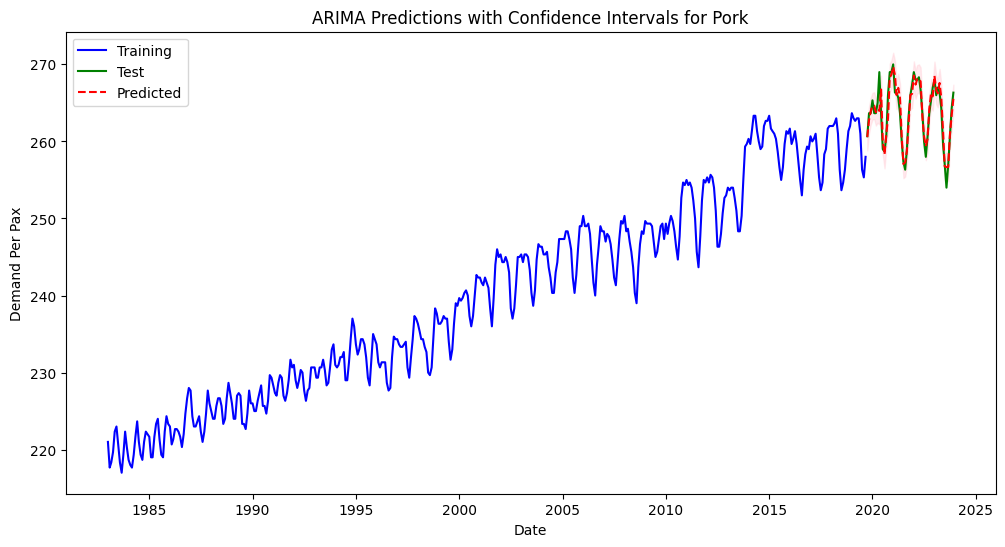

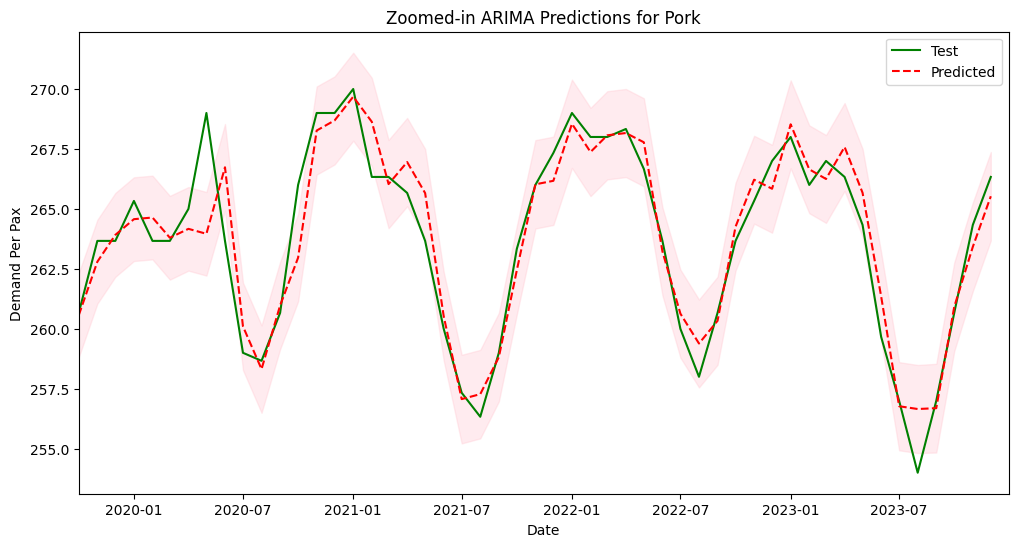

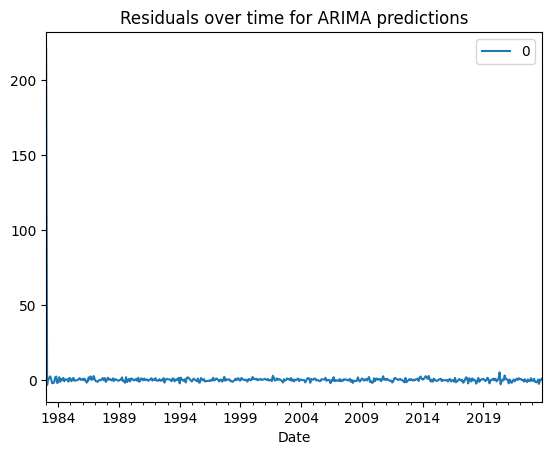

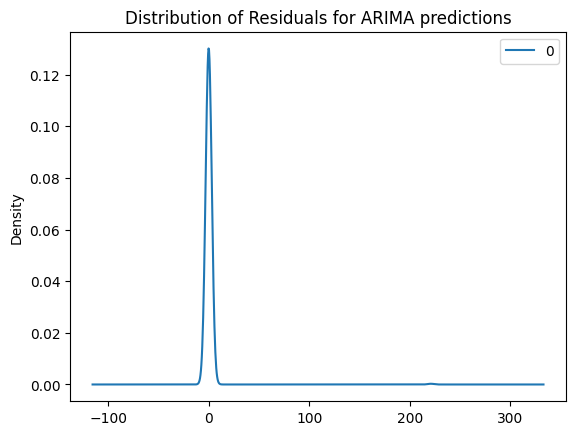

                0
count  491.000000
mean     0.486084
std     10.020357
min     -3.333369
25%     -0.538180
50%      0.096609
75%      0.616966
max    221.000000


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1631a4950>,
    Product     Time  Actual Price  Predicted Price
 0     Pork  2019-10    260.666667       260.570058
 1     Pork  2019-11    263.666667       262.797424
 2     Pork  2019-12    263.666667       263.916455
 3     Pork  2020-01    265.333333       264.572341
 4     Pork  2020-02    263.666667       264.641377
 5     Pork  2020-03    263.666667       263.797696
 6     Pork  2020-04    265.000000       264.169073
 7     Pork  2020-05    269.000000       263.962323
 8     Pork  2020-06    263.666667       266.736694
 9     Pork  2020-07    259.000000       260.103067
 10    Pork  2020-08    258.666667       258.320007
 11    Pork  2020-09    260.666667       260.975032
 12    Pork  2020-10    266.000000       262.965041
 13    Pork  2020-11    269.000000       268.268671
 14    Pork  2020-12    269.000000       268.691096
 15    Pork  2021-01    270.000000       269.679100
 16    Pork  2021-02    266.333333      

In [78]:
model = trainSARIMAXModel(pork, train, test, 1, 1, 2, 1, 0, [1], 12, 'Pork', months=50, value_name='Weight')
model

In [79]:
print(getMAPE(model[1]))
model[0].summary()

The Mean Absolute Percentage Error (MAPE) of the results is 0.35%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Weight   No. Observations:                  491
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -678.509
Date:                              Sun, 24 Mar 2024   AIC                           1369.018
Time:                                      21:26:54   BIC                           1394.184
Sample:                                  01-31-1983   HQIC                          1378.901
                                       - 11-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8662      0.029     30.005      0.000       0.810       0.923
ma.L1         -0.8317      0.037    -22.414      0.000      -0.904      -0.759
ma.L2         -0.1500      0.038     -3.932      0.000      -0.225      -0.075
ar.S.L12       0.9914      0.005    194.325      0.000       0.981       1.001
ma.S.L12      -0.7554      0.037    -20.522      0.000      -0.828      -0.683
sigma2         0.8866      0.042     21.250      0.000       0.805       0.968
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                67.56
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
predictions = pork

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66805D+00    |proj g|=  3.60979D-01

At iterate    5    f=  1.41421D+00    |proj g|=  1.49763D-02

At iterate   10    f=  1.38848D+00    |proj g|=  3.22022D-02


 This problem is unconstrained.



At iterate   15    f=  1.38401D+00    |proj g|=  1.14633D-02

At iterate   20    f=  1.38279D+00    |proj g|=  1.77499D-03

At iterate   25    f=  1.38166D+00    |proj g|=  1.38595D-02

At iterate   30    f=  1.38156D+00    |proj g|=  2.22169D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     46      1     0     0   2.138D-05   1.382D+00
  F =   1.3815583537700118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


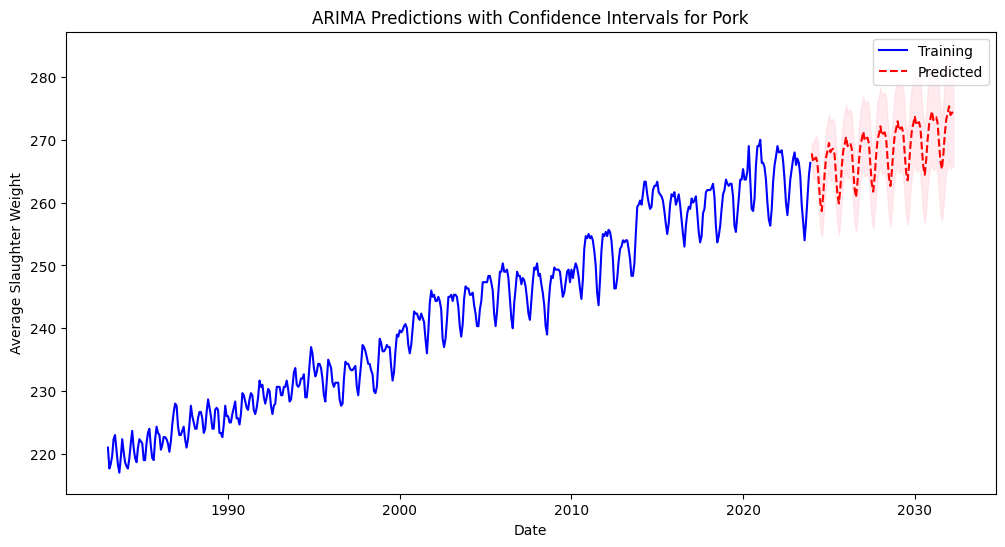

In [101]:
p, d, q, P, D, Q, m = 1, 1, 2, 1, 0, [1], 12
model = SARIMAX(pd.to_numeric(predictions['Weight']), order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=100)

# plotting train, test, predicted values and confidence intervals
y_pred = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(predictions.index.to_timestamp(), predictions['Weight'], label='Training', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

# Plotting confidence intervals
plt.fill_between(y_pred.index.to_timestamp(), forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'ARIMA Predictions with Confidence Intervals for Pork')
plt.xlabel('Date')
plt.ylabel('Average Slaughter Weight')
plt.legend()
plt.show()

In [82]:
pork_weights = pd.concat([predictions['Weight'], y_pred], axis=0)
pork_weights.name = 'Hogs_sweight'
pork_weights.index.name = 'Date'
pork_weights.to_csv('predicted_pork_weight.csv')

## Broilers

In [83]:
broilers = slaughter_weights[
    (slaughter_weights['Animal'] == 'Broilers')
].drop('Date', axis=1).groupby('Date')['Weight'].mean()
broilers.index = broilers.index.to_period('M')
broilers.name = 'Weight'
broilers = pd.DataFrame(broilers)

In [84]:
train, test = trainTestSplit(broilers, months=50)
params = getBestParams(train, 10, 10, 10, value_name='Weight', season=12)
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  441
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 703.406
Date:                            Sun, 24 Mar 2024   AIC                          -1394.813
Time:                                    21:31:01   BIC                          -1370.292
Sample:                                01-31-1983   HQIC                         -1385.139
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.006e-05   4.79e-05      1.880      0.060   -3.81e-06       0.000
ar.L1          0.3933      0.049      7.989      0.000       0.297       0.490
ma.L1         -0.9410      0.017    -53.828      0.000      -0.975      -0.907
ar.S.L12       0.9676      0.017     58.113      0.000       0.935       1.000
ma.S.L12      -0.7747      0.053    -14.521      0.000      -0.879      -0.670
sigma2         0.0023      0.000     13.331      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   2.71   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.10   Prob(JB):                         0.45
Heteroskedasticity (H):               0.85   Skew:                            -0.10
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.93822D-01    |proj g|=  2.06846D+01

At iterate    5    f= -1.04169D+00    |proj g|=  3.89599D+00

At iterate   10    f= -1.36550D+00    |proj g|=  1.15982D+00


 This problem is unconstrained.



At iterate   15    f= -1.39517D+00    |proj g|=  1.74007D-01

At iterate   20    f= -1.41576D+00    |proj g|=  1.00082D-01

At iterate   25    f= -1.43465D+00    |proj g|=  1.83697D-01

At iterate   30    f= -1.43625D+00    |proj g|=  6.42625D-02

At iterate   35    f= -1.44224D+00    |proj g|=  1.48556D+00

At iterate   40    f= -1.44726D+00    |proj g|=  3.85690D-01

At iterate   45    f= -1.44893D+00    |proj g|=  6.03453D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     98      2     0     0   1.016D-03  -1.449D+00
  F =  -1.4490856016503044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.88758D-01    |proj g|=  2.08943D+01

At iterate    5    f= -1.00943D+00    |proj g|=  5.22874D+00

At iterate   10    f= -1.36116D+00    |proj g|=  4.59763D-01

At iterate   15    f= -1.42780D+00    |proj g|=  4.91207D-01

At iterate   20    f= -1.44069D+00    |proj g|=  2.12894D-01

At iterate   25    f= -1.44228D+00    |proj g|=  2.14042D-01

At iterate   30    f= -1.44239D+00    |proj g|=  6.90876D-02

At iterate   35    f= -1.44264D+00    |proj g|=  2.59028D-01

At iterate   40    f= -1.44343D+00    |proj g|=  4.37472D-01

At iterate   45    f= -1.44580D+00    |proj g|=  5.77799D-01
  ys=-2.957E-06  -gs= 5.573E-04 BFGS update SKIPPED


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.44610D+00    |proj g|=  3.39210D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     92      1     1     0   3.392D-02  -1.446D+00
  F =  -1.4460989950079719     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.89621D-01    |proj g|=  2.09222D+01

At iterate    5    f= -1.01726D+00    |proj g|=  5.99807D+00

At iterate   10    f= -1.35900D+00    |proj g|=  7.60833D-01

At iterate   15    f= -1.40866D+00    |proj g|=  2.65437D-01

At iterate   20    f= -1.43279D+00    |proj g|=  5.56037D-01

At iterate   25    f= -1.44345D+00    |proj g|=  2.06068D-01

At iterate   30    f= -1.44354D+00    |proj g|=  2.44624D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.95395D-01    |proj g|=  2.08013D+01

At iterate    5    f= -1.10472D+00    |proj g|=  1.21267D+01

At iterate   10    f= -1.37561D+00    |proj g|=  5.21245D-01

At iterate   15    f= -1.40794D+00    |proj g|=  6.68003D-02

At iterate   20    f= -1.43195D+00    |proj g|=  3.26908D-01

At iterate   25    f= -1.44269D+00    |proj g|=  1.50183D-02

At iterate   30    f= -1.44561D+00    |proj g|=  6.75776D-01

At iterate   35    f= -1.44959D+00    |proj g|=  5.88034D-01

At iterate   40    f= -1.45040D+00    |proj g|=  1.40443D-01

At iterate   45    f= -1.45045D+00    |proj g|=  8.42891D-02

At iterate   50    f= -1.45045D+00    |proj g|=  1.13846D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.96286D-01    |proj g|=  2.08338D+01

At iterate    5    f= -1.11417D+00    |proj g|=  5.00969D+00

At iterate   10    f= -1.37801D+00    |proj g|=  5.62455D-01


 This problem is unconstrained.



At iterate   15    f= -1.40563D+00    |proj g|=  6.71386D-02

At iterate   20    f= -1.42081D+00    |proj g|=  1.37895D+00

At iterate   25    f= -1.43786D+00    |proj g|=  2.14129D-01

At iterate   30    f= -1.44058D+00    |proj g|=  3.01570D-01

At iterate   35    f= -1.44777D+00    |proj g|=  1.06719D-01

At iterate   40    f= -1.44828D+00    |proj g|=  1.09928D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   45    f= -1.45189D+00    |proj g|=  3.54584D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     80      1     0     0   3.546D-01  -1.452D+00
  F =  -1.4518904474138392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.00286D-01    |proj g|=  2.06122D+01

At iterate    5    f= -1.25066D+00    |proj g|=  7.09566D+00

At iterate   10    f= -1.35678D+00    |proj g|=  2.82736D-01


 This problem is unconstrained.



At iterate   15    f= -1.41148D+00    |proj g|=  1.08535D-01

At iterate   20    f= -1.43547D+00    |proj g|=  3.74352D-01

At iterate   25    f= -1.44098D+00    |proj g|=  3.38215D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     51      1     0     0   3.377D-01  -1.441D+00
  F =  -1.4409788672722441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.95711D-01    |proj g|=  2.08061D+01

At iterate    5    f= -1.09828D+00    |proj g|=  1.55578D+01

At iterate   10    f= -1.37652D+00    |proj g|=  5.19249D-01

At iterate   15    f= -1.41414D+00    |proj g|=  4.82539D-01

At iterate   20    f= -1.44119D+00    |proj g|=  3.39289D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     45      1     0     0   8.150D-01  -1.442D+00
  F =  -1.4416798142389426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.03705D-01    |proj g|=  2.05141D+01

At iterate    5    f= -1.22836D+00    |proj g|=  2.17522D+00

At iterate   10    f= -1.36259D+00    |proj g|=  7.12073D-01


 This problem is unconstrained.



At iterate   15    f= -1.42029D+00    |proj g|=  3.71693D-01

At iterate   20    f= -1.43955D+00    |proj g|=  1.20962D-01

At iterate   25    f= -1.44262D+00    |proj g|=  4.49170D-02

At iterate   30    f= -1.44405D+00    |proj g|=  1.17567D-01

At iterate   35    f= -1.44580D+00    |proj g|=  2.97121D-01

At iterate   40    f= -1.45033D+00    |proj g|=  2.51831D+00

At iterate   45    f= -1.46235D+00    |proj g|=  6.46407D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.46313D+00    |proj g|=  5.39624D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     81      1     0     0   5.396D-01  -1.463D+00
  F =  -1.4631276030508533     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36958D+00    |proj g|=  7.02449D-01

At iterate    5    f= -1.45085D+00    |proj g|=  1.19679D+00

At iterate   10    f= -1.45378D+00    |proj g|=  6.64029D-01

At iterate   15    f= -1.51425D+00    |proj g|=  4.64647D+00

At iterate   20    f= -1.57846D+00    |proj g|=  1.09626D+00

At iterate   25    f= -1.58199D+00    |proj g|=  1.03452D+00

At iterate   30    f= -1.59533D+00    |proj g|=  1.94928D-01

At iterate   35    f= -1.59568D+00    |proj g|=  5.12017D-01

At iterate   40    f= -1.59753D+00    |proj g|=  5.06261D-01

At iterate   45    f= -1.59916D+00    |proj g|=  1.82172D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37093D+00    |proj g|=  7.21310D-01


 This problem is unconstrained.



At iterate    5    f= -1.45251D+00    |proj g|=  6.62006D-01

At iterate   10    f= -1.45550D+00    |proj g|=  9.48728D-01

At iterate   15    f= -1.56156D+00    |proj g|=  1.77660D+00

At iterate   20    f= -1.57248D+00    |proj g|=  9.24876D-02

At iterate   25    f= -1.57917D+00    |proj g|=  6.58030D-02

At iterate   30    f= -1.58102D+00    |proj g|=  9.19723D-02

At iterate   35    f= -1.59394D+00    |proj g|=  1.42421D-01

At iterate   40    f= -1.59590D+00    |proj g|=  1.84073D-02

At iterate   45    f= -1.59594D+00    |proj g|=  6.90535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     65   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f= -1.43540D+00    |proj g|=  2.80272D+00

At iterate   10    f= -1.44348D+00    |proj g|=  3.36819D-01

At iterate   15    f= -1.47003D+00    |proj g|=  3.83495D+00

At iterate   20    f= -1.56061D+00    |proj g|=  9.16277D-01

At iterate   25    f= -1.56529D+00    |proj g|=  2.94230D-01

At iterate   30    f= -1.57218D+00    |proj g|=  4.49865D-02

At iterate   35    f= -1.57261D+00    |proj g|=  8.44762D-02

At iterate   40    f= -1.58399D+00    |proj g|=  1.35399D-01

At iterate   45    f= -1.59329D+00    |proj g|=  1.03485D-01

At iterate   50    f= -1.59344D+00    |proj g|=  1.30432D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35873D+00    |proj g|=  5.57759D-01

At iterate    5    f= -1.43947D+00    |proj g|=  2.23713D+00

At iterate   10    f= -1.44516D+00    |proj g|=  3.80419D-01

At iterate   15    f= -1.48144D+00    |proj g|=  4.31436D+00

At iterate   20    f= -1.56721D+00    |proj g|=  1.18758D+00

At iterate   25    f= -1.57340D+00    |proj g|=  3.92463D-01

At iterate   30    f= -1.57486D+00    |proj g|=  1.72777D-02

At iterate   35    f= -1.58226D+00    |proj g|=  6.51967D-02

At iterate   40    f= -1.59335D+00    |proj g|=  1.76746D-01

At iterate   45    f= -1.59404D+00    |proj g|=  2.35322D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.59404D+00    |proj g|=  2.25538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   2.255D-03  -1.594D+00
  F =  -1.5940443037586205     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35929D+00    |proj g|=  6.09516D-01

At iterate    5    f= -1.43581D+00    |proj g|=  2.80366D+00

At iterate   10    f= -1.44397D+00    |proj g|=  3.43651D-01

At iterate   15    f= -1.47385D+00    |proj g|=  4.13307D+00

At iterate   20    f= -1.56601D+00    |proj g|=  9.05535D-01

At iterate   25    f= -1.57169D+00    |proj g|=  5.52572D-01

At iterate   30    f= -1.57404D+00    |proj g|=  5.63966D-02

At iterate   35    f= -1.57458D+00    |proj g|=  2.92580D-01

At iterate   40    f= -1.59059D+00    |proj g|=  6.21320D-01

At iterate   45    f= -1.59377D+00    |proj g|=  1.19814D-01

At iterate   50    f= -1.59424D+00    |proj g|=  3.49840D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36043D+00    |proj g|=  6.11467D-01

At iterate    5    f= -1.43656D+00    |proj g|=  2.78530D+00

At iterate   10    f= -1.44465D+00    |proj g|=  3.43367D-01


 This problem is unconstrained.



At iterate   15    f= -1.47479D+00    |proj g|=  4.13967D+00

At iterate   20    f= -1.56575D+00    |proj g|=  8.55992D-01

At iterate   25    f= -1.56973D+00    |proj g|=  9.51730D-02

At iterate   30    f= -1.57460D+00    |proj g|=  5.41555D-01

At iterate   35    f= -1.57567D+00    |proj g|=  1.48349D-01

At iterate   40    f= -1.59438D+00    |proj g|=  2.10937D-01

At iterate   45    f= -1.59523D+00    |proj g|=  4.76202D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.59537D+00    |proj g|=  7.31474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   7.315D-04  -1.595D+00
  F =  -1.5953737666975820     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35858D+00    |proj g|=  5.53405D-01

At iterate    5    f= -1.43719D+00    |proj g|=  2.39900D+00

At iterate   10    f= -1.44352D+00    |proj g|=  3.75557D-01

At iterate   15    f= -1.47790D+00    |proj g|=  4.27634D+00

At iterate   20    f= -1.56504D+00    |proj g|=  1.29322D+00

At iterate   25    f= -1.56975D+00    |proj g|=  3.43267D-02

At iterate   30    f= -1.57069D+00    |proj g|=  7.28014D-01

At iterate   35    f= -1.57277D+00    |proj g|=  4.54448D-02

At iterate   40    f= -1.57330D+00    |proj g|=  1.95276D-01

At iterate   45    f= -1.58920D+00    |proj g|=  1.56502D-01

At iterate   50    f= -1.59268D+00    |proj g|=  1.07548D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35971D+00    |proj g|=  5.55685D-01

At iterate    5    f= -1.43773D+00    |proj g|=  2.41616D+00

At iterate   10    f= -1.44411D+00    |proj g|=  3.72619D-01


 This problem is unconstrained.



At iterate   15    f= -1.47840D+00    |proj g|=  4.28035D+00

At iterate   20    f= -1.56481D+00    |proj g|=  8.52850D-01

At iterate   25    f= -1.56959D+00    |proj g|=  2.68531D-01

At iterate   30    f= -1.57449D+00    |proj g|=  9.54789D-02

At iterate   35    f= -1.58594D+00    |proj g|=  4.39403D-01

At iterate   40    f= -1.59345D+00    |proj g|=  3.16790D-03

At iterate   45    f= -1.59352D+00    |proj g|=  5.88505D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.59352D+00    |proj g|=  2.64526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     85      2     0     0   2.645D-04  -1.594D+00
  F =  -1.5935246827090350     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36087D+00    |proj g|=  5.59855D-01

At iterate    5    f= -1.43828D+00    |proj g|=  2.48461D+00

At iterate   10    f= -1.44493D+00    |proj g|=  3.65173D-01

At iterate   15    f= -1.47800D+00    |proj g|=  4.23207D+00

At iterate   20    f= -1.56436D+00    |proj g|=  1.00768D+00

At iterate   25    f= -1.56785D+00    |proj g|=  6.15923D-02

At iterate   30    f= -1.57060D+00    |proj g|=  8.16129D-01

At iterate   35    f= -1.57510D+00    |proj g|=  2.91056D-02

At iterate   40    f= -1.57531D+00    |proj g|=  2.54696D-01

At iterate   45    f= -1.58296D+00    |proj g|=  1.76785D+00


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.59273D+00    |proj g|=  1.13798D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   1.138D-01  -1.593D+00
  F =  -1.5927339981901276     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36131D+00    |proj g|=  5.43142D-01

At iterate    5    f= -1.43891D+00    |proj g|=  2.23247D+00

At iterate   10    f= -1.44457D+00    |proj g|=  3.90102D-01

At iterate   15    f= -1.48114D+00    |proj g|=  4.34784D+00

At iterate   20    f= -1.56812D+00    |proj g|=  1.19562D+00

At iterate   25    f= -1.57341D+00    |proj g|=  3.01802D-01

At iterate   30    f= -1.57760D+00    |proj g|=  5.30404D-01

At iterate   35    f= -1.59190D+00    |proj g|=  1.66662D-01

At iterate   40    f= -1.59468D+00    |proj g|=  7.46366D-02

At iterate   45    f= -1.59476D+00    |proj g|=  8.84670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36243D+00    |proj g|=  5.43959D-01

At iterate    5    f= -1.43974D+00    |proj g|=  2.25125D+00

At iterate   10    f= -1.44543D+00    |proj g|=  3.85357D-01

At iterate   15    f= -1.48173D+00    |proj g|=  4.39652D+00

At iterate   20    f= -1.56917D+00    |proj g|=  1.12850D+00

At iterate   25    f= -1.57558D+00    |proj g|=  4.01364D-01

At iterate   30    f= -1.57646D+00    |proj g|=  1.05589D-01

At iterate   35    f= -1.57935D+00    |proj g|=  1.22692D+00

At iterate   40    f= -1.59113D+00    |proj g|=  1.12449D-01

At iterate   45    f= -1.59383D+00    |proj g|=  1.38070D-01

At iterate   50    f= -1.59587D+00    |proj g|=  3.91773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36292D+00    |proj g|=  5.24996D-01

At iterate    5    f= -1.44027D+00    |proj g|=  1.90545D+00

At iterate   10    f= -1.44484D+00    |proj g|=  4.33597D-01

At iterate   15    f= -1.48702D+00    |proj g|=  4.42240D+00

At iterate   20    f= -1.57013D+00    |proj g|=  1.20216D+00

At iterate   25    f= -1.57474D+00    |proj g|=  4.37042D-02

At iterate   30    f= -1.58739D+00    |proj g|=  4.15651D-01

At iterate   35    f= -1.59048D+00    |proj g|=  2.42938D-02

At iterate   40    f= -1.59562D+00    |proj g|=  1.24134D-01

At iterate   45    f= -1.59596D+00    |proj g|=  2.30386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36342D+00    |proj g|=  5.94712D-01

At iterate    5    f= -1.43625D+00    |proj g|=  2.83124D+00

At iterate   10    f= -1.44452D+00    |proj g|=  3.43979D-01

At iterate   15    f= -1.47423D+00    |proj g|=  4.11027D+00

At iterate   20    f= -1.56221D+00    |proj g|=  7.42574D-01

At iterate   25    f= -1.56582D+00    |proj g|=  8.04619D-02

At iterate   30    f= -1.57277D+00    |proj g|=  1.17835D+00

At iterate   35    f= -1.57745D+00    |proj g|=  1.65761D-02

At iterate   40    f= -1.59432D+00    |proj g|=  3.64141D-02

At iterate   45    f= -1.59535D+00    |proj g|=  4.07110D-02

At iterate   50    f= -1.59536D+00    |proj g|=  1.49937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36463D+00    |proj g|=  6.02726D-01

At iterate    5    f= -1.43648D+00    |proj g|=  2.84284D+00

At iterate   10    f= -1.44487D+00    |proj g|=  3.43256D-01

At iterate   15    f= -1.47450D+00    |proj g|=  4.04691D+00

At iterate   20    f= -1.55664D+00    |proj g|=  6.31686D-01

At iterate   25    f= -1.56084D+00    |proj g|=  2.89863D-01

At iterate   30    f= -1.57477D+00    |proj g|=  1.79002D+00

At iterate   35    f= -1.57806D+00    |proj g|=  2.01266D-02

At iterate   40    f= -1.57955D+00    |proj g|=  5.92091D-01

At iterate   45    f= -1.59440D+00    |proj g|=  7.57502D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.59541D+00    |proj g|=  7.80662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   7.807D-03  -1.595D+00
  F =  -1.5954106783684026     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36397D+00    |proj g|=  5.48208D-01

At iterate    5    f= -1.43734D+00    |proj g|=  2.31201D+00

At iterate   10    f= -1.44324D+00    |proj g|=  3.73097D-01

At iterate   15    f= -1.47675D+00    |proj g|=  4.21852D+00

At iterate   20    f= -1.56430D+00    |proj g|=  1.65562D+00

At iterate   25    f= -1.57228D+00    |proj g|=  2.89124D-02

At iterate   30    f= -1.57368D+00    |proj g|=  4.25625D-01

At iterate   35    f= -1.58835D+00    |proj g|=  7.24452D-01

At iterate   40    f= -1.59246D+00    |proj g|=  1.60699D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36428D+00    |proj g|=  5.27341D-01

At iterate    5    f= -1.43893D+00    |proj g|=  1.96377D+00

At iterate   10    f= -1.44358D+00    |proj g|=  4.22640D-01

At iterate   15    f= -1.48228D+00    |proj g|=  4.25113D+00


 This problem is unconstrained.



At iterate   20    f= -1.56277D+00    |proj g|=  1.83682D+00

At iterate   25    f= -1.56928D+00    |proj g|=  2.74100D-01

At iterate   30    f= -1.57404D+00    |proj g|=  1.11162D-01

At iterate   35    f= -1.57422D+00    |proj g|=  2.14138D-01

At iterate   40    f= -1.57507D+00    |proj g|=  4.56928D-02

At iterate   45    f= -1.58564D+00    |proj g|=  1.12617D+00

At iterate   50    f= -1.59341D+00    |proj g|=  1.34286D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   1.343D-02  -1.593D+00
  F =  -1.5934050891544538     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36436D+00    |proj g|=  5.82611D-01

At iterate    5    f= -1.43778D+00    |proj g|=  2.67898D+00

At iterate   10    f= -1.44518D+00    |proj g|=  3.45208D-01


 This problem is unconstrained.



At iterate   15    f= -1.47376D+00    |proj g|=  4.02617D+00

At iterate   20    f= -1.56634D+00    |proj g|=  1.54716D+00

At iterate   25    f= -1.57139D+00    |proj g|=  2.97131D-01

At iterate   30    f= -1.57438D+00    |proj g|=  1.20057D-01

At iterate   35    f= -1.58159D+00    |proj g|=  1.42296D-01

At iterate   40    f= -1.59263D+00    |proj g|=  6.63791D-02

At iterate   45    f= -1.59307D+00    |proj g|=  3.09832D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     85      2     0     0   3.097D-03  -1.593D+00
  F =  -1.5930691421762100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36537D+00    |proj g|=  5.84155D-01

At iterate    5    f= -1.43968D+00    |proj g|=  2.68216D+00

At iterate   10    f= -1.44710D+00    |proj g|=  3.44073D-01

At iterate   15    f= -1.47534D+00    |proj g|=  4.00640D+00


 This problem is unconstrained.



At iterate   20    f= -1.56655D+00    |proj g|=  1.48458D+00

At iterate   25    f= -1.57200D+00    |proj g|=  2.99873D-01

At iterate   30    f= -1.57460D+00    |proj g|=  3.80210D-01

At iterate   35    f= -1.57489D+00    |proj g|=  2.57239D-01

At iterate   40    f= -1.57723D+00    |proj g|=  1.31934D-01

At iterate   45    f= -1.59186D+00    |proj g|=  3.24955D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.59404D+00    |proj g|=  8.83059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   8.831D-02  -1.594D+00
  F =  -1.5940377298024542     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36567D+00    |proj g|=  6.23084D-01

At iterate    5    f= -1.43891D+00    |proj g|=  2.79558D+00

At iterate   10    f= -1.44687D+00    |proj g|=  3.38860D-01


 This problem is unconstrained.



At iterate   15    f= -1.47531D+00    |proj g|=  4.10351D+00

At iterate   20    f= -1.57078D+00    |proj g|=  5.19160D-01

At iterate   25    f= -1.57430D+00    |proj g|=  4.20126D-01

At iterate   30    f= -1.57679D+00    |proj g|=  1.26395D-01

At iterate   35    f= -1.58294D+00    |proj g|=  1.37102D+00

At iterate   40    f= -1.59267D+00    |proj g|=  2.48070D-01

At iterate   45    f= -1.59345D+00    |proj g|=  1.37923D-02

At iterate   50    f= -1.59345D+00    |proj g|=  1.12968D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   1.130D-04  -1.593D+00
  F =  -1.59345278890

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36394D+00    |proj g|=  6.20444D-01

At iterate    5    f= -1.43523D+00    |proj g|=  2.91232D+00

At iterate   10    f= -1.44388D+00    |proj g|=  3.26620D-01

At iterate   15    f= -1.47024D+00    |proj g|=  3.98806D+00

At iterate   20    f= -1.56719D+00    |proj g|=  3.40533D-01

At iterate   25    f= -1.57133D+00    |proj g|=  1.62203D-02

At iterate   30    f= -1.57189D+00    |proj g|=  5.39349D-01

At iterate   35    f= -1.57437D+00    |proj g|=  2.78392D-02

At iterate   40    f= -1.57502D+00    |proj g|=  2.29828D-01

At iterate   45    f= -1.58868D+00    |proj g|=  8.88760D-02

At iterate   50    f= -1.58901D+00    |proj g|=  6.57850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36233D+00    |proj g|=  5.69407D-01

At iterate    5    f= -1.43669D+00    |proj g|=  2.65598D+00

At iterate   10    f= -1.44401D+00    |proj g|=  3.44179D-01

At iterate   15    f= -1.47358D+00    |proj g|=  4.13015D+00

At iterate   20    f= -1.56699D+00    |proj g|=  1.12342D+00

At iterate   25    f= -1.57381D+00    |proj g|=  2.56317D-02

At iterate   30    f= -1.57584D+00    |proj g|=  5.16739D-01

At iterate   35    f= -1.58857D+00    |proj g|=  4.12390D-02

At iterate   40    f= -1.58975D+00    |proj g|=  4.38252D-01

At iterate   45    f= -1.59003D+00    |proj g|=  1.67490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36345D+00    |proj g|=  5.75214D-01

At iterate    5    f= -1.43694D+00    |proj g|=  2.70363D+00

At iterate   10    f= -1.44455D+00    |proj g|=  3.38578D-01


 This problem is unconstrained.



At iterate   15    f= -1.47360D+00    |proj g|=  4.12346D+00

At iterate   20    f= -1.56599D+00    |proj g|=  8.00795D-01

At iterate   25    f= -1.57054D+00    |proj g|=  1.09058D-01

At iterate   30    f= -1.57409D+00    |proj g|=  4.23259D-02

At iterate   35    f= -1.58076D+00    |proj g|=  6.87191D-01

At iterate   40    f= -1.59043D+00    |proj g|=  7.91107D-03

At iterate   45    f= -1.59078D+00    |proj g|=  1.20555D-01

At iterate   50    f= -1.59080D+00    |proj g|=  1.20128D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   1.201D-03  -1.591D+00
  F =  -1.59080184722

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.76033D-01    |proj g|=  2.10258D+01

At iterate    5    f= -9.50840D-01    |proj g|=  2.46513D+00


 This problem is unconstrained.



At iterate   10    f= -1.31446D+00    |proj g|=  2.85021D+00

At iterate   15    f= -1.38564D+00    |proj g|=  1.29248D+00

At iterate   20    f= -1.43249D+00    |proj g|=  3.06368D-01

At iterate   25    f= -1.44294D+00    |proj g|=  1.20484D-01

At iterate   30    f= -1.44301D+00    |proj g|=  4.51146D-02
  ys=-2.953E-08  -gs= 5.089E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   35    f= -1.44301D+00    |proj g|=  8.12709D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     93      2     1     0   1.562D-03  -1.443D+00
  F =  -1.4430084694640175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.73837D-01    |proj g|=  2.11414D+01

At iterate    5    f= -9.48164D-01    |proj g|=  2.32496D+00

At iterate   10    f= -1.32282D+00    |proj g|=  1.07308D+00


 This problem is unconstrained.



At iterate   15    f= -1.38505D+00    |proj g|=  5.77115D-01

At iterate   20    f= -1.42335D+00    |proj g|=  7.55003D-02

At iterate   25    f= -1.44089D+00    |proj g|=  2.49879D-01
  ys=-8.787E-03  -gs= 1.089E-03 BFGS update SKIPPED

At iterate   30    f= -1.44395D+00    |proj g|=  1.18709D-01
  ys=-8.926E-02  -gs= 4.404E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -1.44396D+00    |proj g|=  1.52996D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.677E-07  -gs= 1.270E-06 BFGS update SKIPPED
  ys=-9.228E-08  -gs= 2.821E-07 BFGS update SKIPPED


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38    134      5     4     0   4.622D-02  -1.444D+00
  F =  -1.4439604894312883     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.71071D-01    |proj g|=  2.12515D+01

At iterate    5    f= -9.45015D-01    |proj g|=  2.19814D+00

At iterate   10    f= -1.31842D+00    |proj g|=  9.67225D-01


 This problem is unconstrained.



At iterate   15    f= -1.38832D+00    |proj g|=  2.58057D-01

At iterate   20    f= -1.42802D+00    |proj g|=  7.28912D-02

At iterate   25    f= -1.43743D+00    |proj g|=  3.53905D-01

At iterate   30    f= -1.44416D+00    |proj g|=  1.74731D-01
  ys=-4.985E-09  -gs= 2.486E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -1.44472D+00    |proj g|=  2.08804D-01

At iterate   40    f= -1.44484D+00    |proj g|=  1.95639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     95      2     1     0   1.956D-03  -1.445D+00
  F =  -1.4448416822223271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.78995D-01    |proj g|=  2.10968D+01

At iterate    5    f= -9.59050D-01    |proj g|=  2.81691D+00


 This problem is unconstrained.



At iterate   10    f= -1.33403D+00    |proj g|=  1.23069D+00

At iterate   15    f= -1.40994D+00    |proj g|=  4.03501D-02

At iterate   20    f= -1.43921D+00    |proj g|=  2.07883D-02

At iterate   25    f= -1.44475D+00    |proj g|=  2.67528D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     43      1     0     0   1.156D-03  -1.445D+00
  F =  -1.4448380136137946     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.79899D-01    |proj g|=  2.11247D+01

At iterate    5    f= -9.61943D-01    |proj g|=  2.94991D+00


 This problem is unconstrained.



At iterate   10    f= -1.33633D+00    |proj g|=  1.17453D+00

At iterate   15    f= -1.40599D+00    |proj g|=  1.67505D-01

At iterate   20    f= -1.43583D+00    |proj g|=  3.68892D-01

At iterate   25    f= -1.44480D+00    |proj g|=  4.15913D-01

At iterate   30    f= -1.44520D+00    |proj g|=  4.79457D-03

At iterate   35    f= -1.44520D+00    |proj g|=  1.19477D-02

At iterate   40    f= -1.44520D+00    |proj g|=  1.00422D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     85      1     0     0   1.134D-02  -1.445D+00
  F =  -1.4451960629306790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.82402D-01    |proj g|=  2.09586D+01

At iterate    5    f= -9.69589D-01    |proj g|=  2.72680D+00

At iterate   10    f= -1.34304D+00    |proj g|=  9.19753D-01

At iterate   15    f= -1.39055D+00    |proj g|=  1.10382D-01

At iterate   20    f= -1.42905D+00    |proj g|=  1.18707D-01

At iterate   25    f= -1.44228D+00    |proj g|=  1.77274D-01

At iterate   30    f= -1.44345D+00    |proj g|=  5.87129D-02

At iterate   35    f= -1.44538D+00    |proj g|=  5.11822D-02
  ys=-9.378E-10  -gs= 1.955E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37    103      2     1     0   5.740D-02  -1.445D+00
  F =  -1.4453840667870692     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36511D+00    |proj g|=  7.10210D-01

At iterate    5    f= -1.43994D+00    |proj g|=  1.24391D+00

At iterate   10    f= -1.44278D+00    |proj g|=  6.00287D-01


 This problem is unconstrained.



At iterate   15    f= -1.50025D+00    |proj g|=  4.62162D+00

At iterate   20    f= -1.55677D+00    |proj g|=  3.55578D-01

At iterate   25    f= -1.56288D+00    |proj g|=  6.53815D-01

At iterate   30    f= -1.57097D+00    |proj g|=  3.72264D-02

At iterate   35    f= -1.57394D+00    |proj g|=  3.07172D-01

At iterate   40    f= -1.58477D+00    |proj g|=  1.03587D-01

At iterate   45    f= -1.58495D+00    |proj g|=  1.81620D-03

At iterate   50    f= -1.58503D+00    |proj g|=  7.33135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   7.331D-04  -1.585D+00
  F =  -1.58503206686

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36624D+00    |proj g|=  7.23569D-01

At iterate    5    f= -1.44747D+00    |proj g|=  2.31301D-01

At iterate   10    f= -1.48416D+00    |proj g|=  3.15167D+00


 This problem is unconstrained.



At iterate   15    f= -1.54917D+00    |proj g|=  1.03084D+00

At iterate   20    f= -1.57338D+00    |proj g|=  6.74179D-02

At iterate   25    f= -1.57382D+00    |proj g|=  3.13983D-01

At iterate   30    f= -1.58250D+00    |proj g|=  9.97851D-02

At iterate   35    f= -1.58610D+00    |proj g|=  4.56757D-03

At iterate   40    f= -1.58611D+00    |proj g|=  4.13594D-03

At iterate   45    f= -1.58611D+00    |proj g|=  6.28728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     61      1     0     0   6.287D-05  -1.586D+00
  F =  -1.5861058407152773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36718D+00    |proj g|=  7.31382D-01

At iterate    5    f= -1.44262D+00    |proj g|=  6.20205D-01

At iterate   10    f= -1.44465D+00    |proj g|=  7.12194D-01

At iterate   15    f= -1.52609D+00    |proj g|=  3.68796D+00

At iterate   20    f= -1.55234D+00    |proj g|=  3.65893D-01

At iterate   25    f= -1.56838D+00    |proj g|=  2.13406D+00

At iterate   30    f= -1.57269D+00    |proj g|=  9.60059D-02

At iterate   35    f= -1.57771D+00    |proj g|=  8.62546D-01

At iterate   40    f= -1.58602D+00    |proj g|=  9.21104D-02

At iterate   45    f= -1.58636D+00    |proj g|=  3.34035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36829D+00    |proj g|=  7.37880D-01

At iterate    5    f= -1.44294D+00    |proj g|=  4.70840D-01

At iterate   10    f= -1.44528D+00    |proj g|=  8.92105D-01

At iterate   15    f= -1.55116D+00    |proj g|=  5.37504D-01

At iterate   20    f= -1.55485D+00    |proj g|=  7.83735D-01

At iterate   25    f= -1.56025D+00    |proj g|=  9.20161D-01

At iterate   30    f= -1.57190D+00    |proj g|=  2.46051D-01

At iterate   35    f= -1.57201D+00    |proj g|=  7.21245D-02

At iterate   40    f= -1.57496D+00    |proj g|=  1.11362D+00

At iterate   45    f= -1.58446D+00    |proj g|=  3.19814D-01

At iterate   50    f= -1.58503D+00    |proj g|=  9.33620D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36355D+00    |proj g|=  6.35133D-01

At iterate    5    f= -1.43102D+00    |proj g|=  2.90361D+00

At iterate   10    f= -1.43964D+00    |proj g|=  3.06465D-01

At iterate   15    f= -1.46280D+00    |proj g|=  3.76471D+00


 This problem is unconstrained.



At iterate   20    f= -1.55926D+00    |proj g|=  1.45041D+00

At iterate   25    f= -1.56615D+00    |proj g|=  1.54019D-01

At iterate   30    f= -1.56741D+00    |proj g|=  2.41663D-02

At iterate   35    f= -1.58365D+00    |proj g|=  9.65668D-02

At iterate   40    f= -1.58397D+00    |proj g|=  5.13385D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     54      1     0     0   3.203D-04  -1.584D+00
  F =  -1.5839822061852964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36462D+00    |proj g|=  6.40154D-01

At iterate    5    f= -1.43164D+00    |proj g|=  2.81730D+00

At iterate   10    f= -1.43974D+00    |proj g|=  3.06858D-01

At iterate   15    f= -1.46364D+00    |proj g|=  3.86021D+00

At iterate   20    f= -1.56228D+00    |proj g|=  1.34578D+00

At iterate   25    f= -1.56823D+00    |proj g|=  2.66977D-02

At iterate   30    f= -1.57591D+00    |proj g|=  5.83600D-01

At iterate   35    f= -1.58053D+00    |proj g|=  2.15526D-01

At iterate   40    f= -1.58503D+00    |proj g|=  6.81078D-02

At iterate   45    f= -1.58507D+00    |proj g|=  5.53382D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36528D+00    |proj g|=  6.29195D-01

At iterate    5    f= -1.43215D+00    |proj g|=  2.88256D+00

At iterate   10    f= -1.44062D+00    |proj g|=  3.07750D-01


 This problem is unconstrained.



At iterate   15    f= -1.46399D+00    |proj g|=  3.78780D+00

At iterate   20    f= -1.55986D+00    |proj g|=  1.40982D+00

At iterate   25    f= -1.56751D+00    |proj g|=  1.91183D-01

At iterate   30    f= -1.56887D+00    |proj g|=  1.08466D-01

At iterate   35    f= -1.56928D+00    |proj g|=  2.30243D-02

At iterate   40    f= -1.57994D+00    |proj g|=  2.76075D-01

At iterate   45    f= -1.58613D+00    |proj g|=  1.37375D-03


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.58615D+00    |proj g|=  7.14784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   7.148D-04  -1.586D+00
  F =  -1.5861475796190043     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36648D+00    |proj g|=  6.38652D-01

At iterate    5    f= -1.43278D+00    |proj g|=  2.82231D+00

At iterate   10    f= -1.44090D+00    |proj g|=  3.10671D-01

At iterate   15    f= -1.46482D+00    |proj g|=  3.84784D+00

At iterate   20    f= -1.56243D+00    |proj g|=  1.33724D+00

At iterate   25    f= -1.56929D+00    |proj g|=  8.03713D-02

At iterate   30    f= -1.57041D+00    |proj g|=  5.38894D-02

At iterate   35    f= -1.57305D+00    |proj g|=  7.10044D-01

At iterate   40    f= -1.58651D+00    |proj g|=  9.42984D-02

At iterate   45    f= -1.58666D+00    |proj g|=  5.91360D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.58670D+00    |proj g|=  4.46759D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   4.468D-03  -1.587D+00
  F =  -1.5866975335710418     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36763D+00    |proj g|=  6.42823D-01

At iterate    5    f= -1.43319D+00    |proj g|=  2.78681D+00

At iterate   10    f= -1.44114D+00    |proj g|=  3.11741D-01

At iterate   15    f= -1.46516D+00    |proj g|=  3.85826D+00

At iterate   20    f= -1.56444D+00    |proj g|=  1.21962D+00

At iterate   25    f= -1.57084D+00    |proj g|=  3.18480D-01

At iterate   30    f= -1.58127D+00    |proj g|=  3.50498D-01

At iterate   35    f= -1.58471D+00    |proj g|=  1.69564D-01

At iterate   40    f= -1.58703D+00    |proj g|=  1.10526D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36873D+00    |proj g|=  6.45540D-01

At iterate    5    f= -1.43428D+00    |proj g|=  2.75662D+00

At iterate   10    f= -1.44206D+00    |proj g|=  3.12903D-01

At iterate   15    f= -1.46652D+00    |proj g|=  3.90408D+00


 This problem is unconstrained.



At iterate   20    f= -1.56599D+00    |proj g|=  1.12631D+00

At iterate   25    f= -1.57152D+00    |proj g|=  1.45607D-01

At iterate   30    f= -1.57470D+00    |proj g|=  6.30314D-02

At iterate   35    f= -1.57530D+00    |proj g|=  1.70050D-01

At iterate   40    f= -1.58014D+00    |proj g|=  1.08433D+00

At iterate   45    f= -1.58783D+00    |proj g|=  3.74355D-02


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.58791D+00    |proj g|=  5.91120D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   5.911D-02  -1.588D+00
  F =  -1.5879071720037592     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36976D+00    |proj g|=  6.45698D-01

At iterate    5    f= -1.43539D+00    |proj g|=  2.75060D+00

At iterate   10    f= -1.44312D+00    |proj g|=  3.12637D-01


 This problem is unconstrained.



At iterate   15    f= -1.46755D+00    |proj g|=  3.90385D+00

At iterate   20    f= -1.56691D+00    |proj g|=  1.11997D+00

At iterate   25    f= -1.57439D+00    |proj g|=  5.13820D-01

At iterate   30    f= -1.57707D+00    |proj g|=  4.06013D-01

At iterate   35    f= -1.58771D+00    |proj g|=  1.01210D-02

At iterate   40    f= -1.58882D+00    |proj g|=  8.90763D-02

At iterate   45    f= -1.58887D+00    |proj g|=  1.76316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     58      1     0     0   1.763D-03  -1.589D+00
  F =  -1.5888680175450867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37034D+00    |proj g|=  6.31676D-01

At iterate    5    f= -1.43471D+00    |proj g|=  2.86283D+00

At iterate   10    f= -1.44304D+00    |proj g|=  3.10762D-01


 This problem is unconstrained.



At iterate   15    f= -1.46654D+00    |proj g|=  3.84192D+00

At iterate   20    f= -1.56702D+00    |proj g|=  1.72852D+00

At iterate   25    f= -1.57271D+00    |proj g|=  8.25167D-02

At iterate   30    f= -1.58259D+00    |proj g|=  2.56973D-01

At iterate   35    f= -1.58933D+00    |proj g|=  2.79921D-02

At iterate   40    f= -1.58938D+00    |proj g|=  5.39038D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     54      1     0     0   5.390D-04  -1.589D+00
  F =  -1.5893781898560808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37084D+00    |proj g|=  6.98298D-01

At iterate    5    f= -1.44169D+00    |proj g|=  1.34495D+00

At iterate   10    f= -1.44469D+00    |proj g|=  5.02720D-01

At iterate   15    f= -1.49907D+00    |proj g|=  4.45174D+00


 This problem is unconstrained.



At iterate   20    f= -1.56963D+00    |proj g|=  1.63793D+00

At iterate   25    f= -1.57352D+00    |proj g|=  9.08103D-02

At iterate   30    f= -1.57530D+00    |proj g|=  2.05869D-01

At iterate   35    f= -1.57596D+00    |proj g|=  8.52086D-01

At iterate   40    f= -1.57995D+00    |proj g|=  1.40120D-01

At iterate   45    f= -1.58323D+00    |proj g|=  1.05475D+00

At iterate   50    f= -1.58954D+00    |proj g|=  1.25074D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   1.251D-01  -1.590D+00
  F =  -1.5895363920634176     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36917D+00    |proj g|=  7.35501D-01

At iterate    5    f= -1.43870D+00    |proj g|=  5.62725D-01

At iterate   10    f= -1.44050D+00    |proj g|=  6.88983D-01


 This problem is unconstrained.



At iterate   15    f= -1.51864D+00    |proj g|=  4.44645D+00

At iterate   20    f= -1.57130D+00    |proj g|=  6.01698D-01

At iterate   25    f= -1.57232D+00    |proj g|=  5.75182D-01

At iterate   30    f= -1.57385D+00    |proj g|=  4.66250D-02

At iterate   35    f= -1.57442D+00    |proj g|=  6.24988D-01

At iterate   40    f= -1.57622D+00    |proj g|=  3.80224D-01

At iterate   45    f= -1.58344D+00    |proj g|=  1.72073D+00


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f= -1.58898D+00    |proj g|=  9.29274D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   9.293D-02  -1.589D+00
  F =  -1.5889766748364040     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36769D+00    |proj g|=  6.90286D-01

At iterate    5    f= -1.43750D+00    |proj g|=  1.81386D+00


 This problem is unconstrained.



At iterate   10    f= -1.44156D+00    |proj g|=  4.14711D-01

At iterate   15    f= -1.48138D+00    |proj g|=  4.34135D+00

At iterate   20    f= -1.56606D+00    |proj g|=  1.89303D+00

At iterate   25    f= -1.57187D+00    |proj g|=  2.26338D-02

At iterate   30    f= -1.57231D+00    |proj g|=  6.41339D-01

At iterate   35    f= -1.57725D+00    |proj g|=  1.46435D+00

At iterate   40    f= -1.58216D+00    |proj g|=  2.15453D-01

At iterate   45    f= -1.58417D+00    |proj g|=  1.69601D-01


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.58936D+00    |proj g|=  9.41879D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   9.419D-03  -1.589D+00
  F =  -1.5893607690032074     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


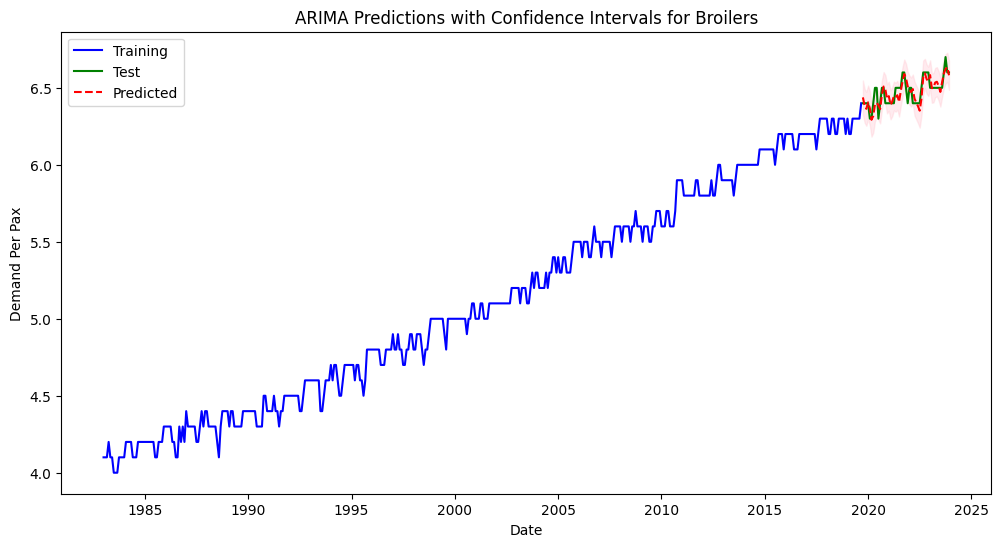

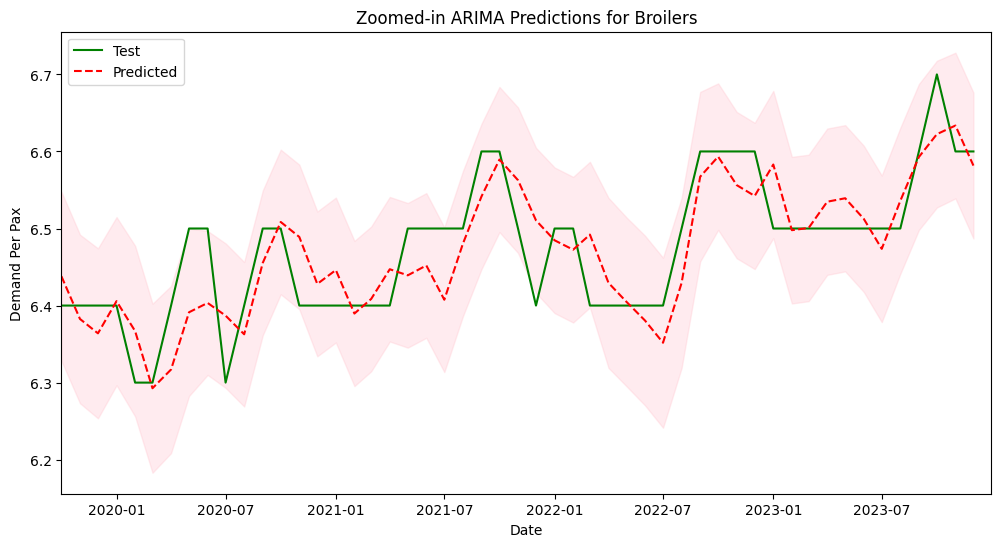

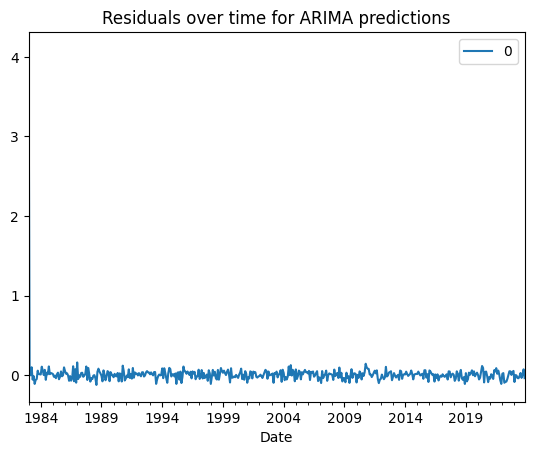

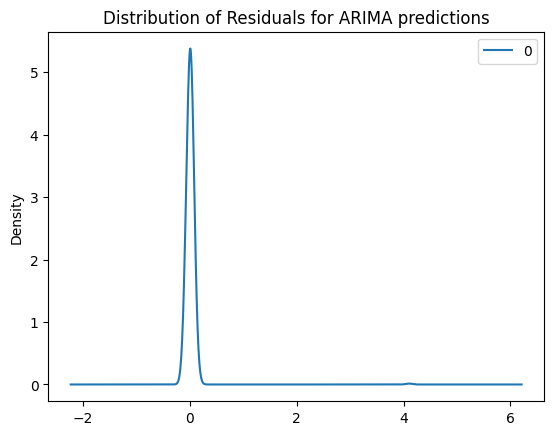

                0
count  491.000000
mean     0.012546
std      0.191249
min     -0.121821
25%     -0.029769
50%      0.008106
75%      0.038071
max      4.100000


(<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1631bbf50>,
      Product     Time  Actual Price  Predicted Price
 0   Broilers  2019-10           6.4         6.438022
 1   Broilers  2019-11           6.4         6.382611
 2   Broilers  2019-12           6.4         6.363932
 3   Broilers  2020-01           6.4         6.405695
 4   Broilers  2020-02           6.3         6.366864
 5   Broilers  2020-03           6.3         6.292694
 6   Broilers  2020-04           6.4         6.316998
 7   Broilers  2020-05           6.5         6.391306
 8   Broilers  2020-06           6.5         6.403412
 9   Broilers  2020-07           6.3         6.386915
 10  Broilers  2020-08           6.4         6.362716
 11  Broilers  2020-09           6.5         6.455311
 12  Broilers  2020-10           6.5         6.508499
 13  Broilers  2020-11           6.4         6.489067
 14  Broilers  2020-12           6.4         6.428071
 15  Broilers  2021-01           6.4         6.446088
 16  B

In [85]:
model = trainSARIMAXModel(broilers, train, test, 1, 1, 1, 1, 0, 1, 12, 'Broilers', months=50, value_name='Weight')
model

In [86]:
print(getMAPE(model[1]))
model[0].summary()

The Mean Absolute Percentage Error (MAPE) of the results is 0.65%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Weight   No. Observations:                  491
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 780.376
Date:                            Sun, 24 Mar 2024   AIC                          -1550.752
Time:                                    21:34:21   BIC                          -1529.780
Sample:                                01-31-1983   HQIC                         -1542.516
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3384      0.054      6.230      0.000       0.232       0.445
ma.L1         -0.8769      0.031    -28.616      0.000      -0.937      -0.817
ar.S.L12       0.9917      0.005    181.811      0.000       0.981       1.002
ma.S.L12      -0.8796      0.033    -26.791      0.000      -0.944      -0.815
sigma2         0.0023      0.000     14.302      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.49   Prob(JB):                         0.63
Heteroskedasticity (H):               0.92   Skew:                            -0.08
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
predictions = broilers

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.94027D-01    |proj g|=  2.06560D+01

At iterate    5    f= -1.08772D+00    |proj g|=  7.56205D+00

At iterate   10    f= -1.36677D+00    |proj g|=  4.46930D-01

At iterate   15    f= -1.41287D+00    |proj g|=  3.48346D-01

At iterate   20    f= -1.44341D+00    |proj g|=  6.23084D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     41      1     0     0   1.740D-02  -1.449D+00
  F =  -1.4486245387336951     

CONVERG

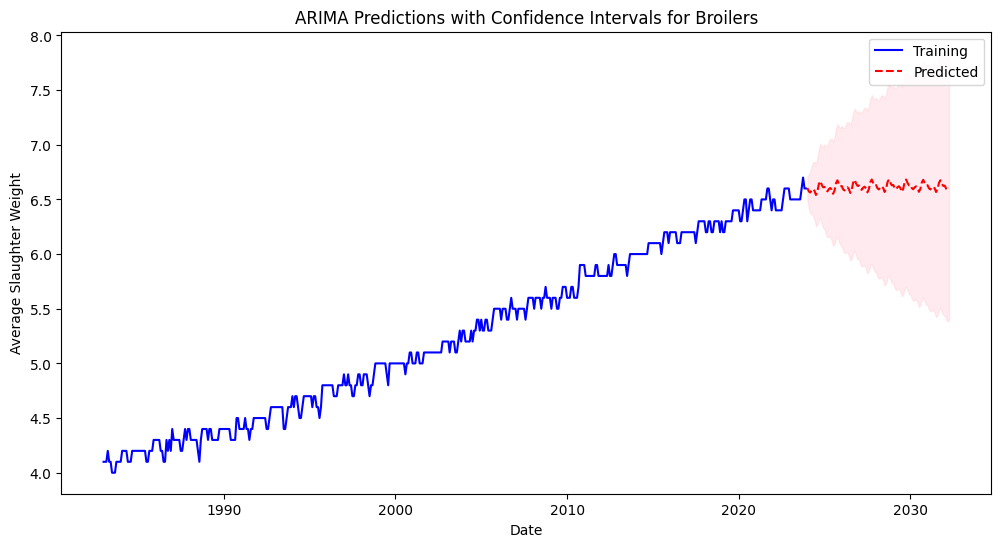

In [92]:
p, d, q, P, D, Q, m = 1, 1, 1, 1, 0, 1, 12
model = SARIMAX(pd.to_numeric(predictions['Weight']), order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_model = model.fit()
forecast = arima_model.get_forecast(steps=100)

# plotting train, test, predicted values and confidence intervals
y_pred = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(predictions.index.to_timestamp(), predictions['Weight'], label='Training', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted', linestyle='--', color='red')

# Plotting confidence intervals
plt.fill_between(y_pred.index.to_timestamp(), forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'ARIMA Predictions with Confidence Intervals for Broilers')
plt.xlabel('Date')
plt.ylabel('Average Slaughter Weight')
plt.legend()
plt.show()

In [89]:
broilers_weights = pd.concat([predictions['Weight'], y_pred], axis=0)
broilers_weights.name = 'Broilers_sweight'
broilers_weights.index.name = 'Date'
broilers_weights.to_csv('predicted_broiler_weight.csv')

# Surveys

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [9]:
# Provide datatypes for specific columns to prevent warning
survey = pd.read_csv('Nutrition_Physical_Activity_and_Obesity_Data.csv', dtype = {
    'Age(years)': str,
    'Education': str,
    'Grade': str,
    'Income': str
})

In [13]:
survey['Question'].unique()

array(['Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
       'Percent of students in grades 9-12 who have obesity',
       'Percent of students in grades 9-12 who participate in daily physical education',
       'Percent of students in grades 9-12 who have an overweight classification',
       'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day',
       'Percent of students in grades 9-12 who consume vegetables less than 1 time daily',
       'Percent of students in grades 9-12 who consume fruit less than 1 time daily',
       'Percent of students in grades 9-12 watching 3 or more hours of television each school day',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adu

In [14]:
survey

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Grade,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,9.6,9.6,NaN,NaN,5.5,16.5,130.0,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,13.3,13.3,NaN,NaN,10.7,16.5,1739.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,17.1,17.1,NaN,NaN,16.2,17.9,8978.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,NaN,Value,65.9,65.9,NaN,NaN,49.8,79.1,876.0,NaN,NaN,NaN,NaN,10th,NaN,NaN,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,16.7,16.7,NaN,NaN,14.5,19.2,2573.0,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,24.5,24.5,NaN,NaN,16.3,35.3,111.0,NaN,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,36.0,36.0,NaN,NaN,27.9,45.0,159.0,NaN,NaN,Less than high school,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.2,35.2,NaN,NaN,30.6,40.0,450.0,NaN,35 - 44,NaN,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.3,35.3,NaN,NaN,30.2,40.7,512.0,NaN,NaN,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550


In [36]:
survey.iloc[-5:,]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Grade,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,year_place
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,24.5,24.5,NaN,NaN,16.3,35.3,111.0,NaN,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15,2022WYBRFSS
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,36.0,36.0,NaN,NaN,27.9,45.0,159.0,NaN,NaN,Less than high school,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS,2022WYBRFSS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.2,35.2,NaN,NaN,30.6,40.0,450.0,NaN,35 - 44,NaN,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544,2022WYBRFSS
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.3,35.3,NaN,NaN,30.2,40.7,512.0,NaN,NaN,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550,2022WYBRFSS
133344,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,41.0,41.0,NaN,NaN,31.9,50.8,146.0,NaN,NaN,Less than high school,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Education,Less than high school,EDU,EDUHS,2022WYBRFSS


In [42]:
survey['year_place'] = survey['YearStart'].astype(str) + survey['LocationAbbr'] + survey['Datasource'] + survey['Question'] + survey['Sample_Size'].astype(str)
survey['year_place']
survey.pivot(index='year_place', columns='Question', values=["Data_Value"])

ValueError: Index contains duplicate entries, cannot reshape

In [4]:
['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Grade',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'][18]

'Age(years)'